# 0. Подключение библиотек

In [2]:
import pandas as pd
print('pandas {}.'.format(pd.__version__))
import seaborn as sns
print('seaborn {}.'.format(sns.__version__))
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
print('numpy {}.'.format(np.__version__))
import sklearn
print('sklearn {}.'.format(sklearn.__version__))
from sklearn.metrics import mean_squared_error, mean_squared_log_error, precision_score, recall_score, confusion_matrix, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
import pickle

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

pandas 2.0.0.
seaborn 0.12.2.
numpy 1.23.5.
sklearn 1.3.2.


In [3]:
import warnings
warnings.filterwarnings('ignore')

## 0.1. Обьявление глобальных переменных

In [4]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

RANDOM_SEED = 42

# 1. Загрузка датасета

In [4]:
df = pd.read_csv('./data/train.csv')
df.shape

(1460, 81)

## 1.1 Просмотр информации о датасете

In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## 1.2 Построение диаграм

<Axes: >

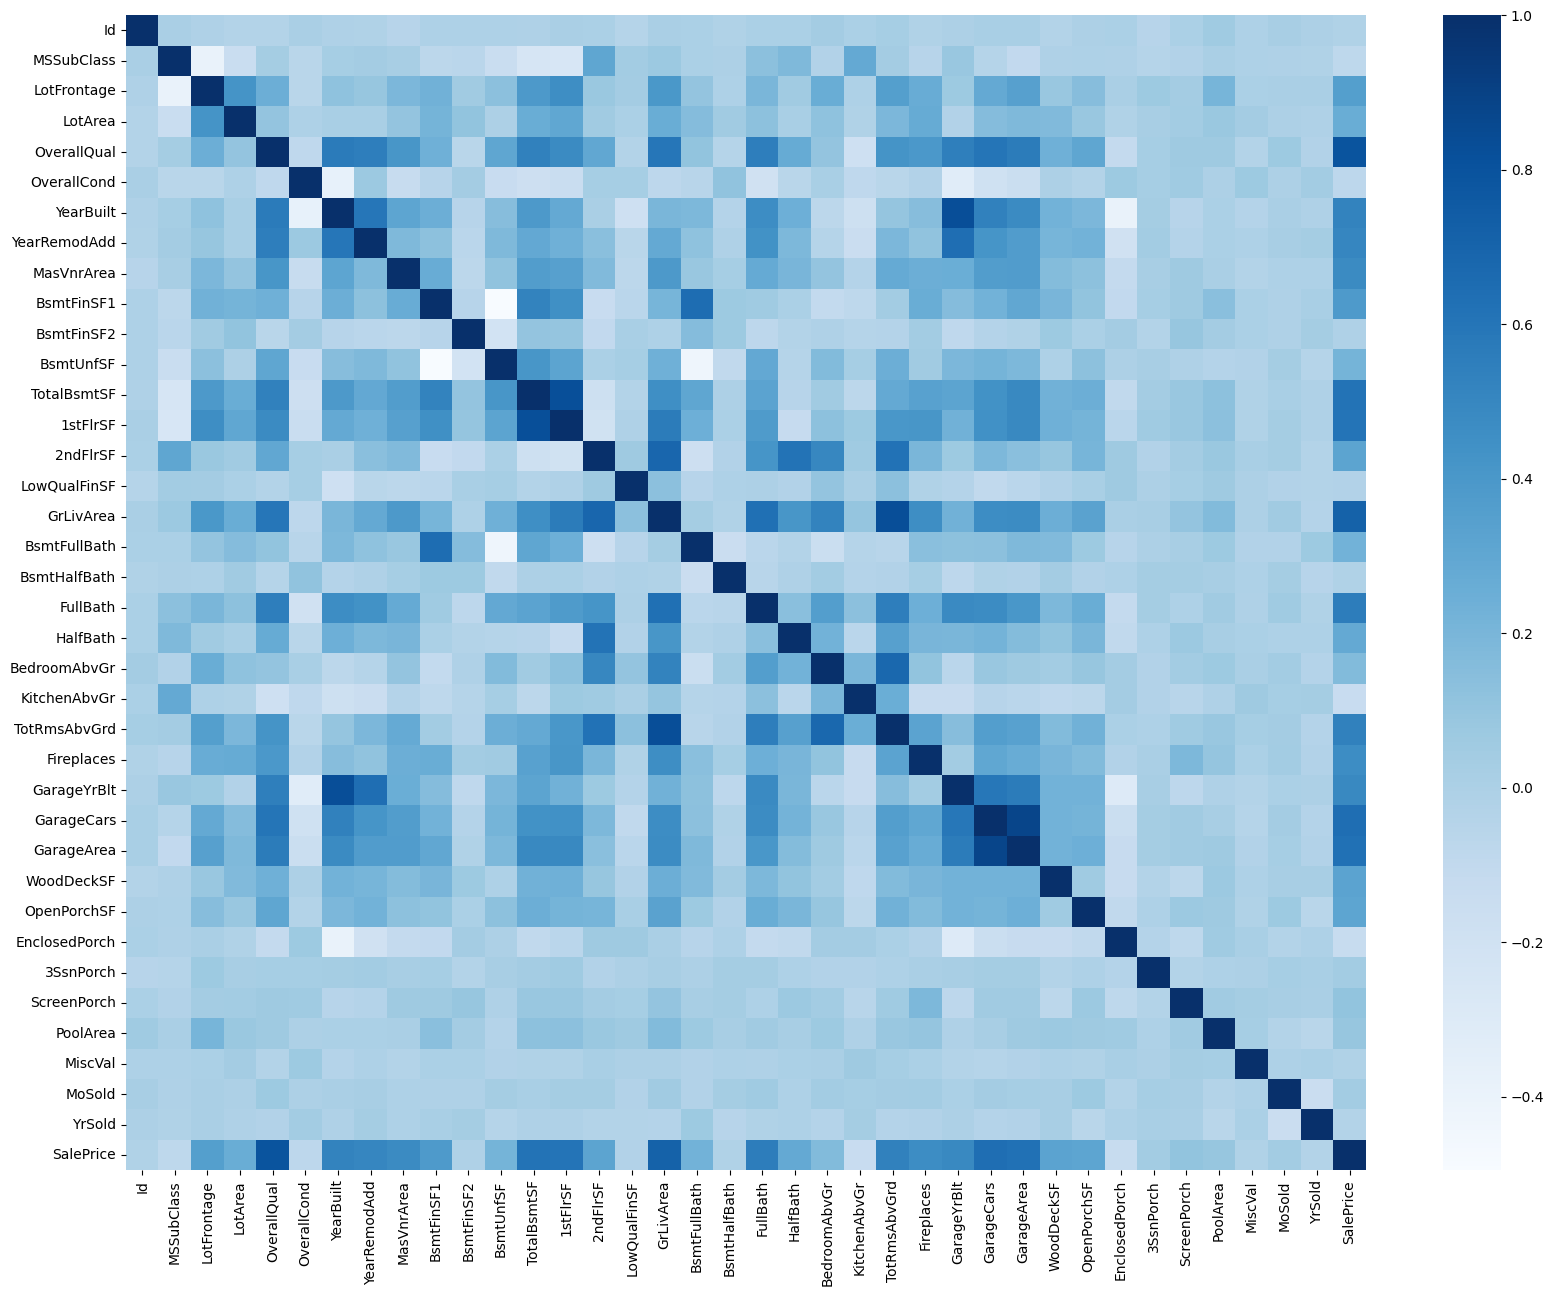

In [7]:
corr = df.select_dtypes('number').corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corr, cmap="Blues")

<Axes: >

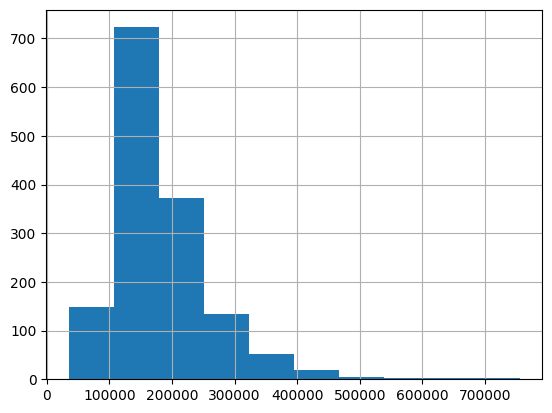

In [8]:
df.SalePrice.hist()

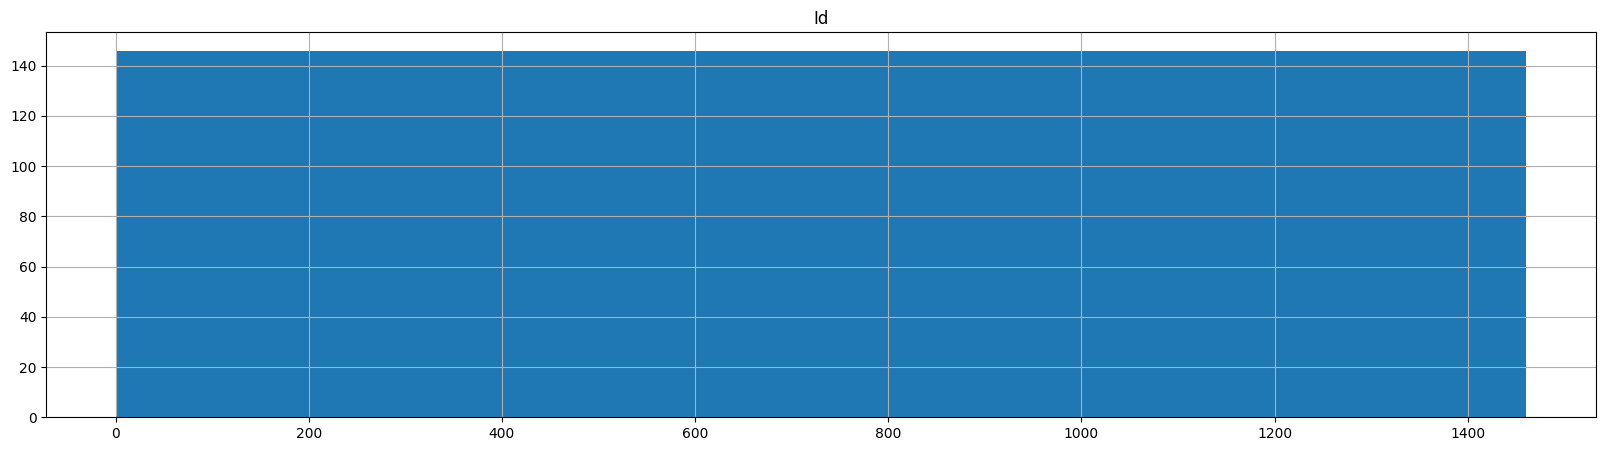

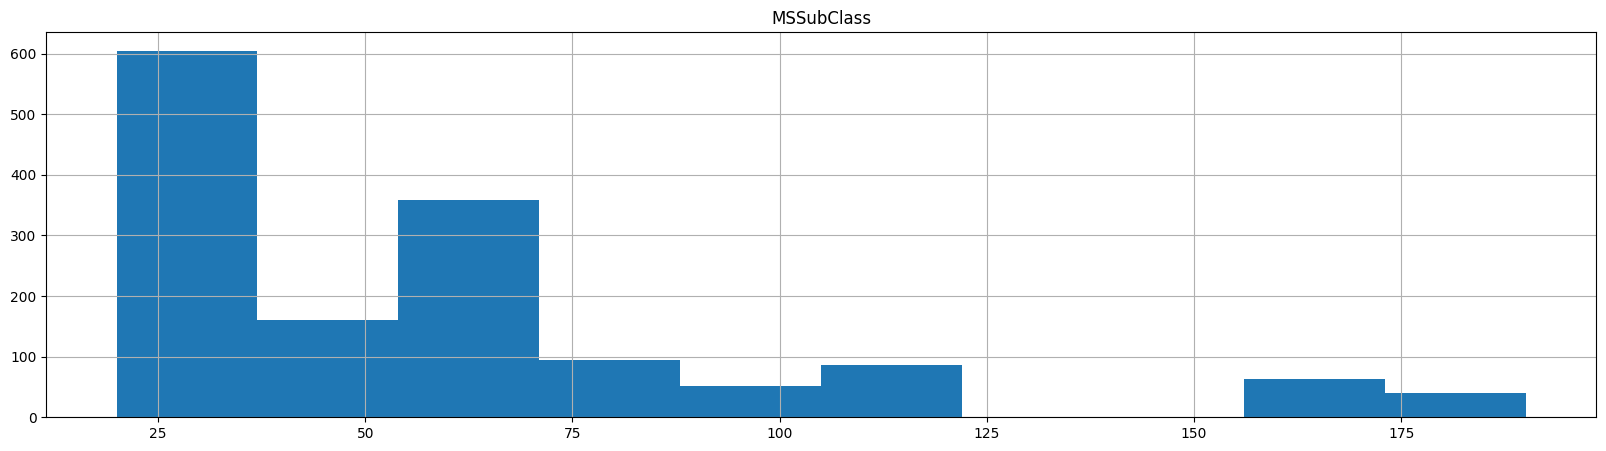

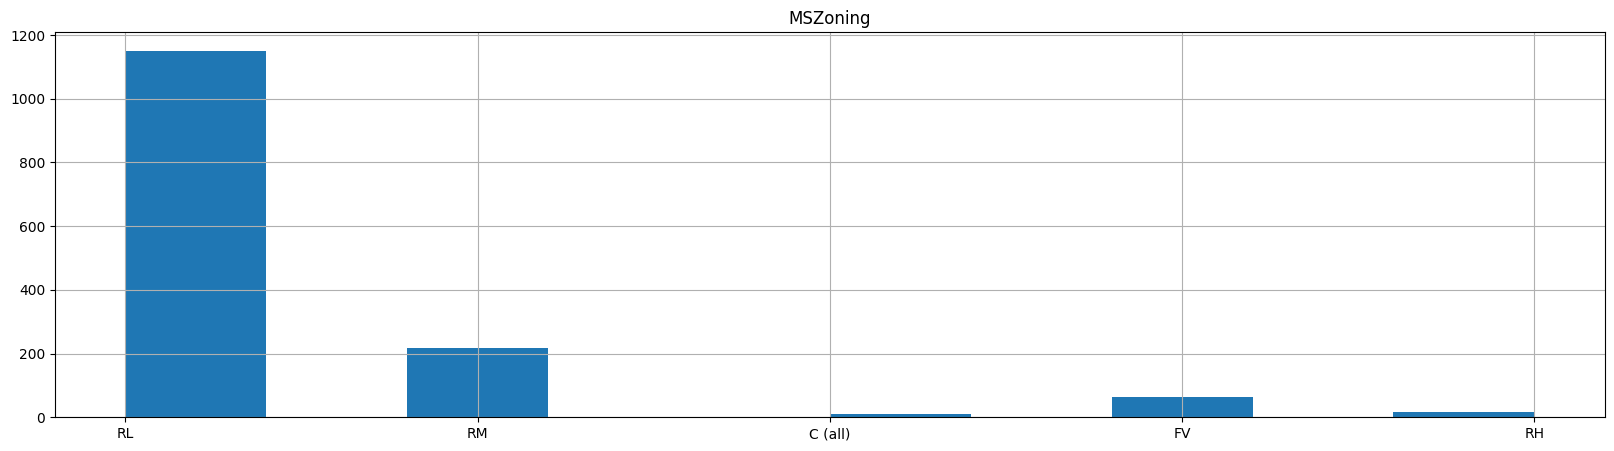

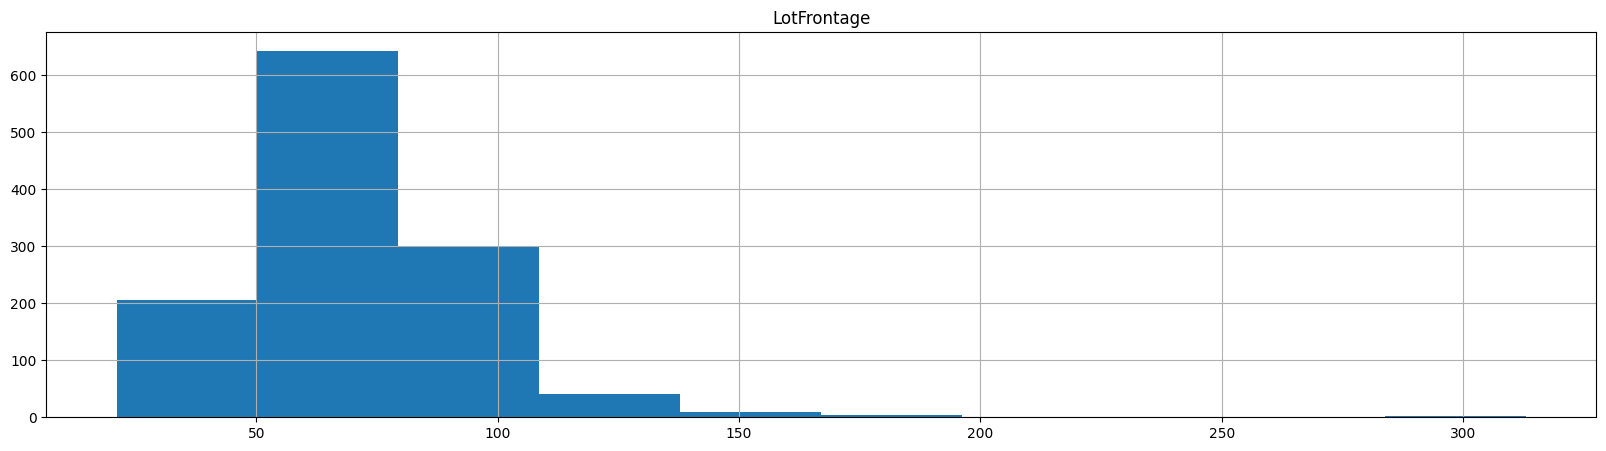

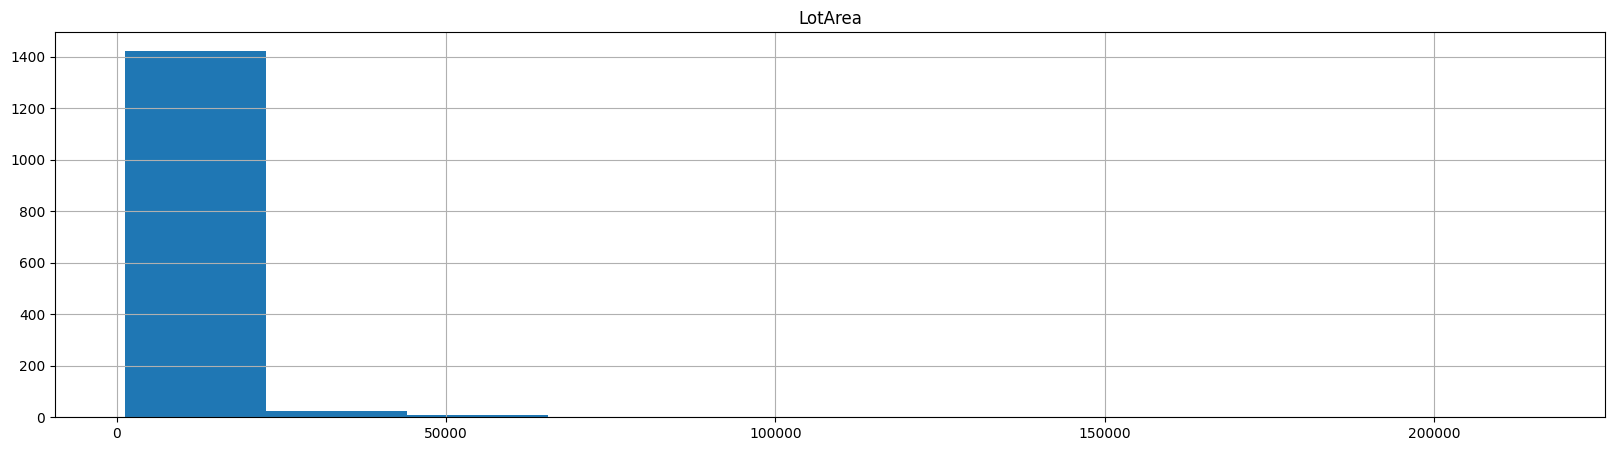

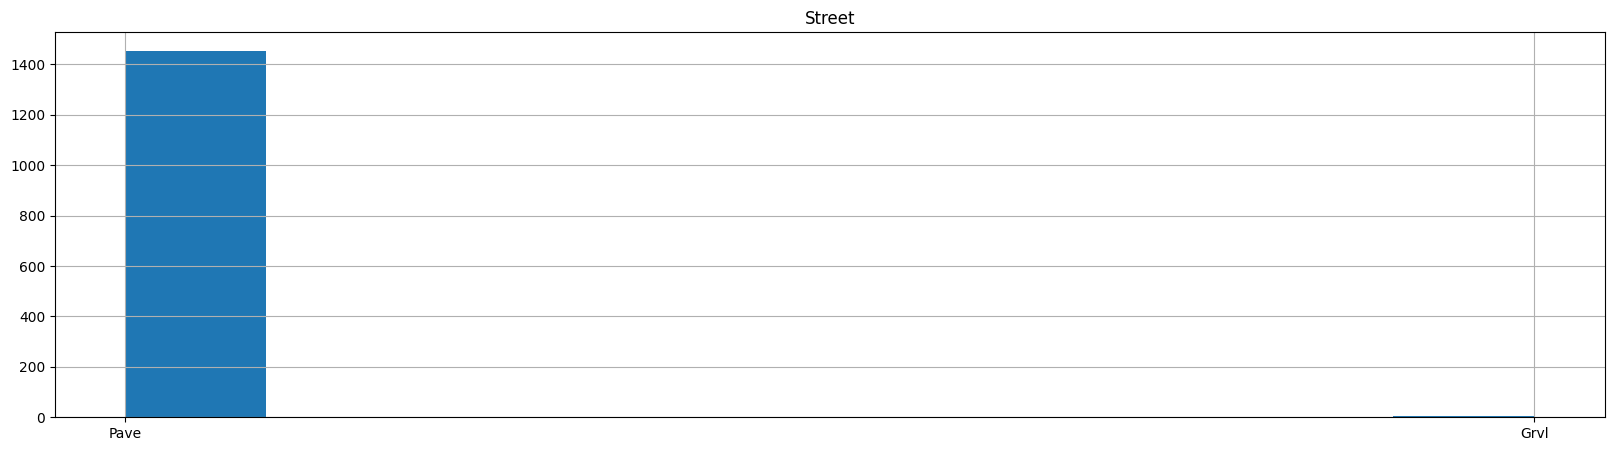

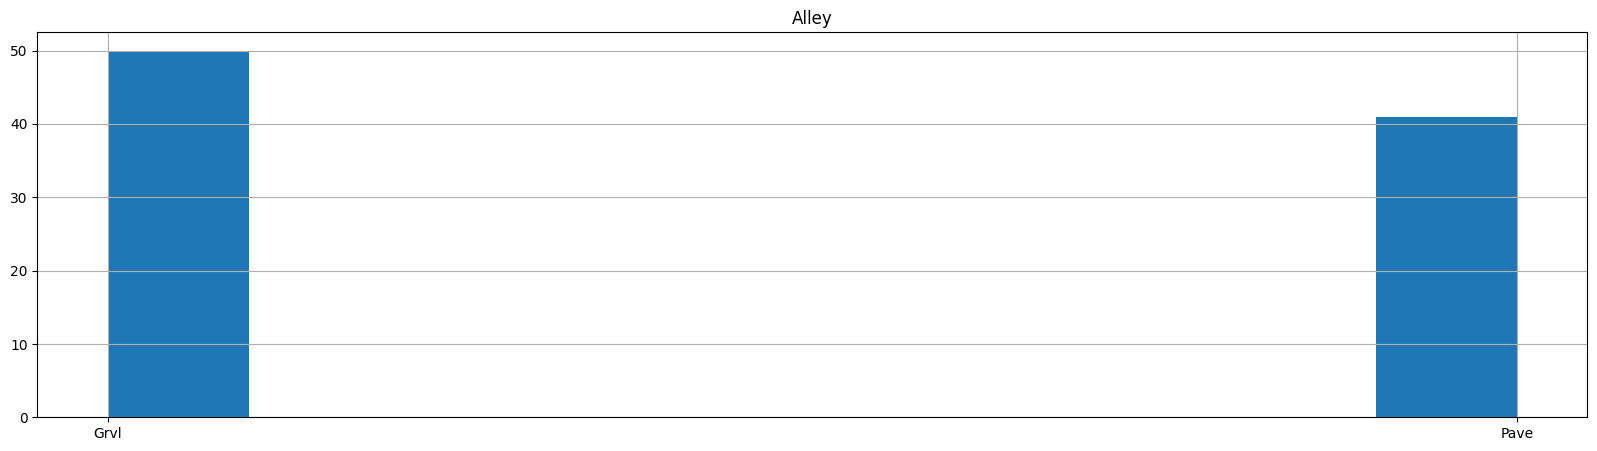

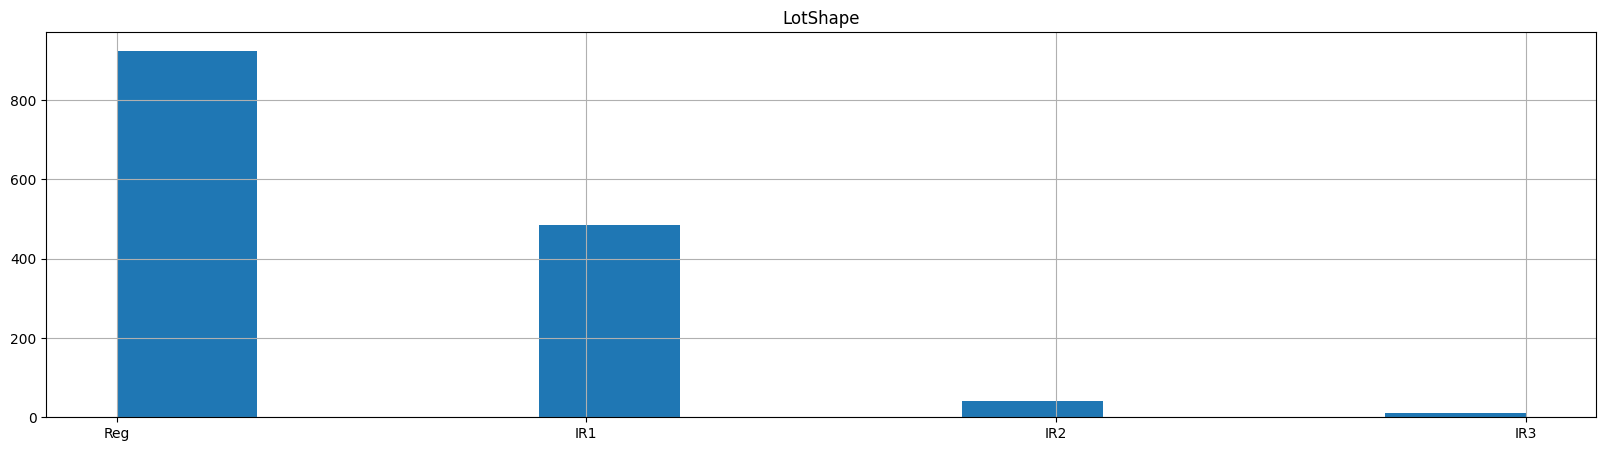

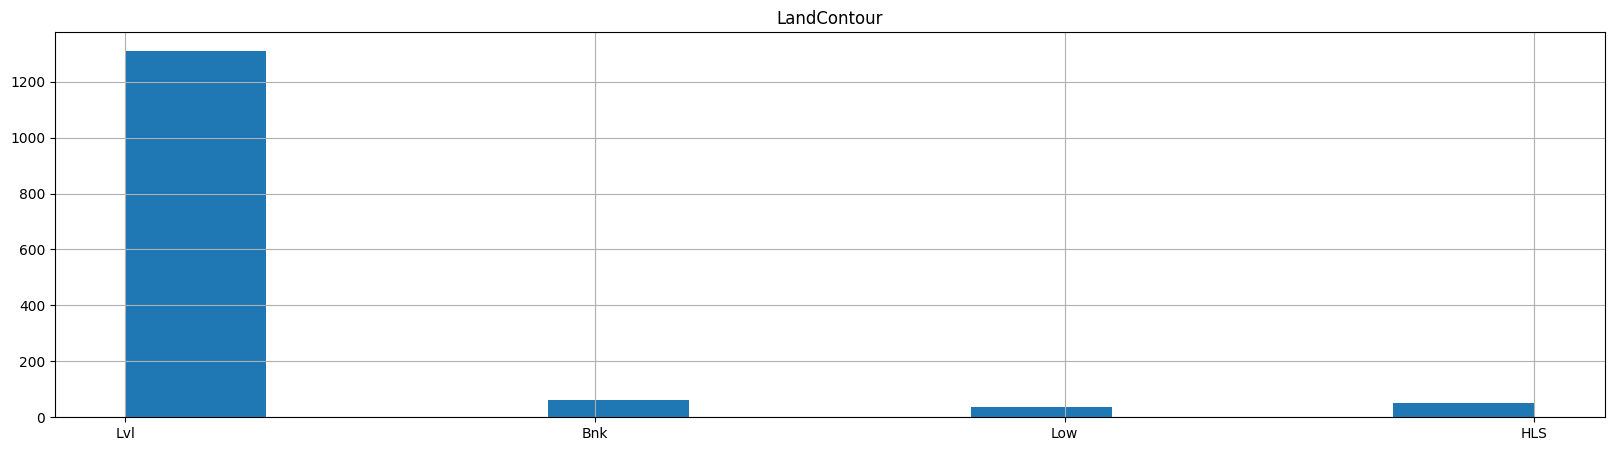

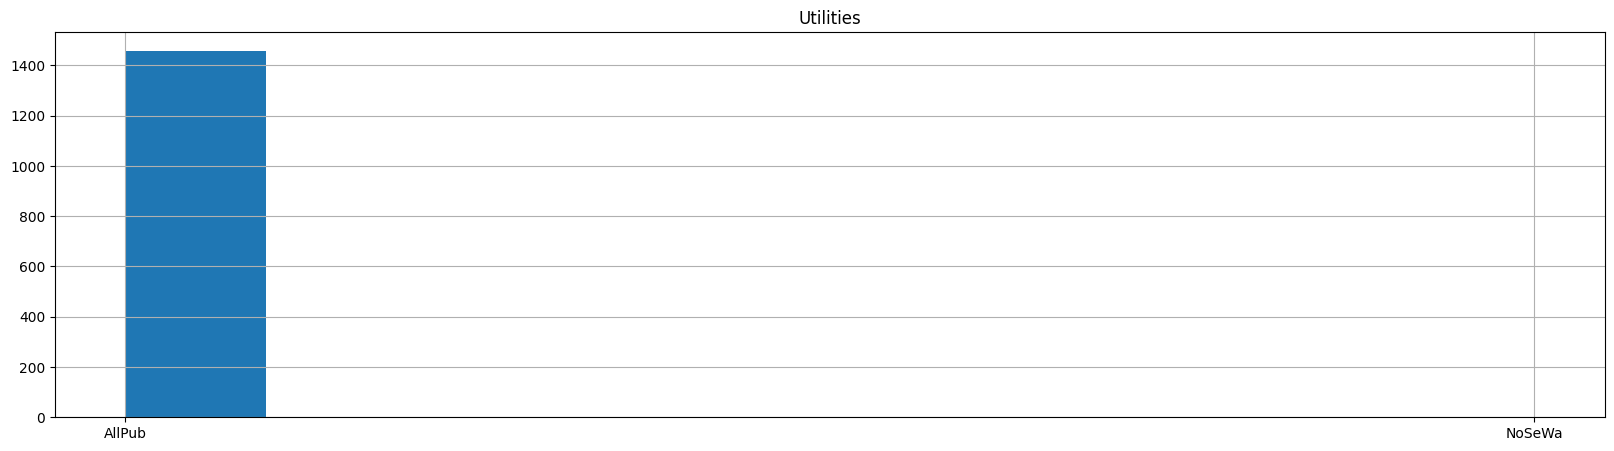

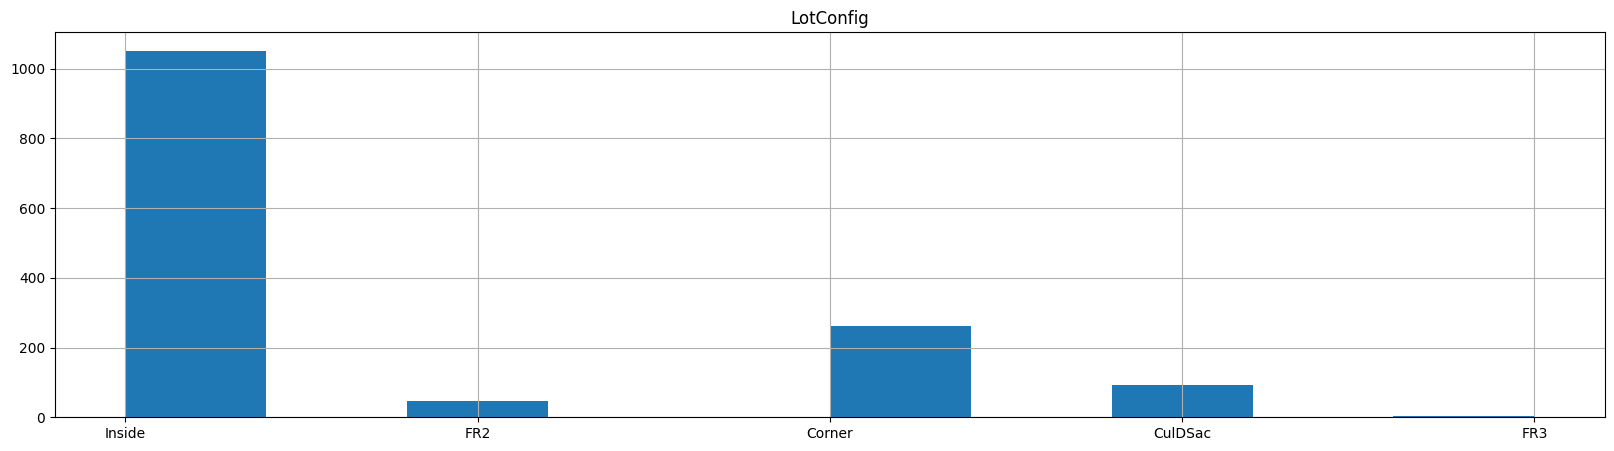

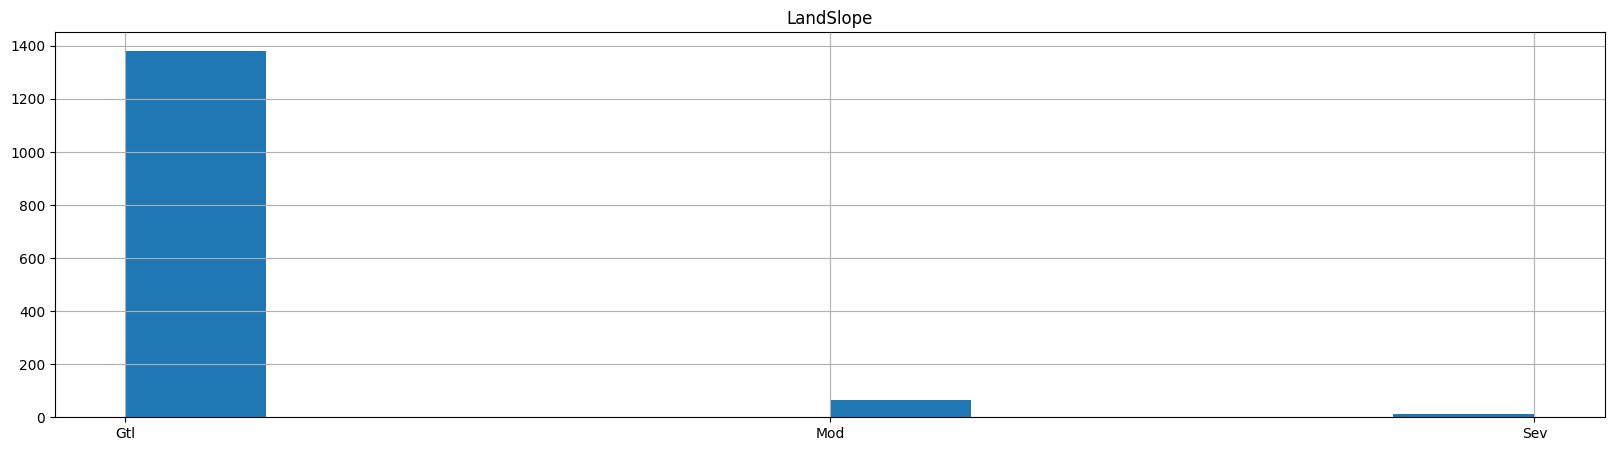

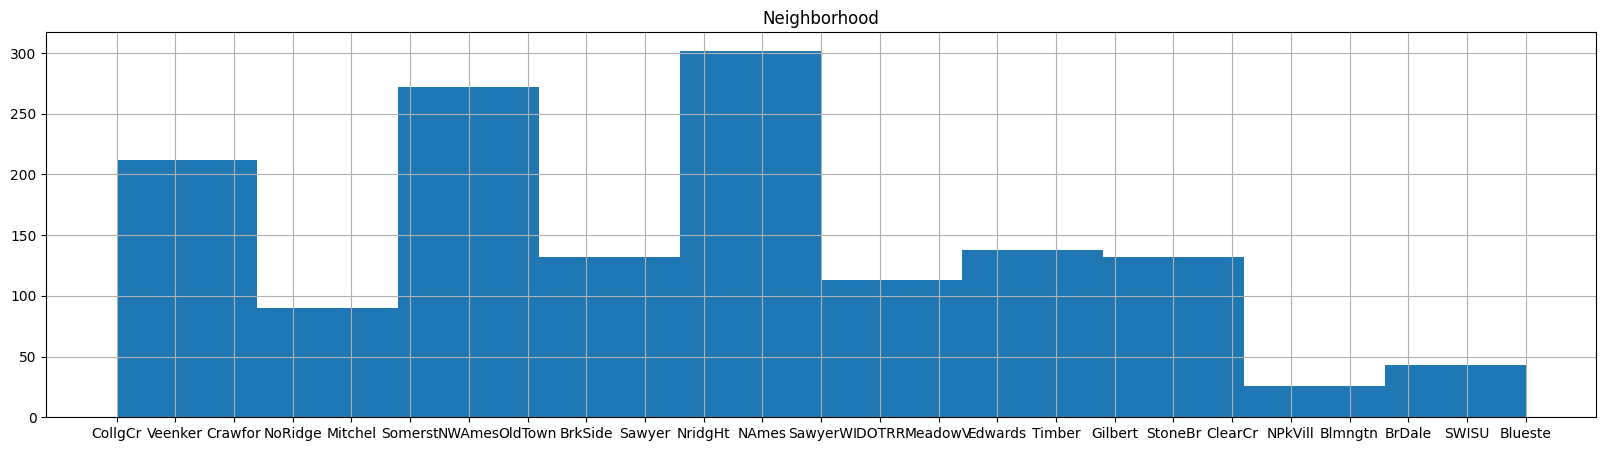

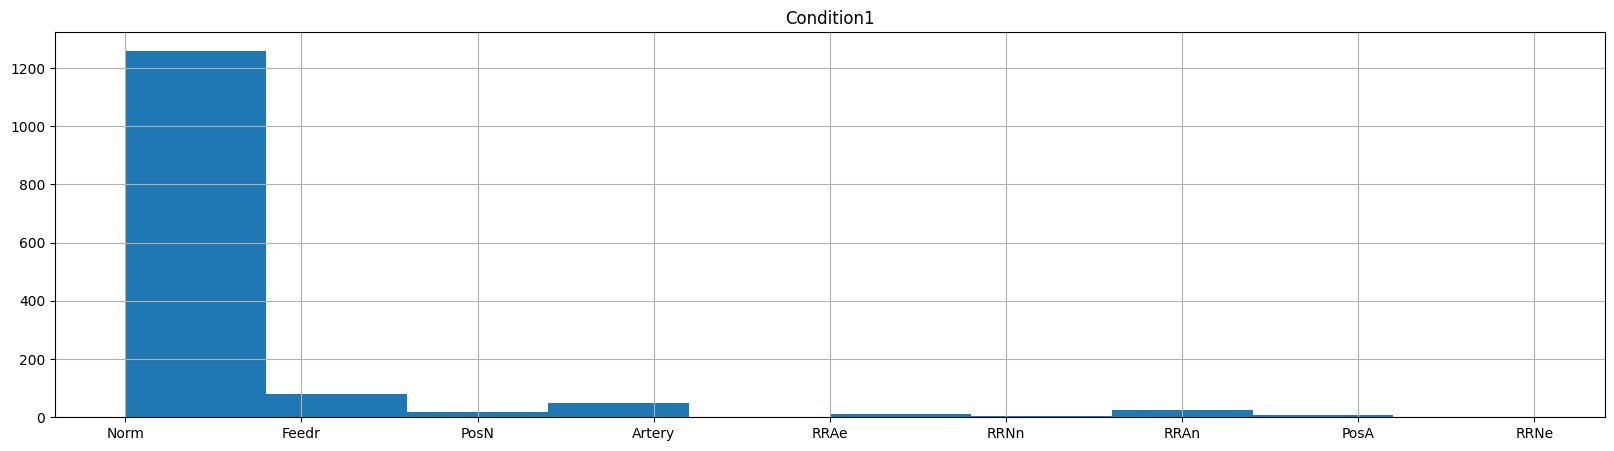

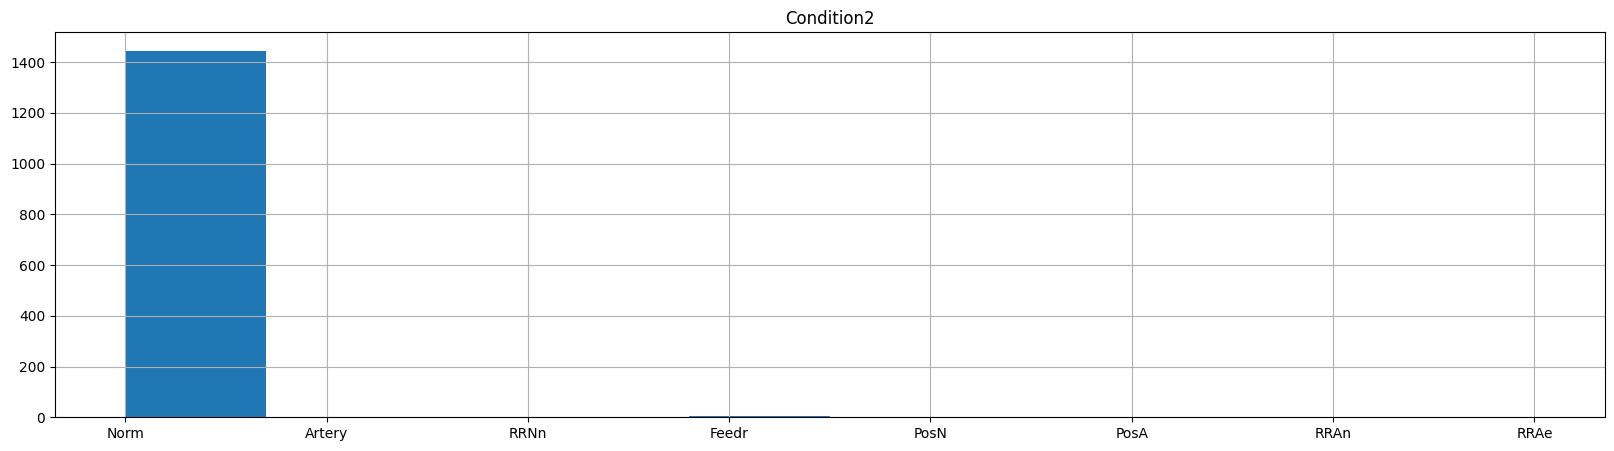

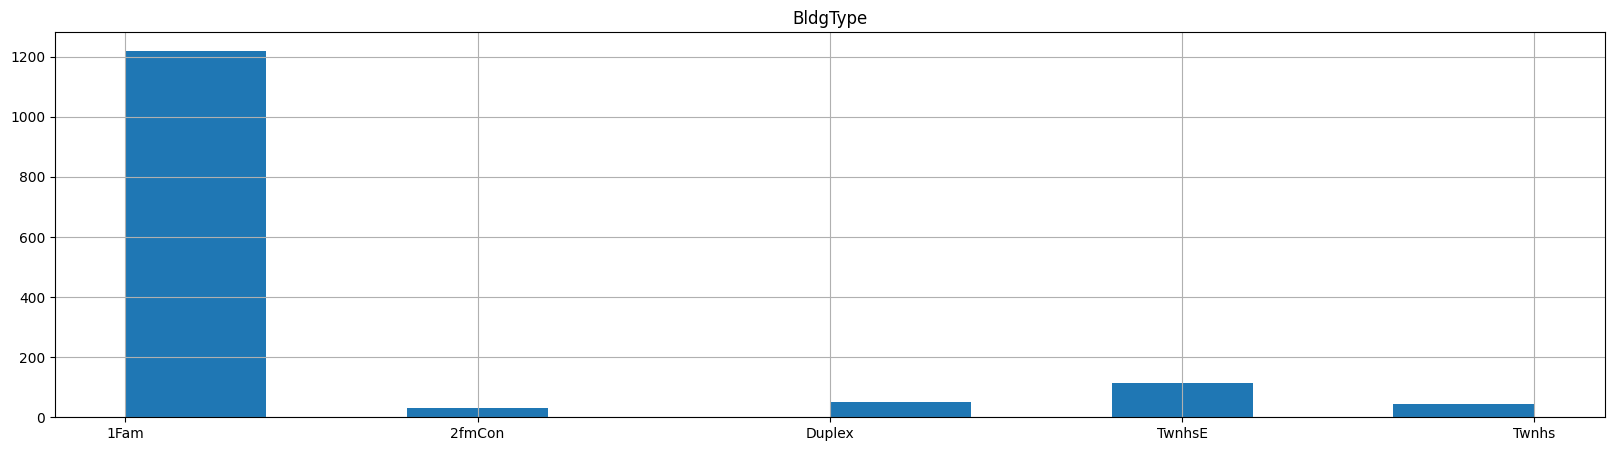

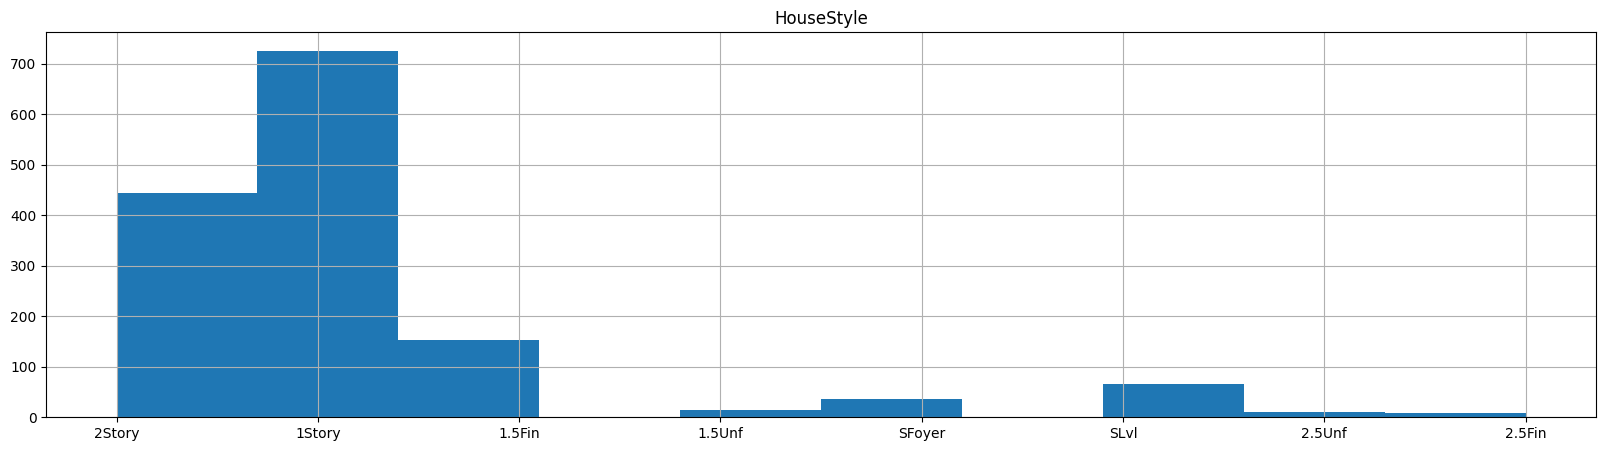

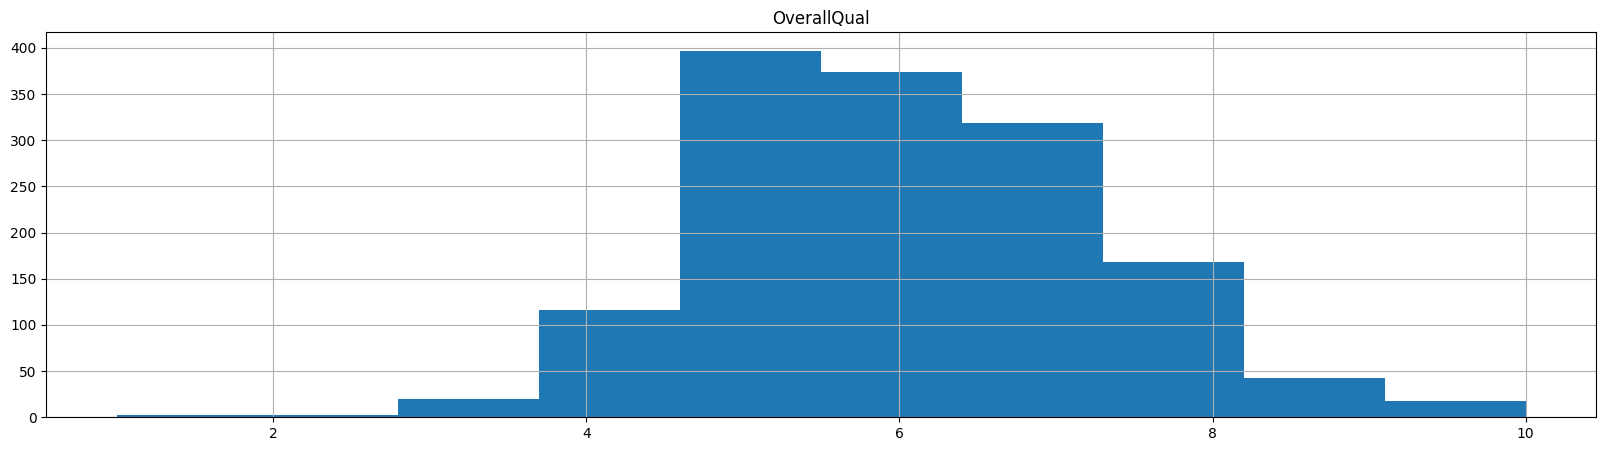

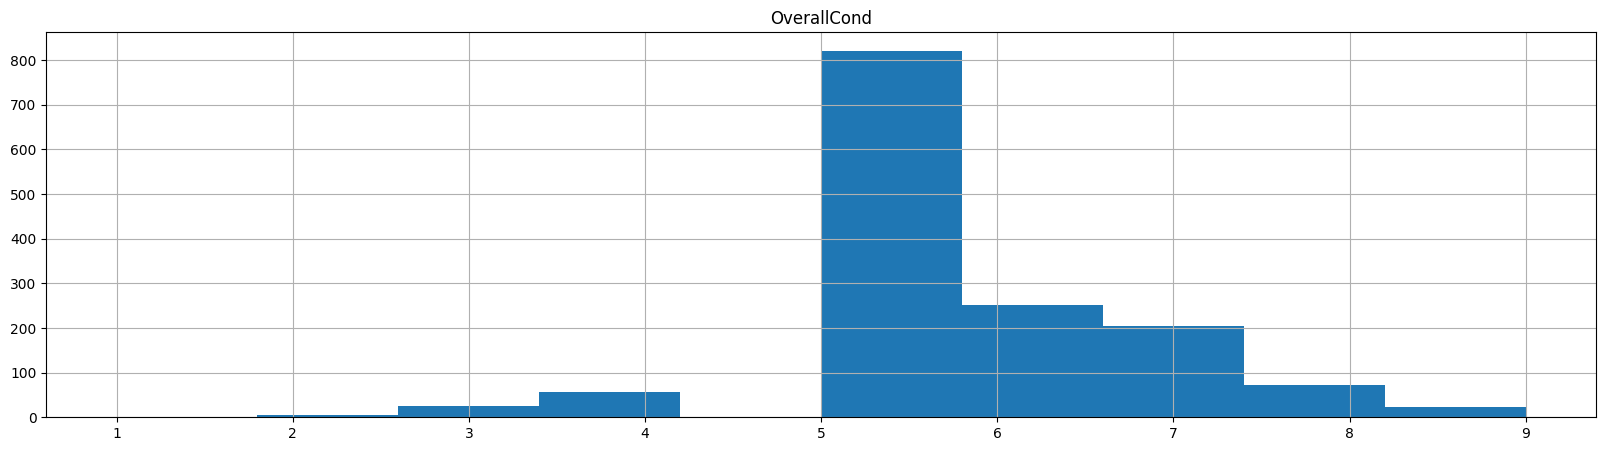

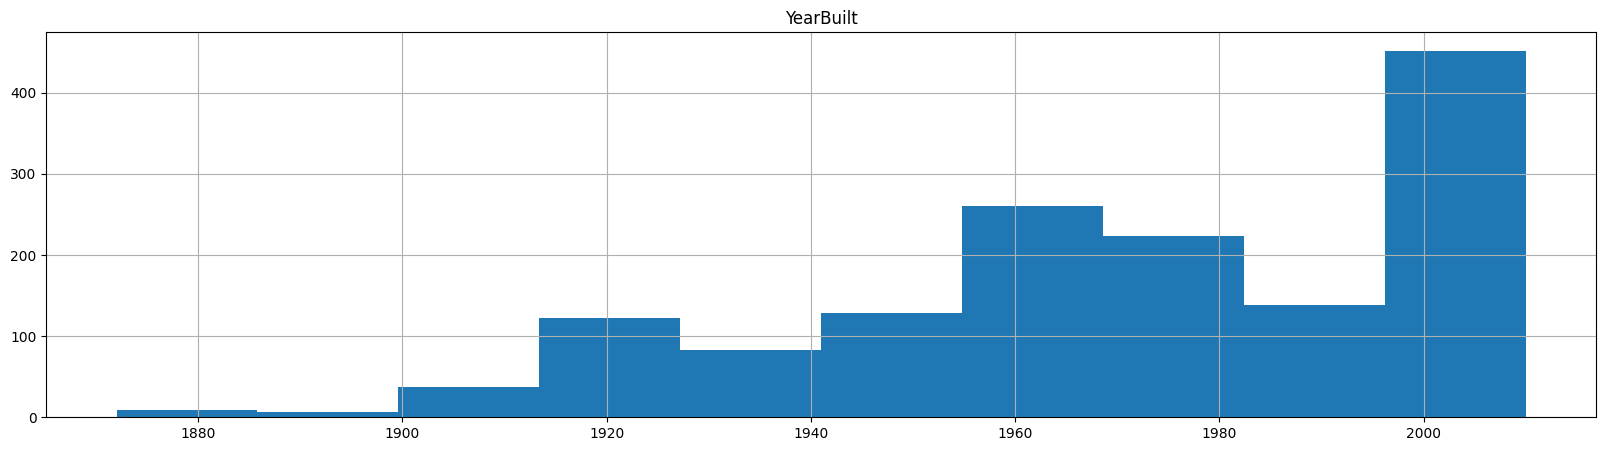

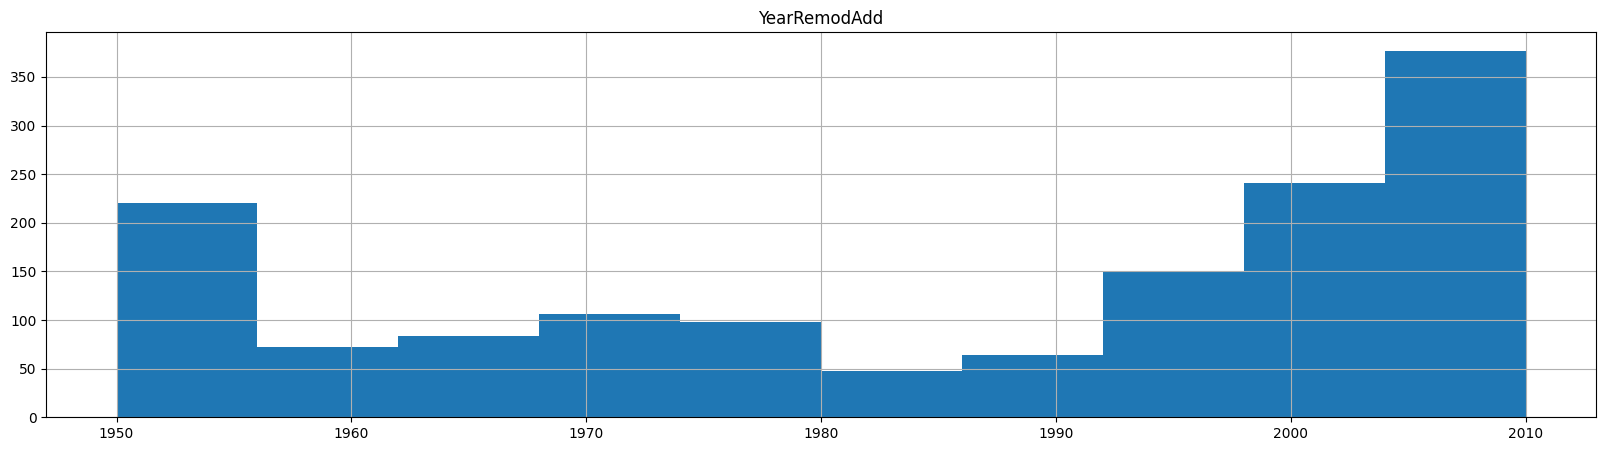

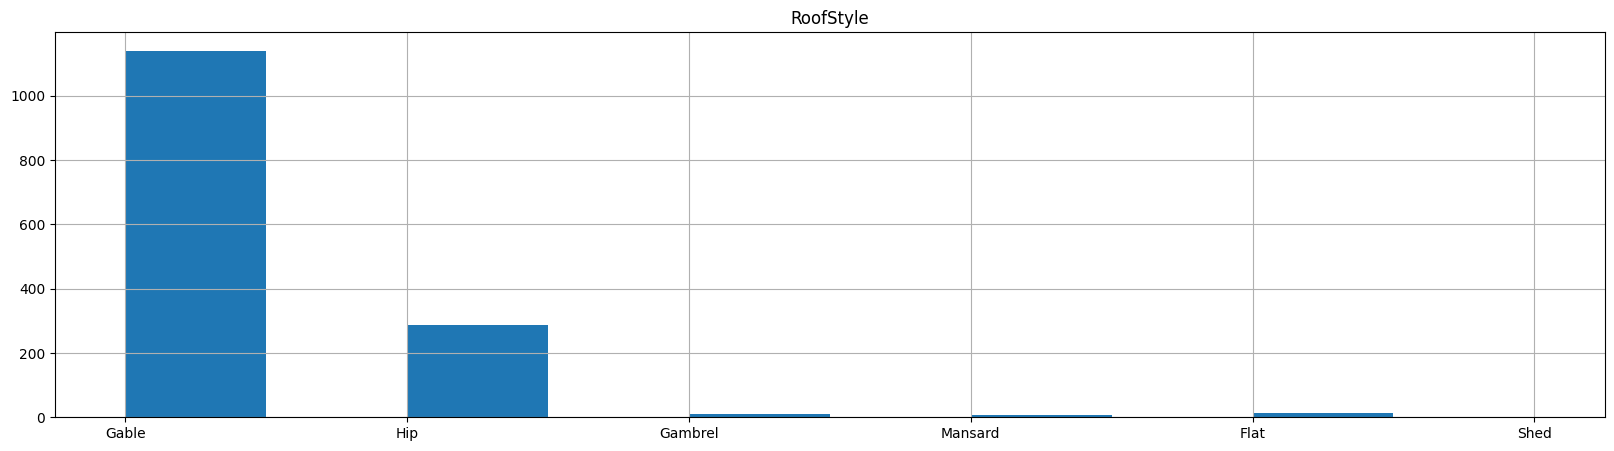

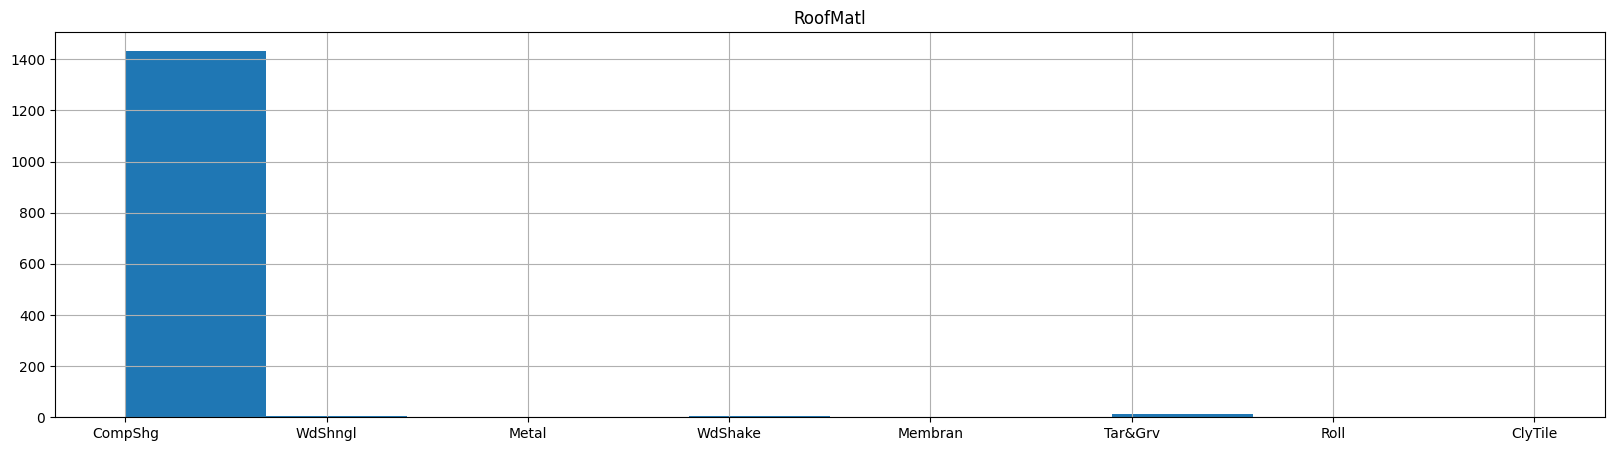

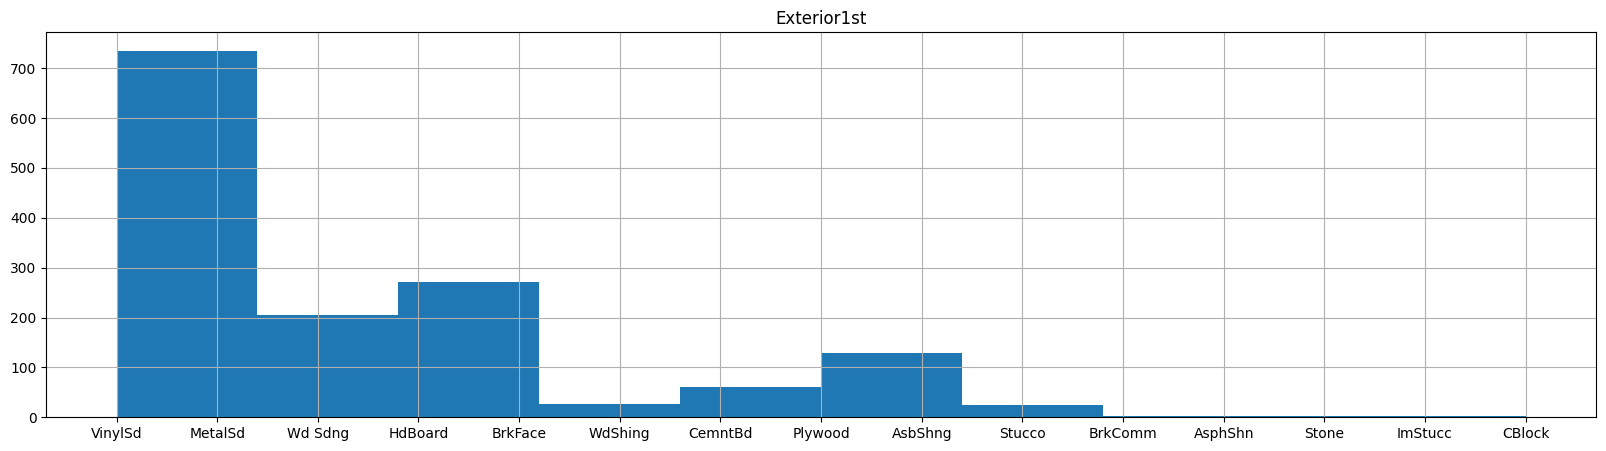

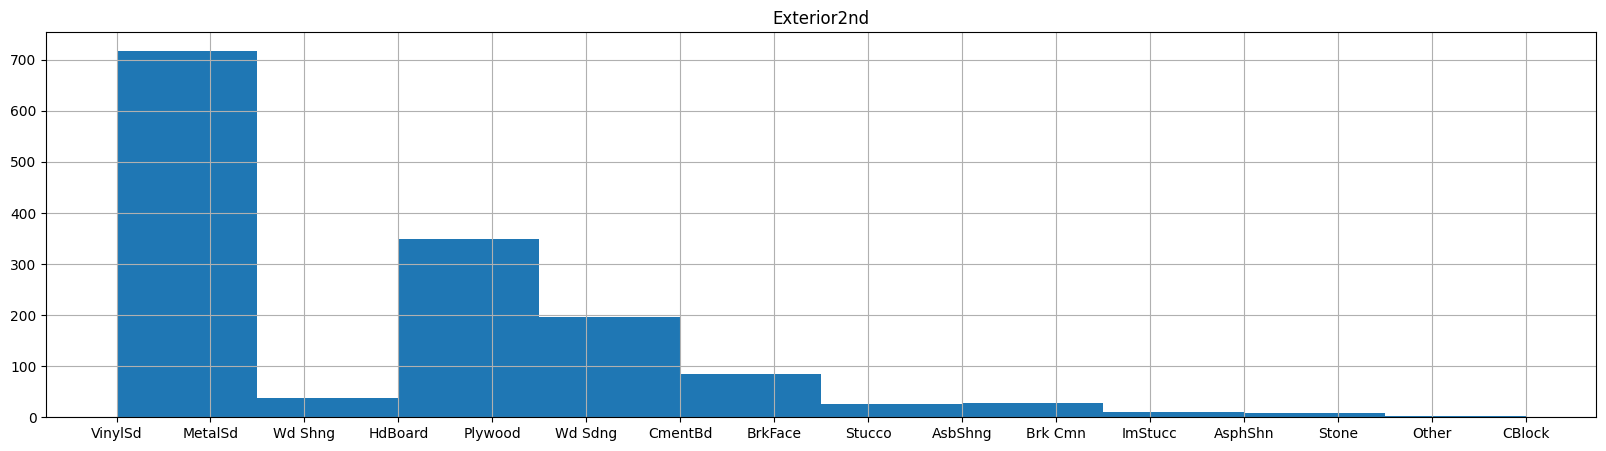

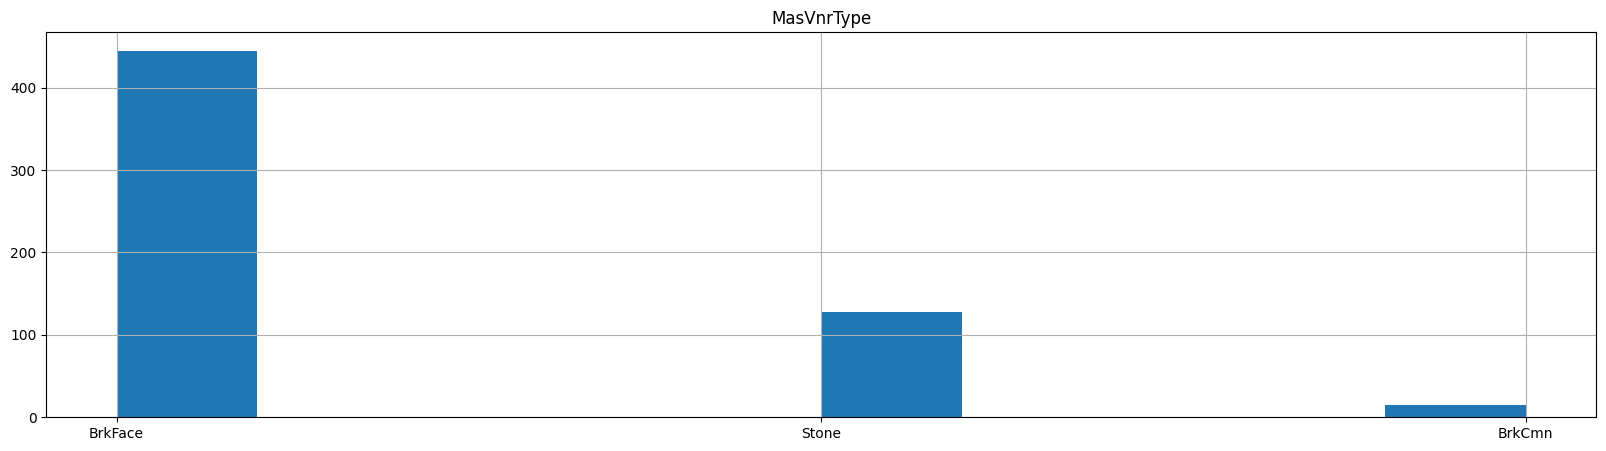

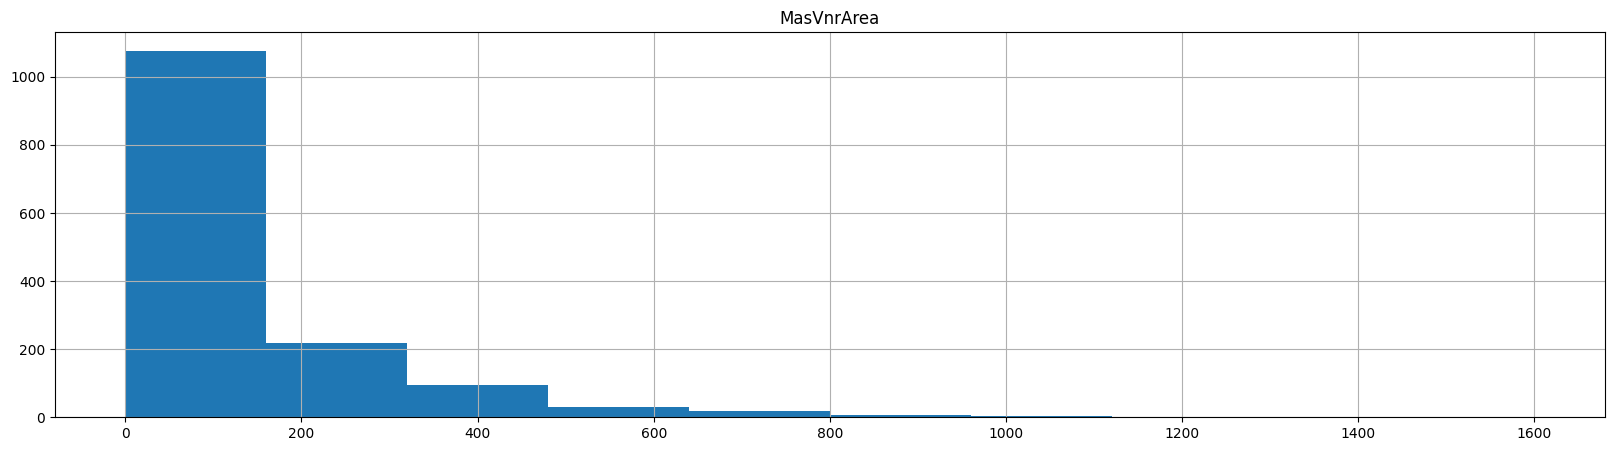

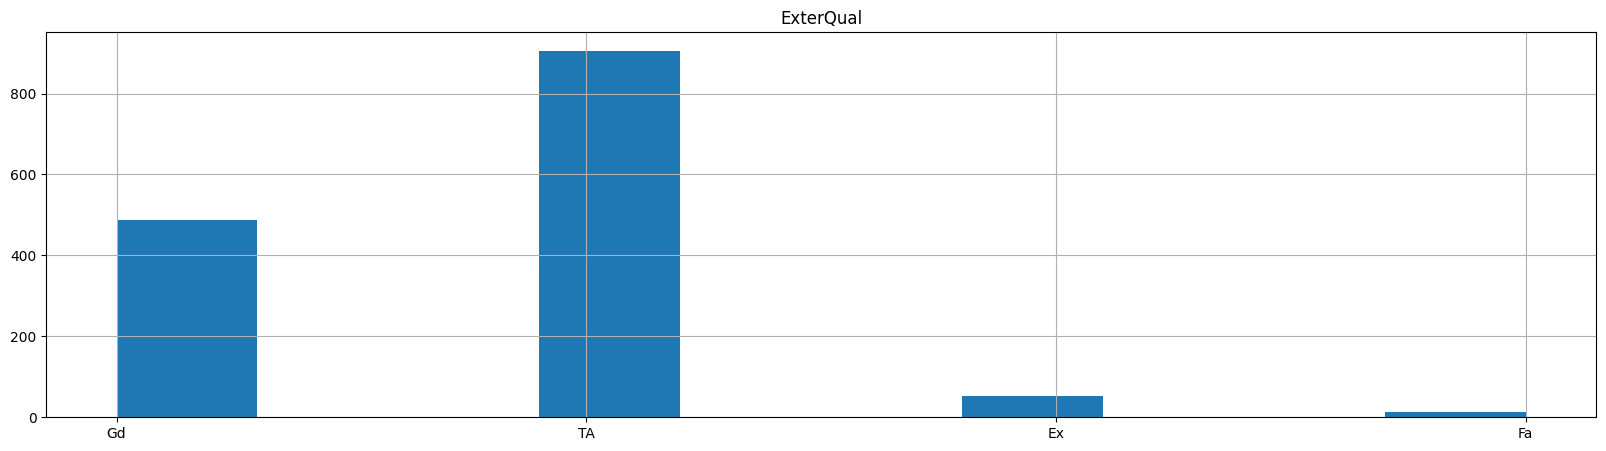

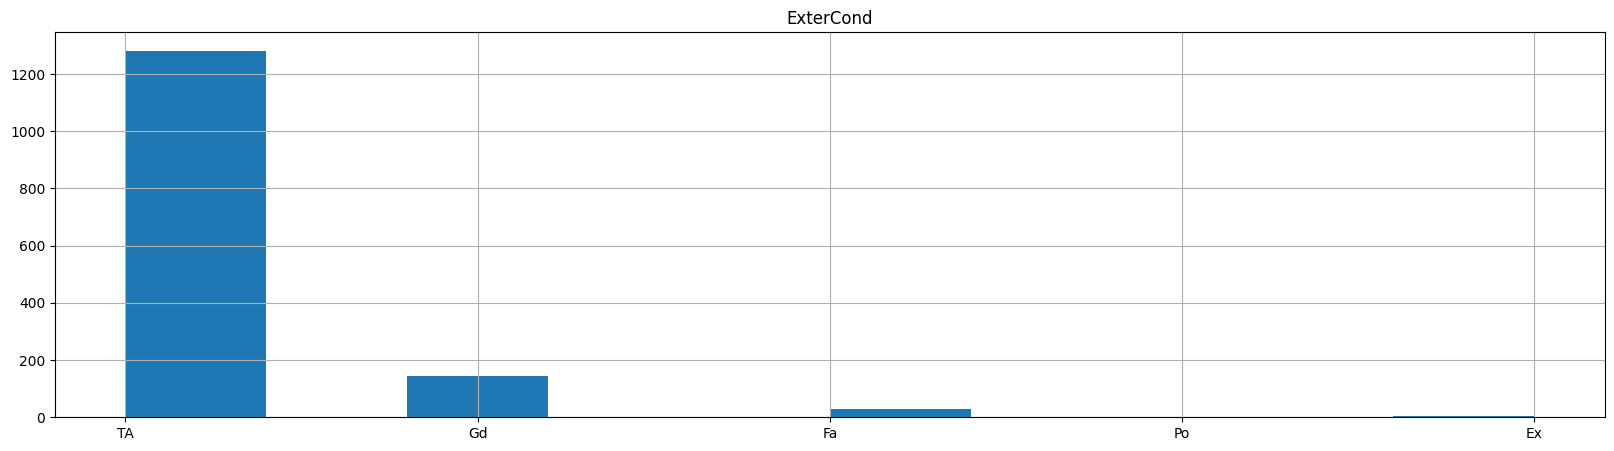

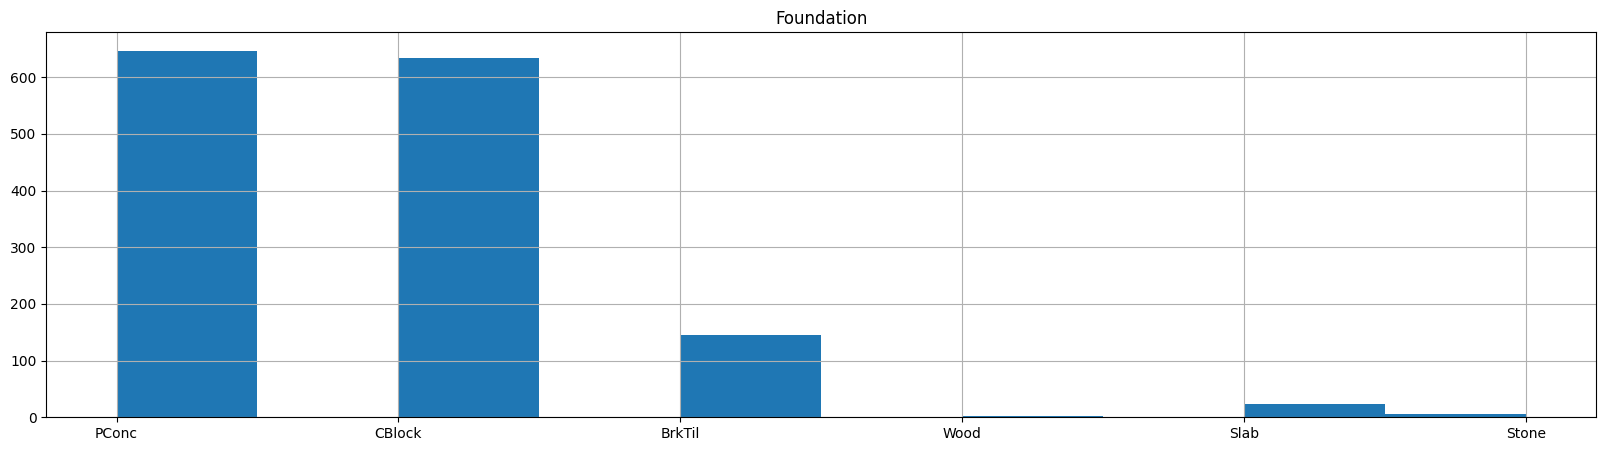

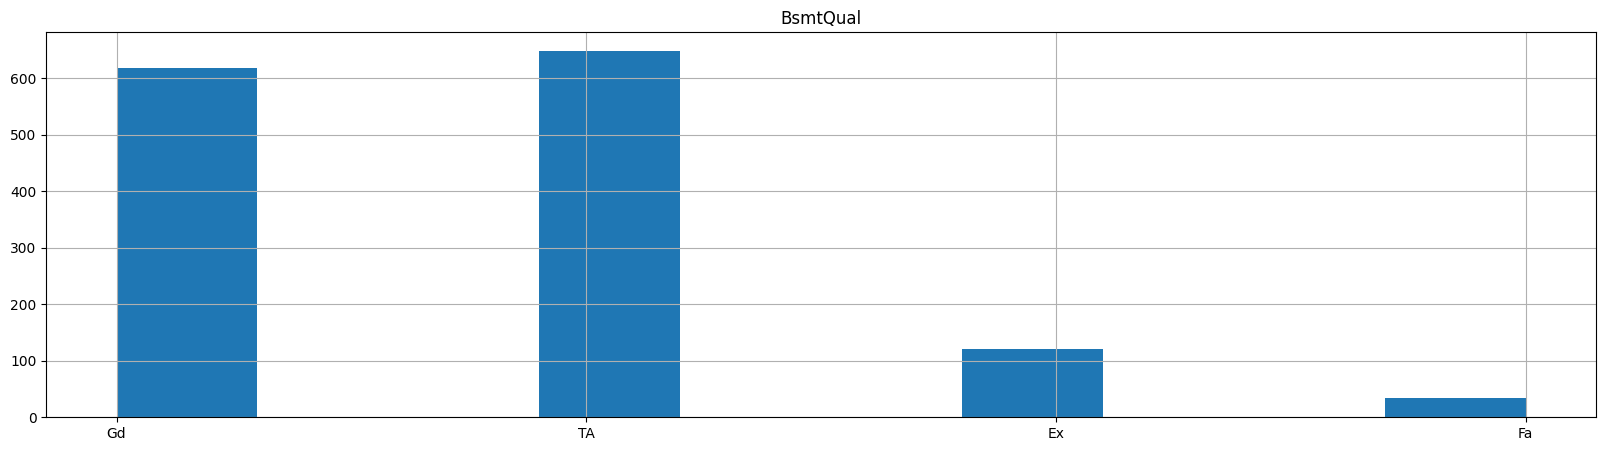

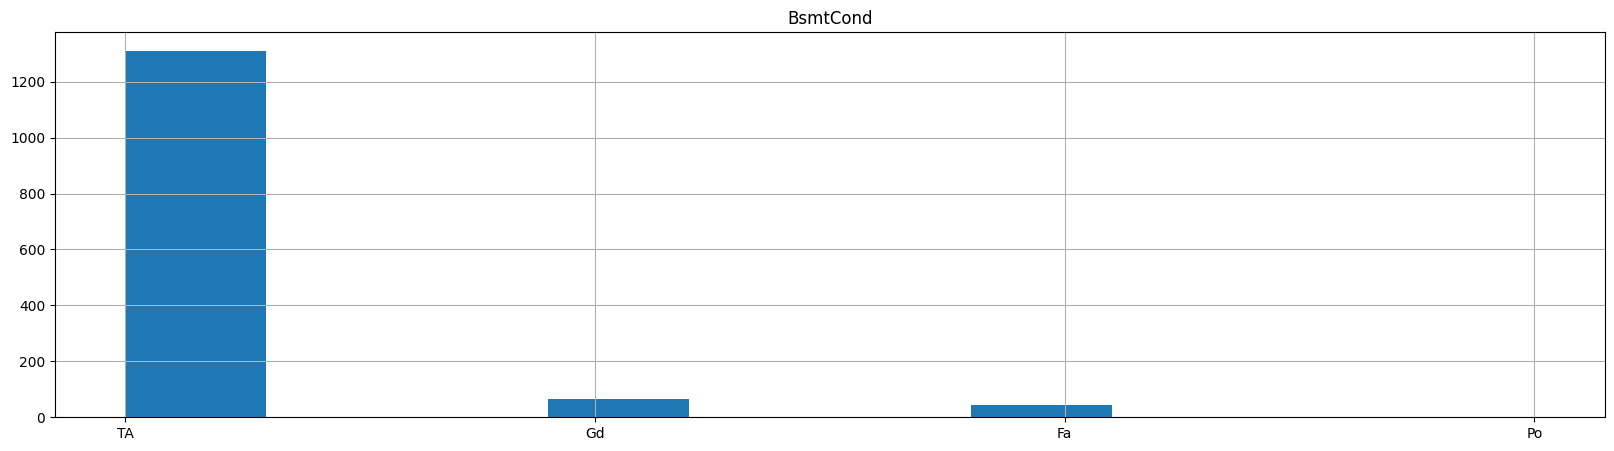

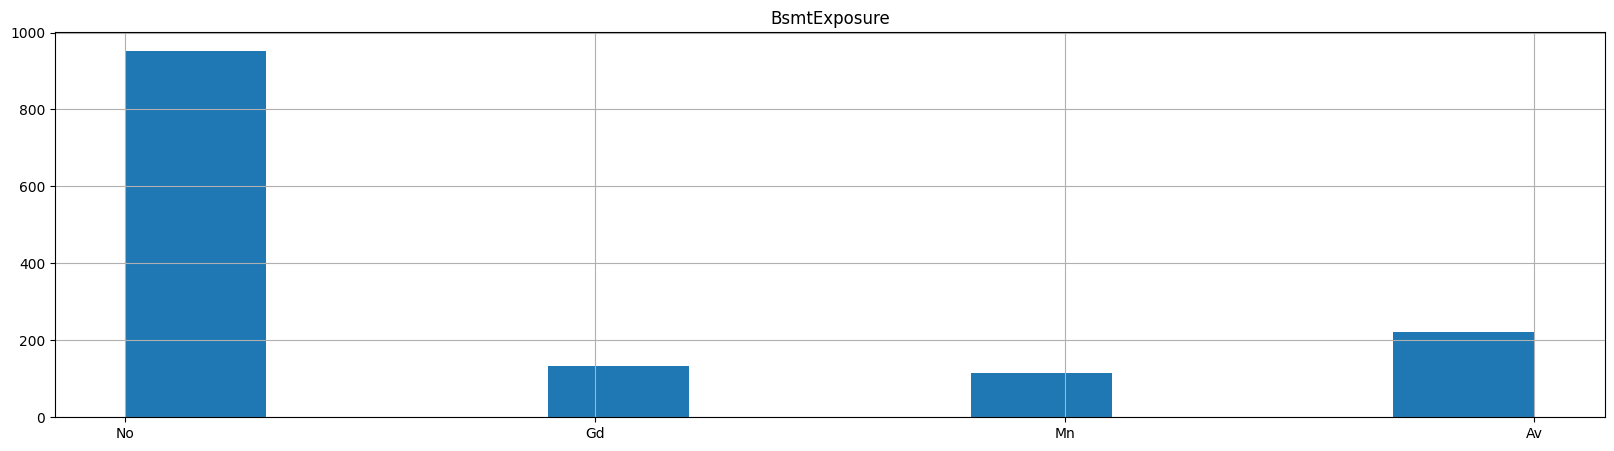

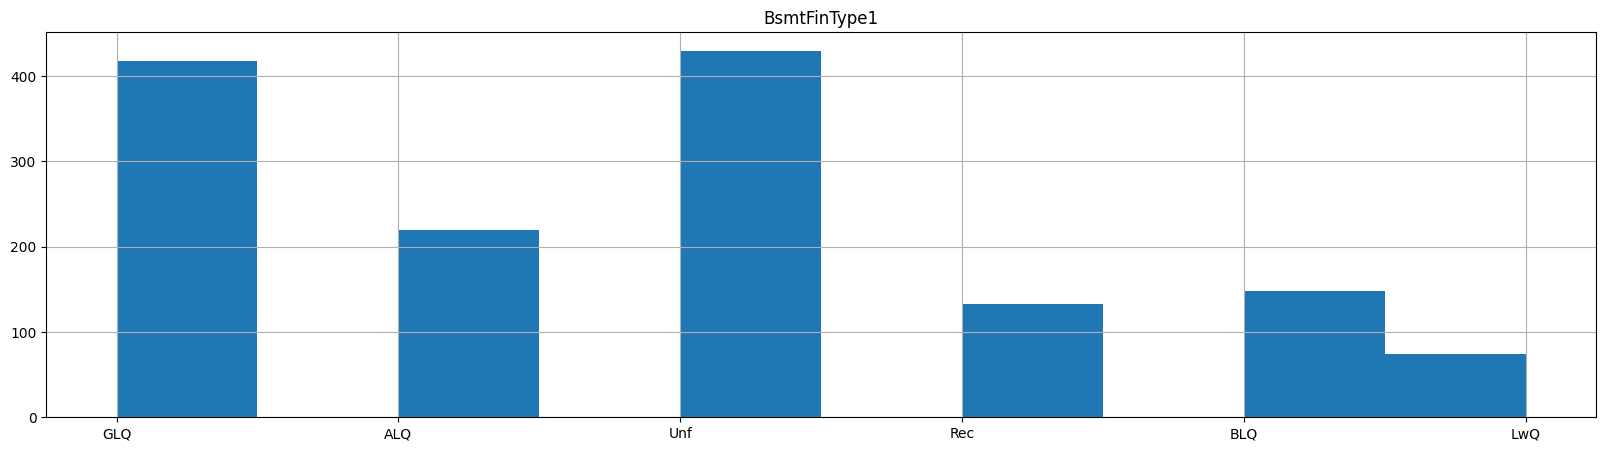

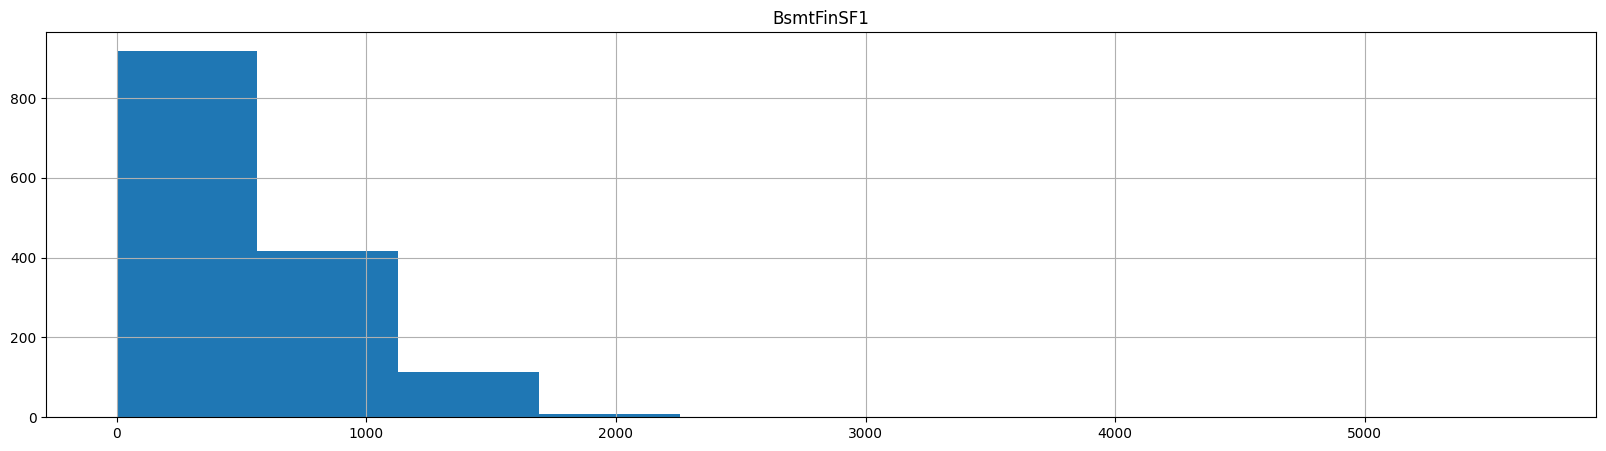

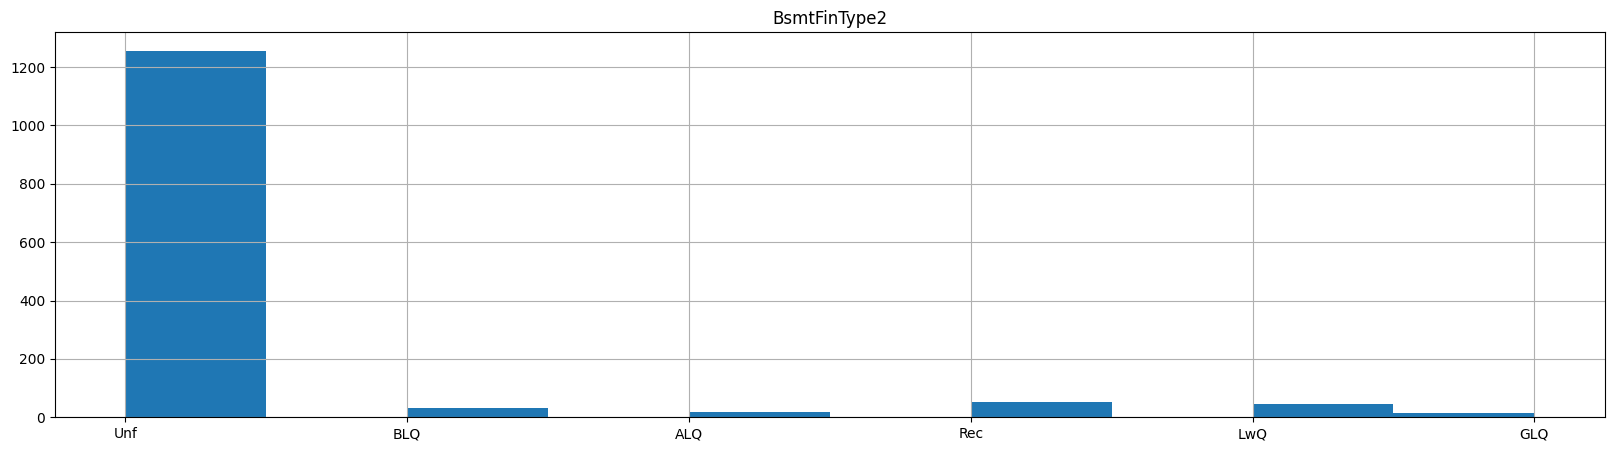

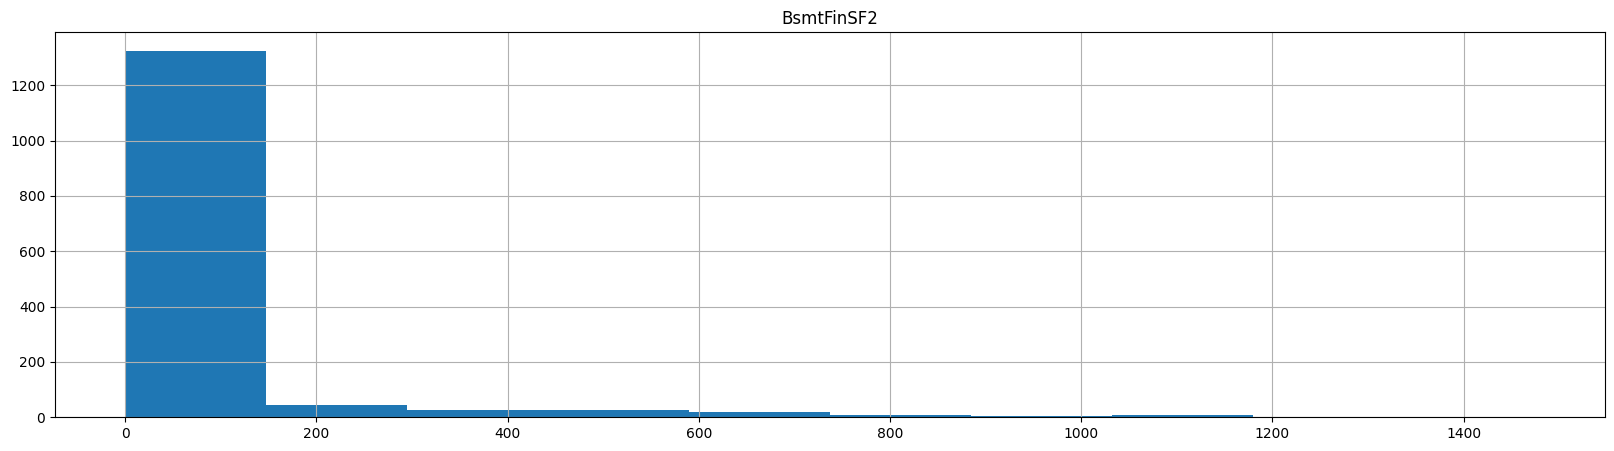

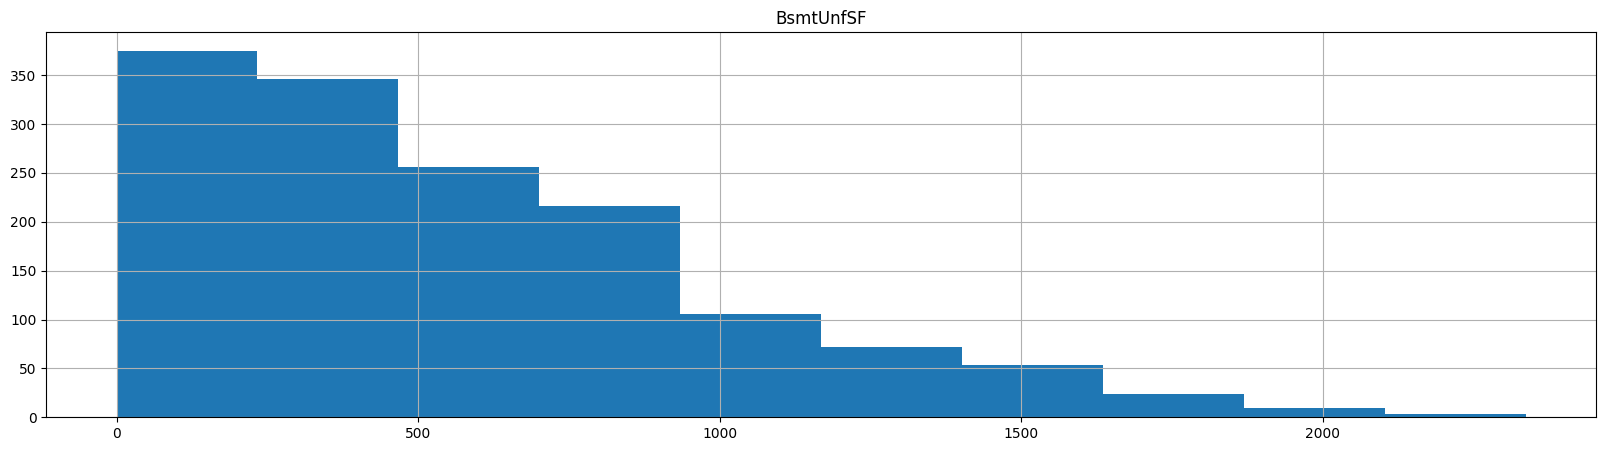

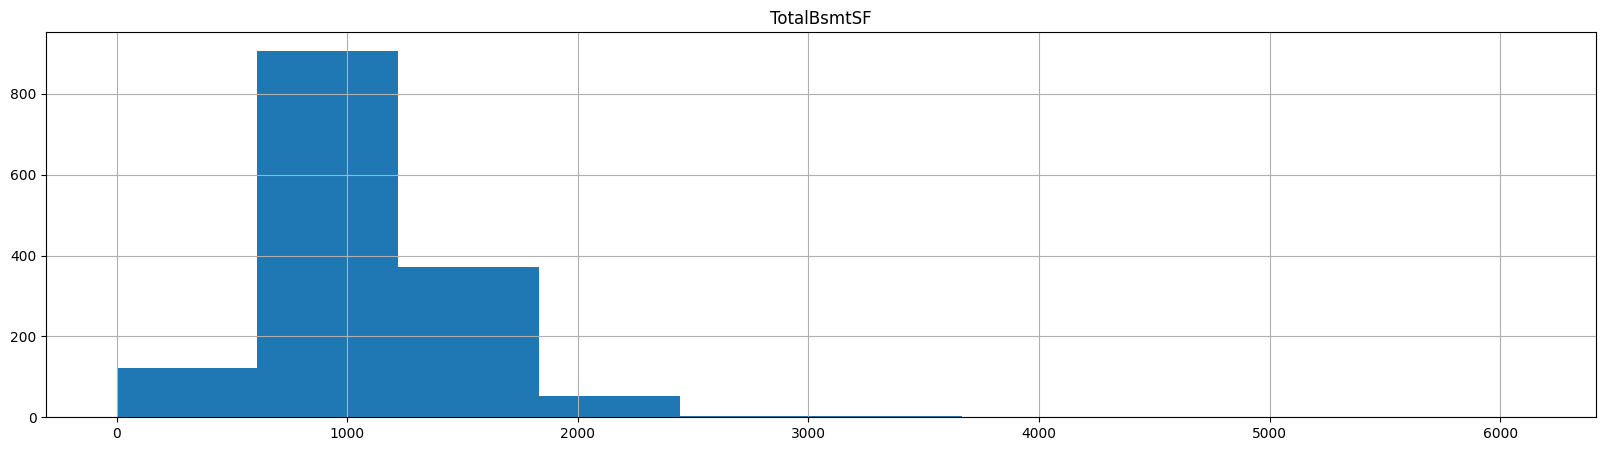

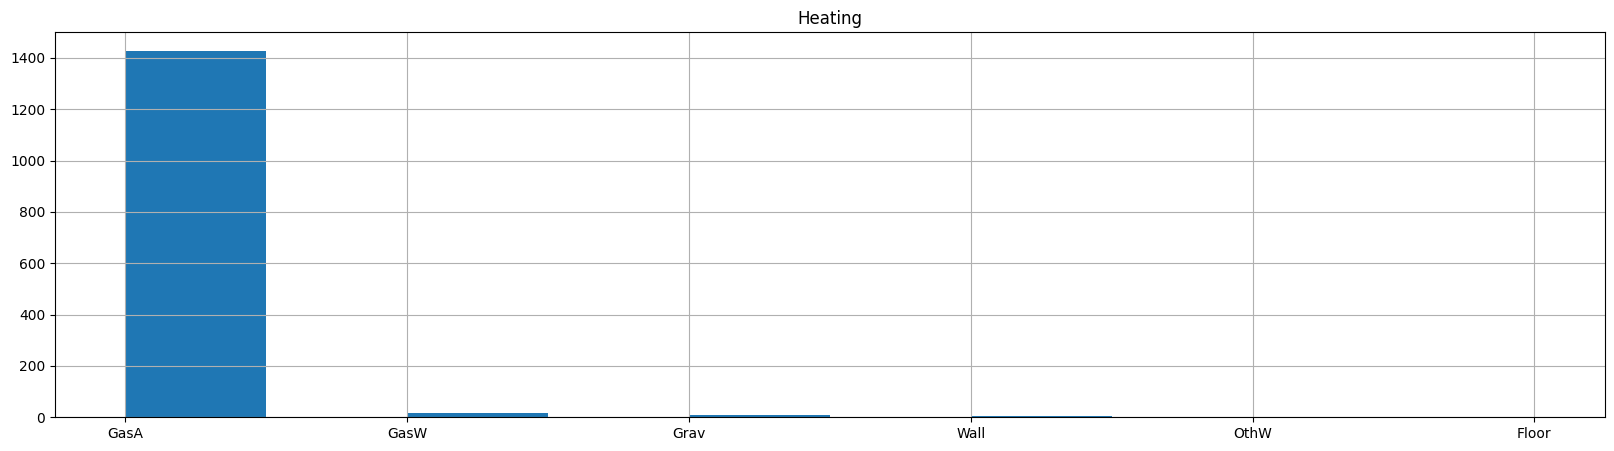

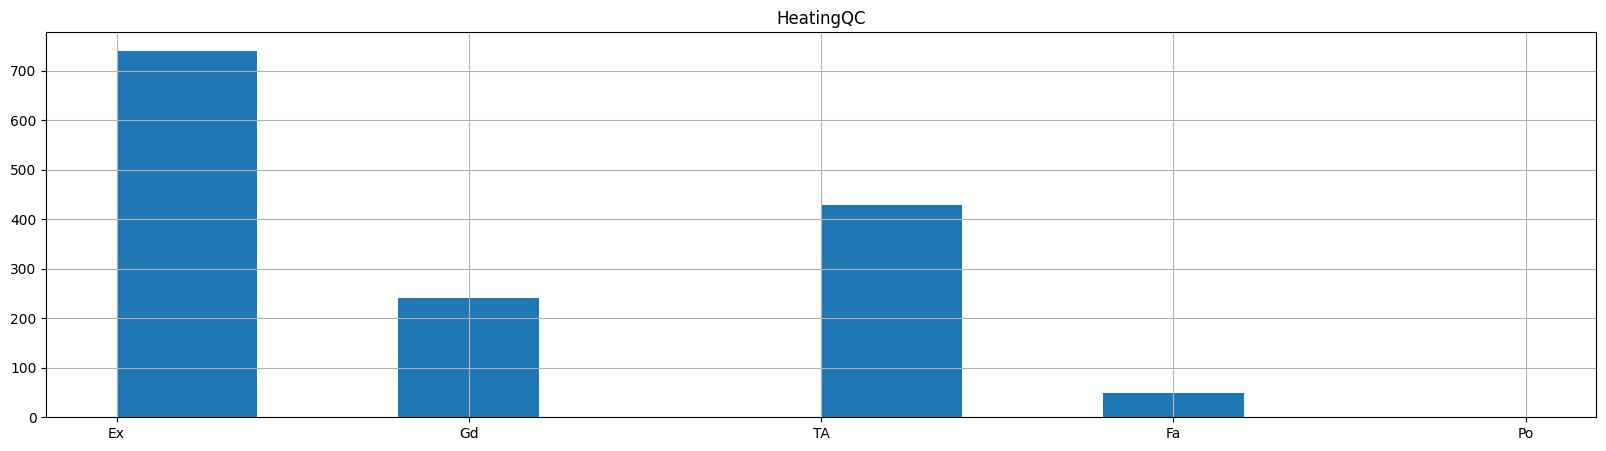

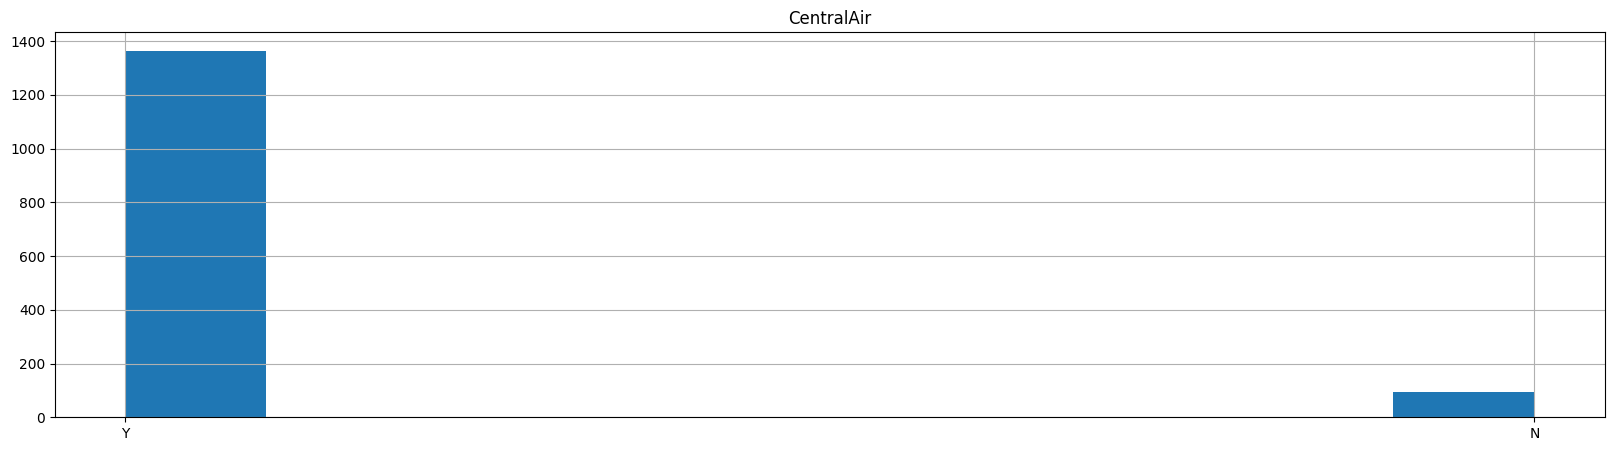

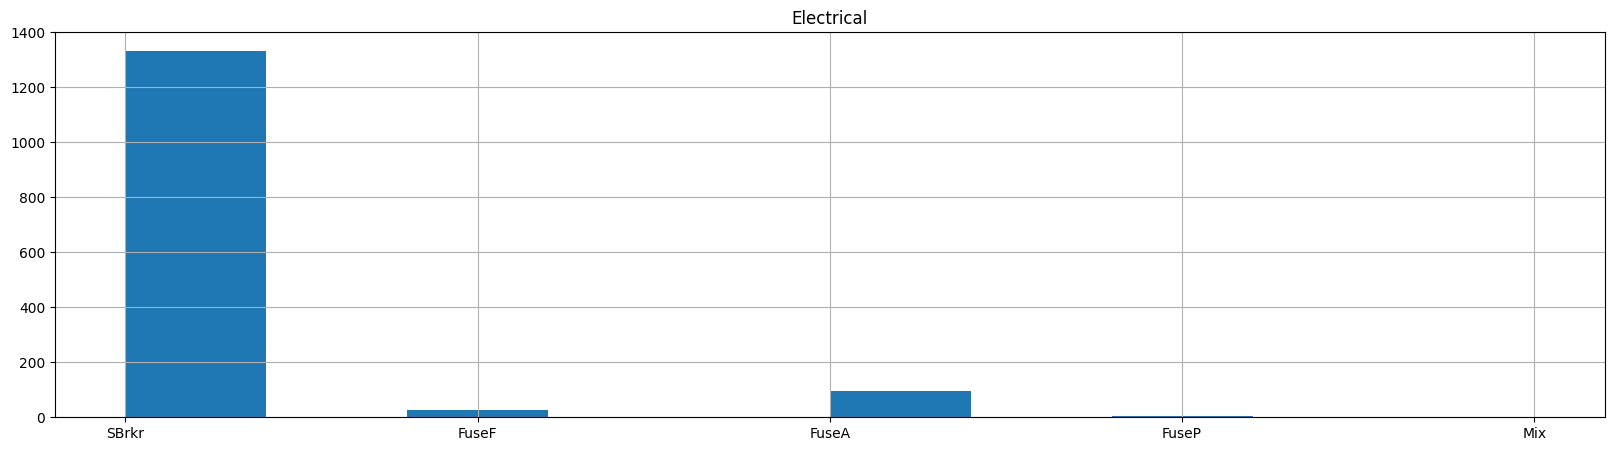

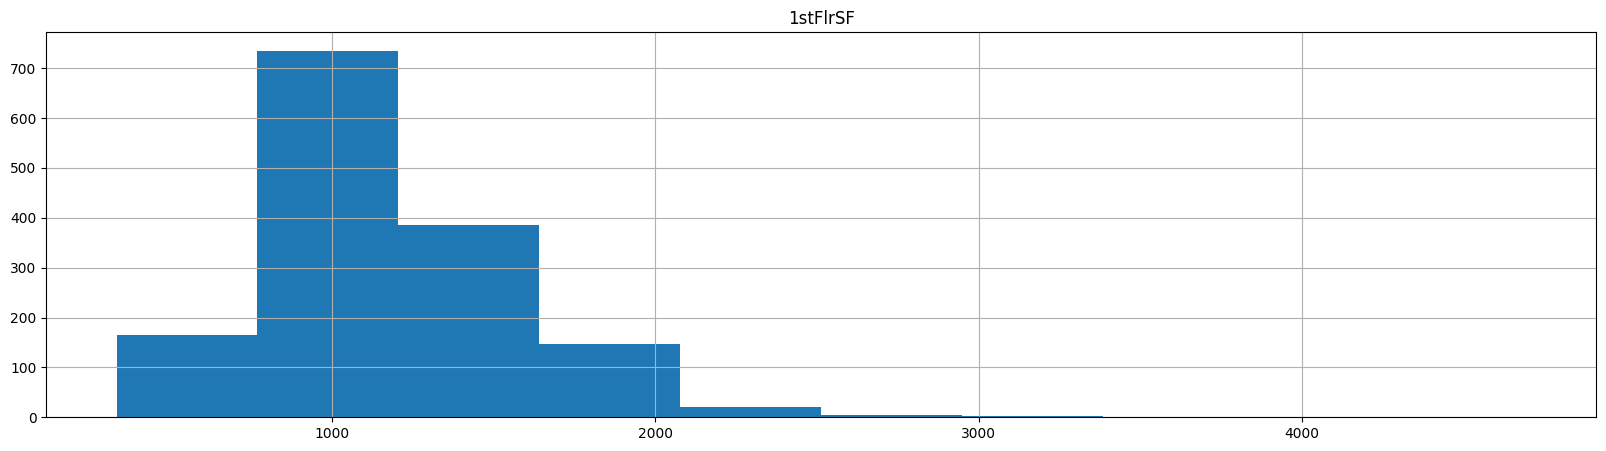

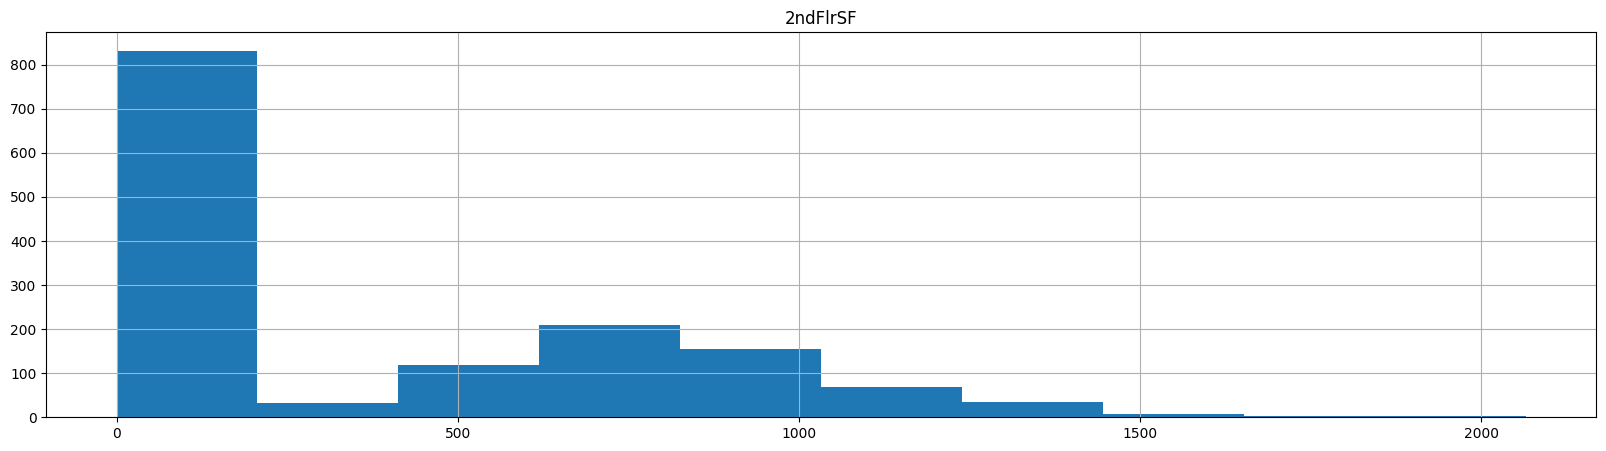

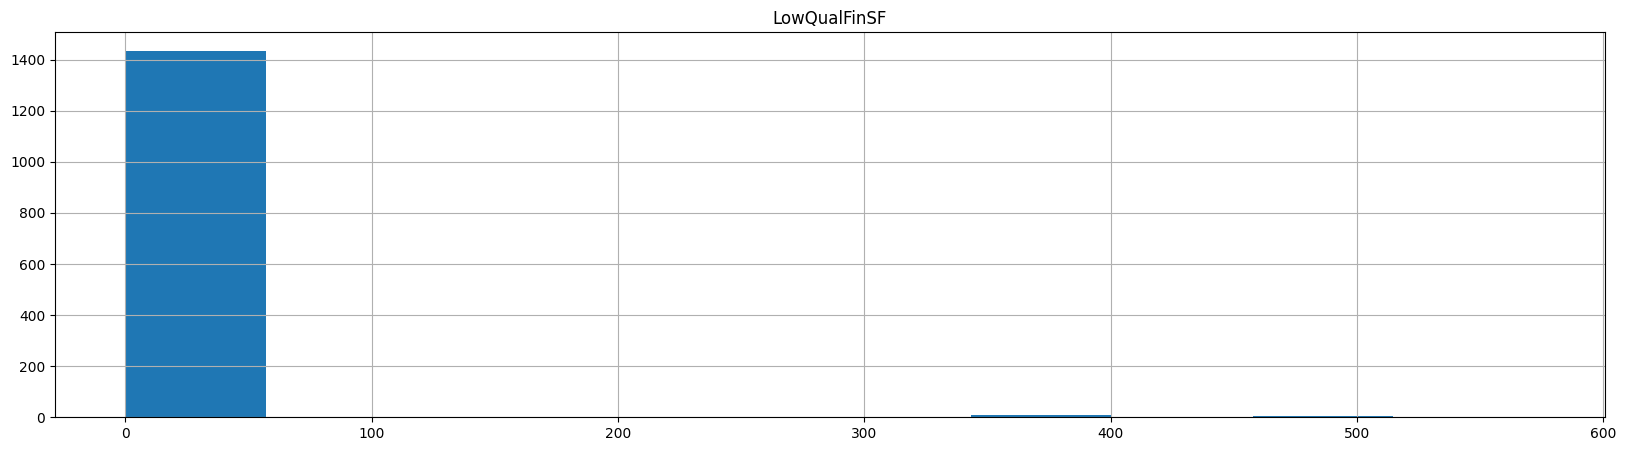

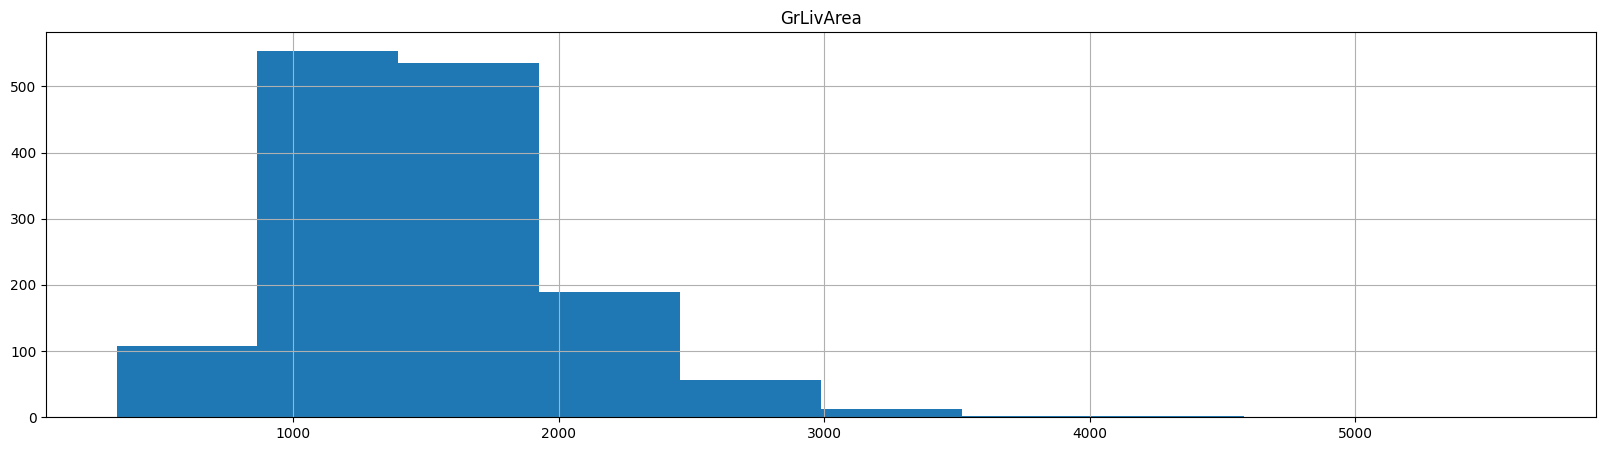

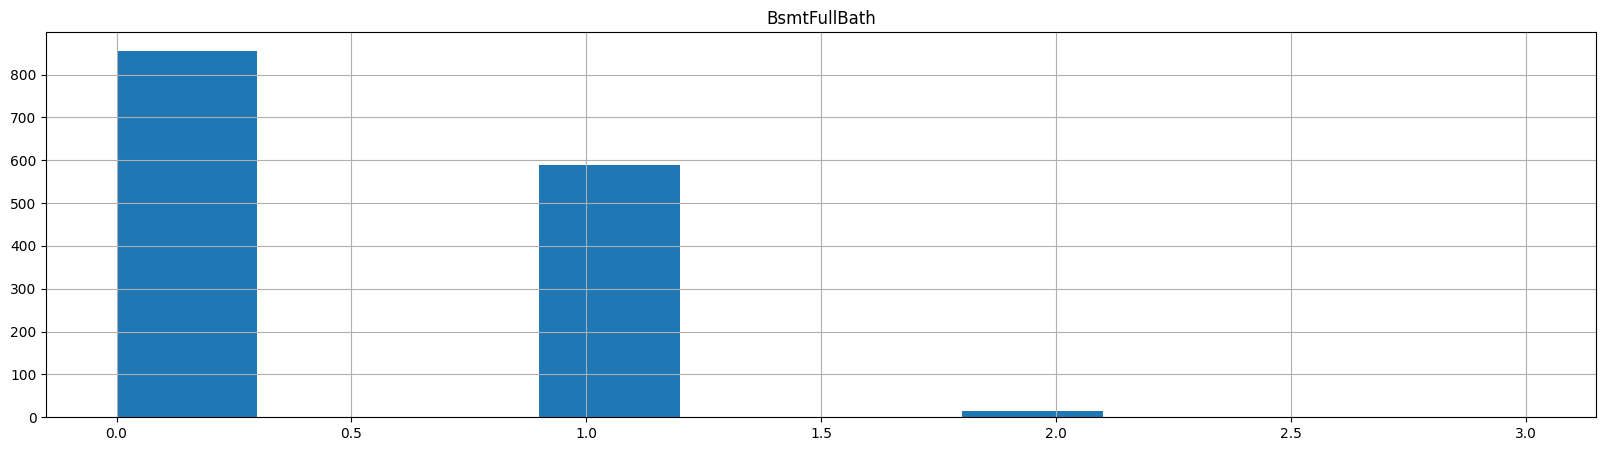

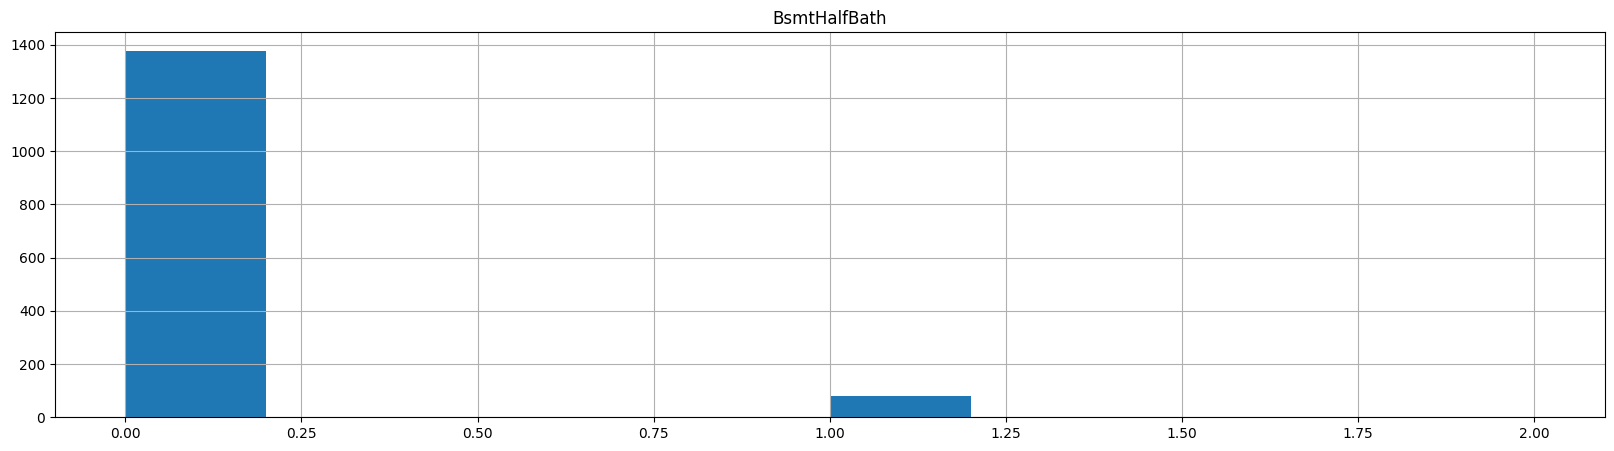

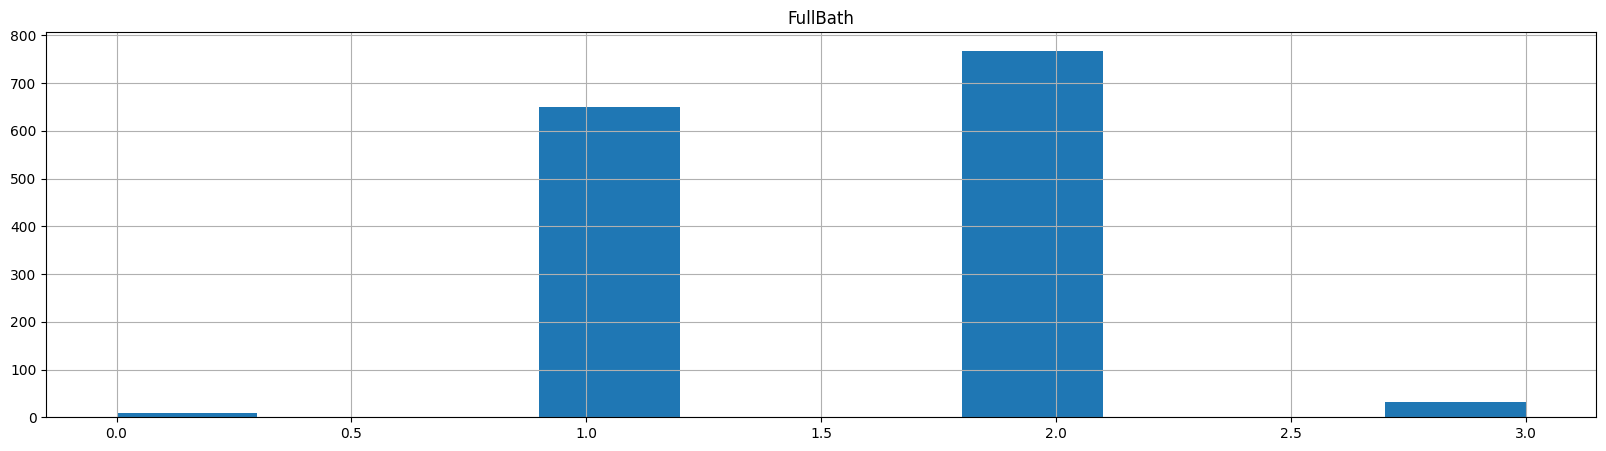

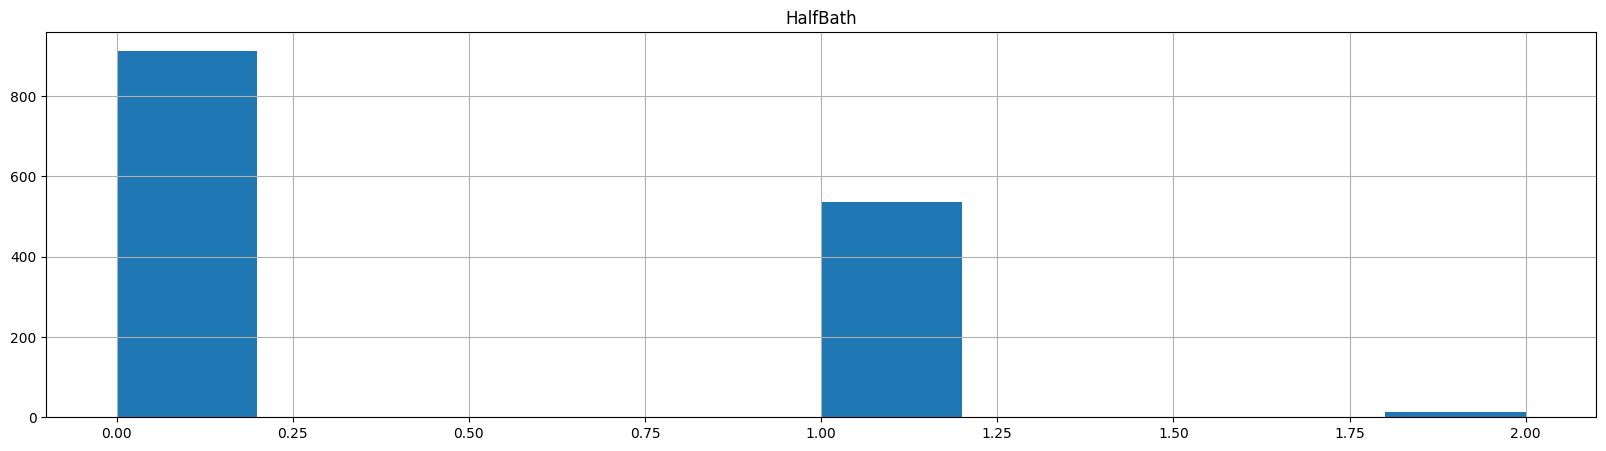

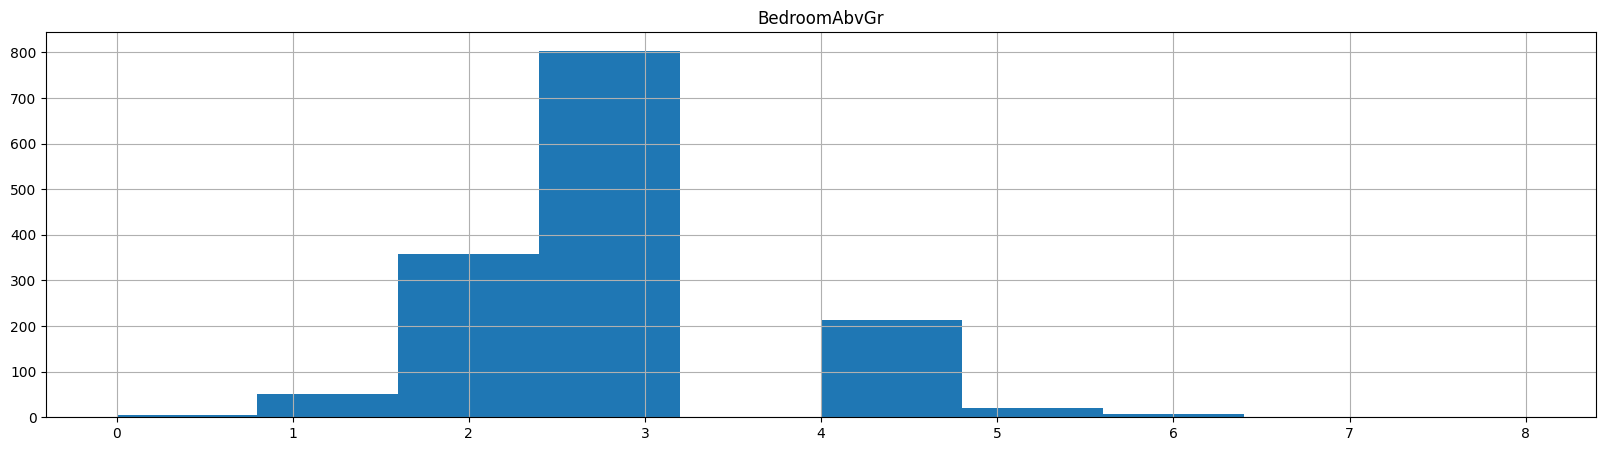

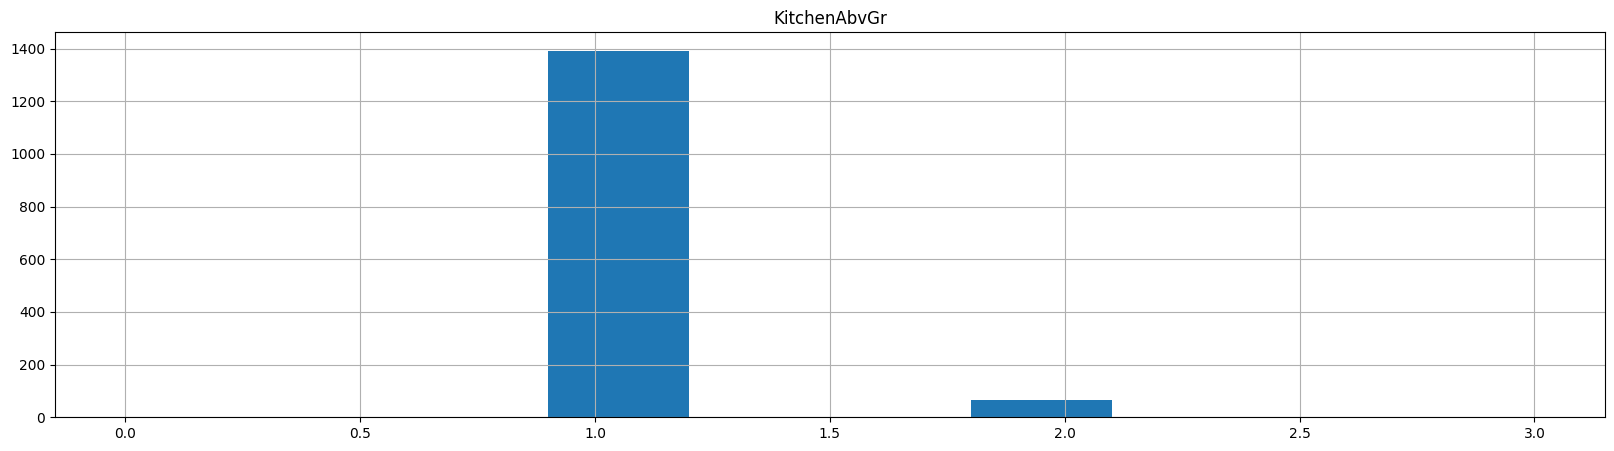

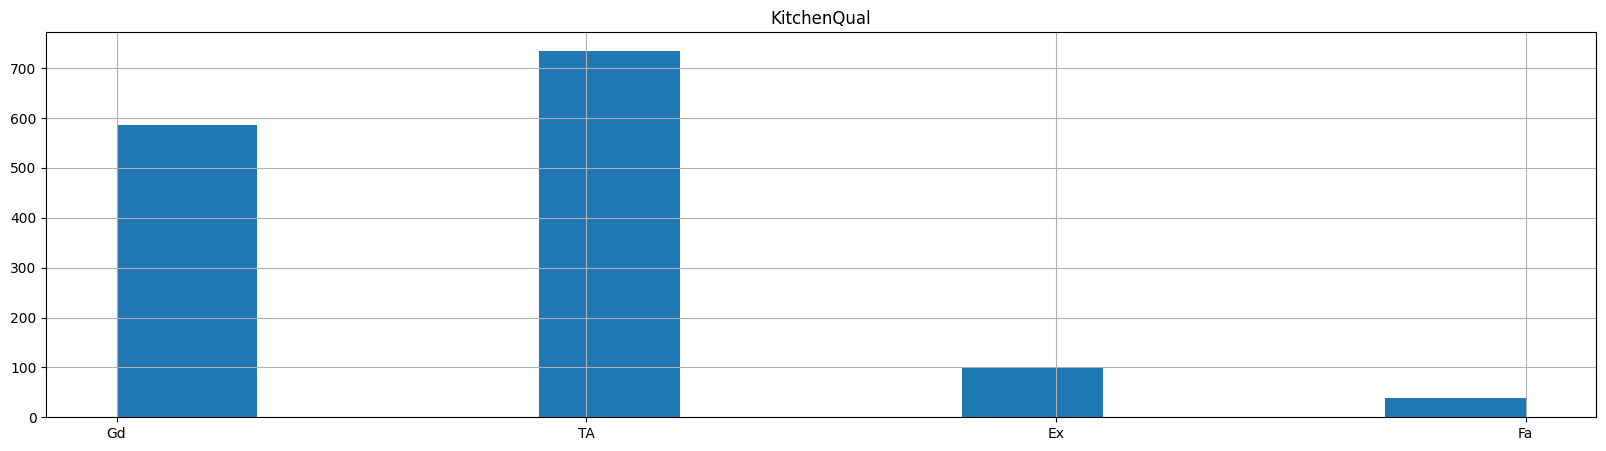

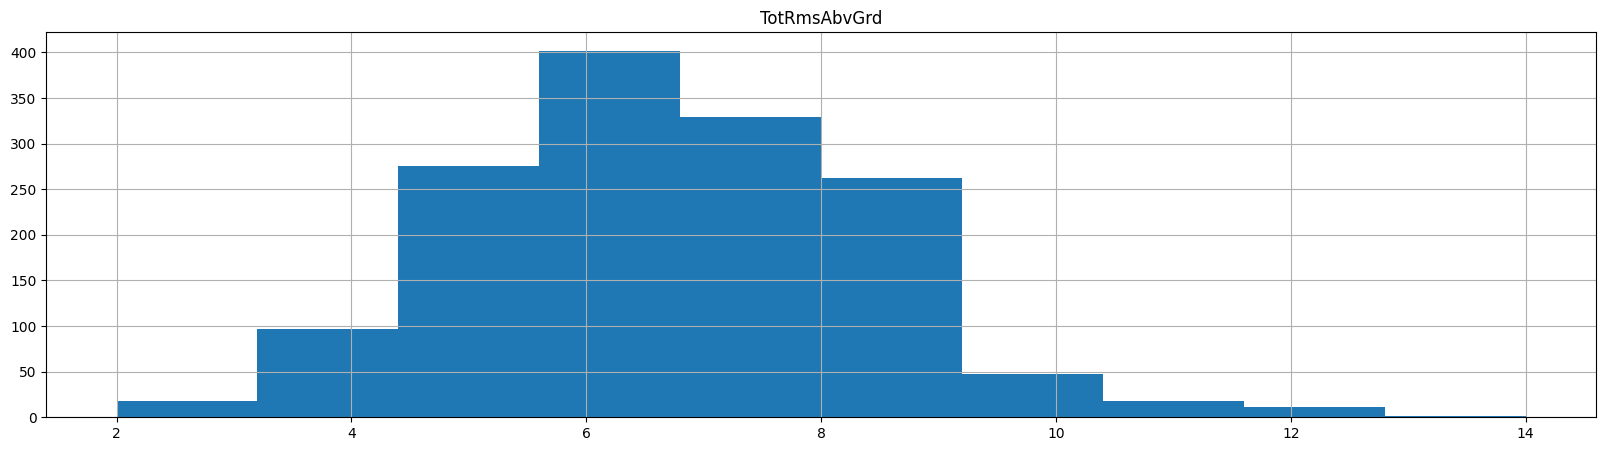

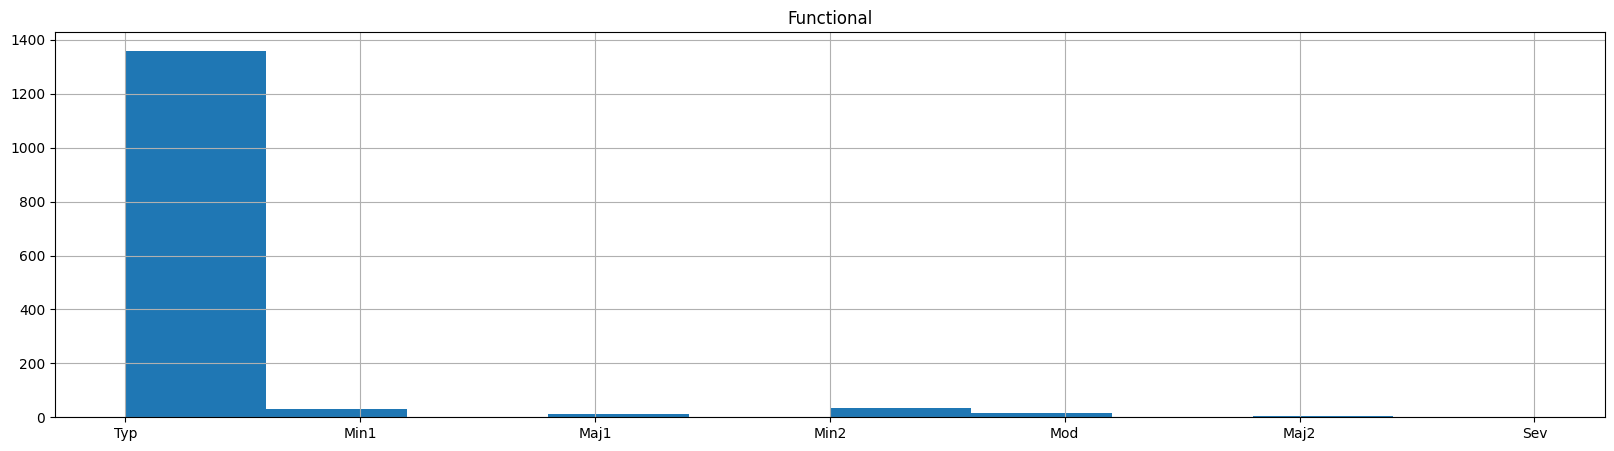

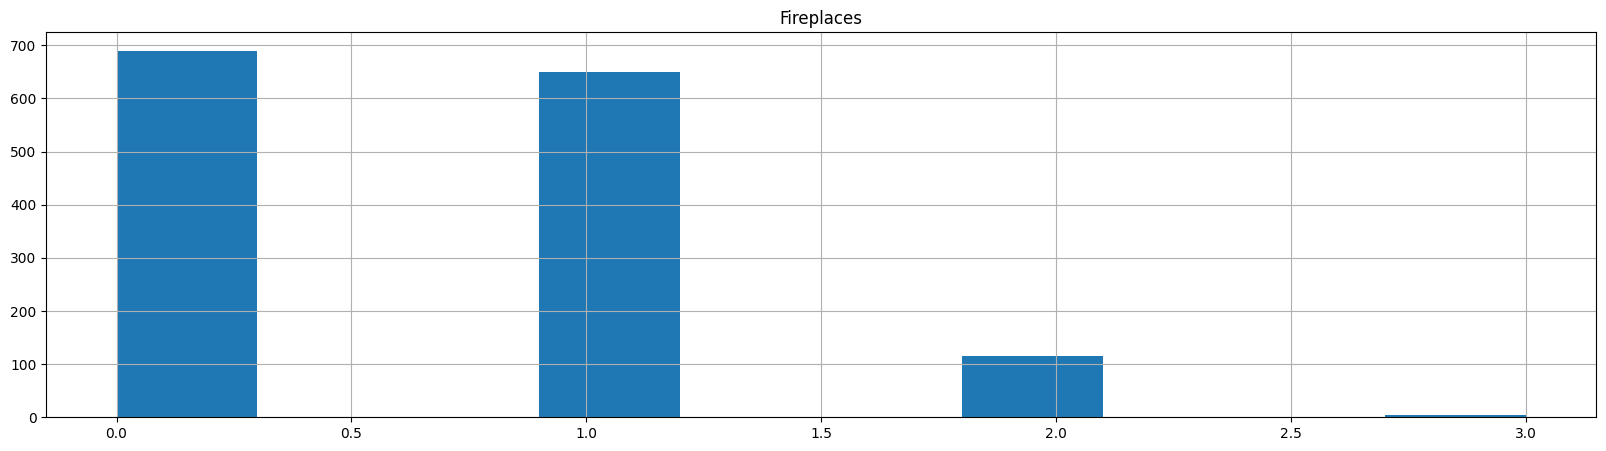

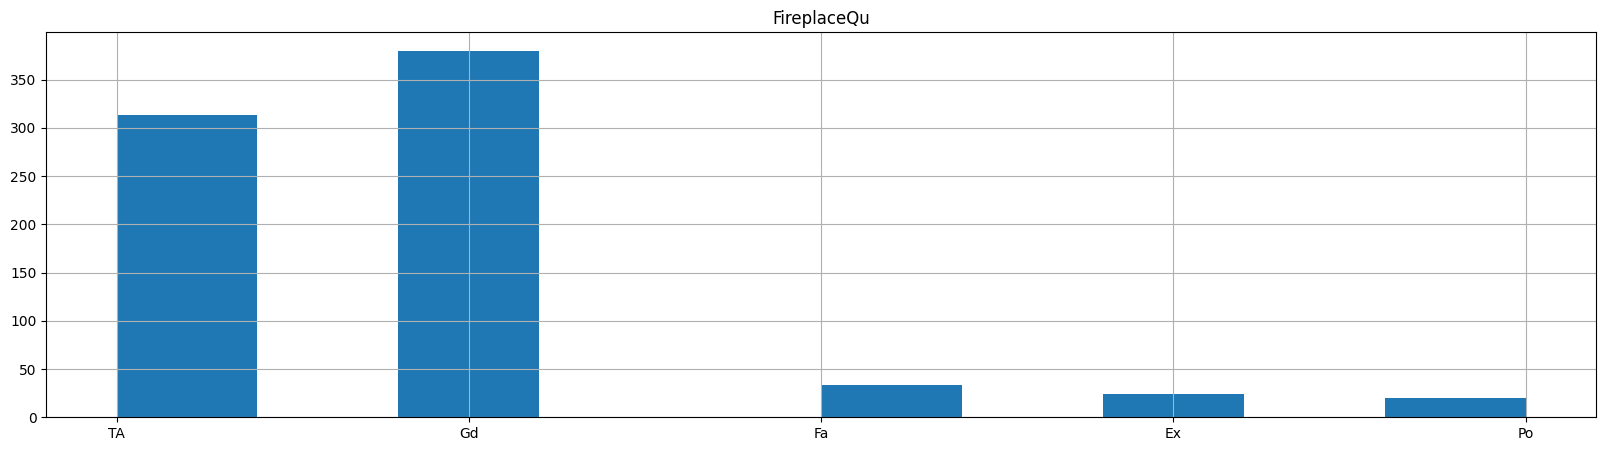

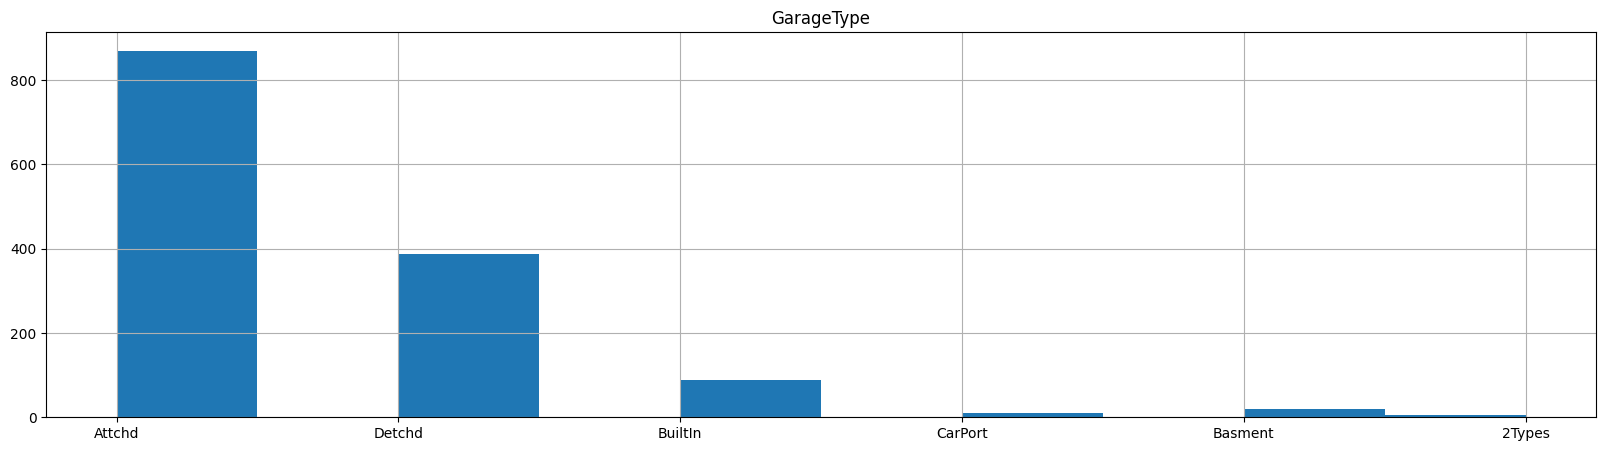

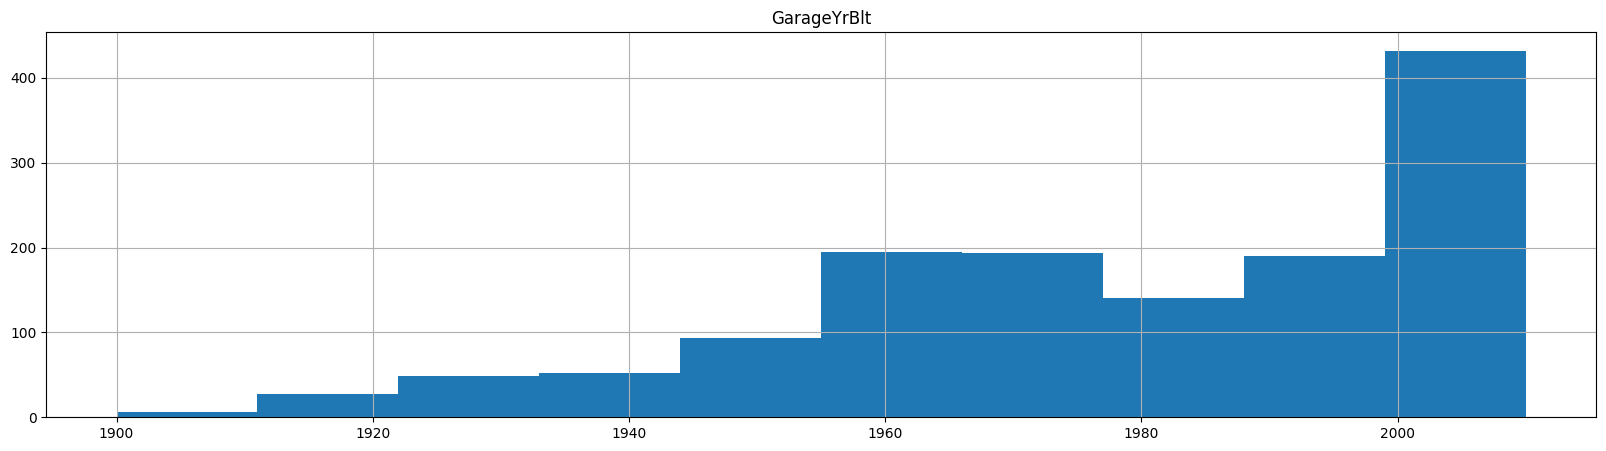

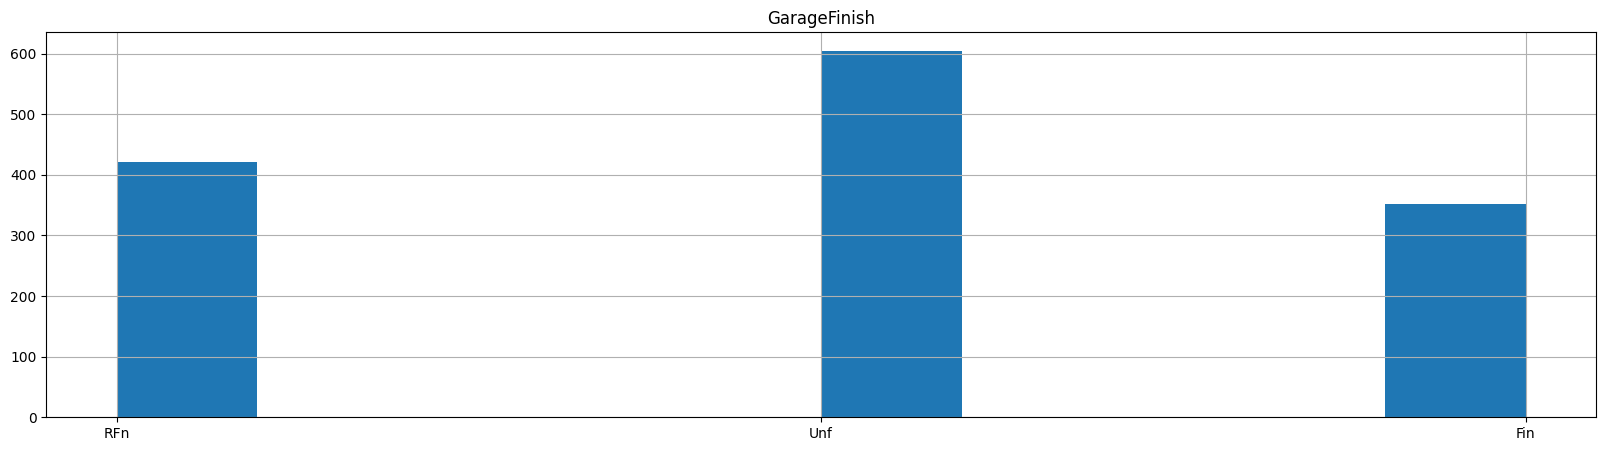

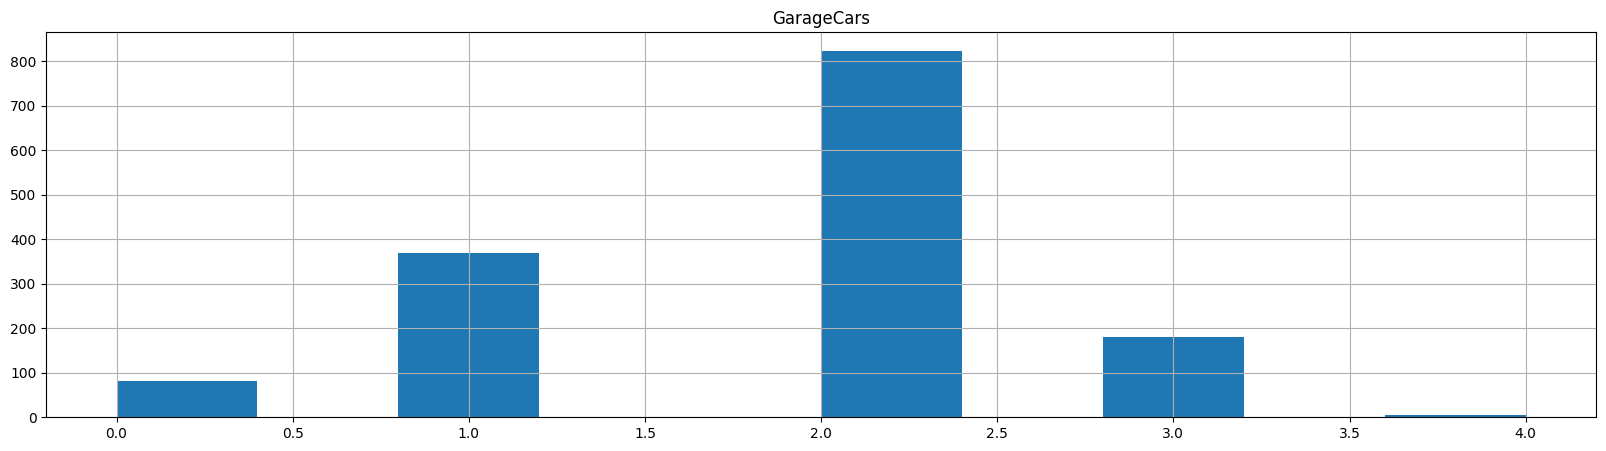

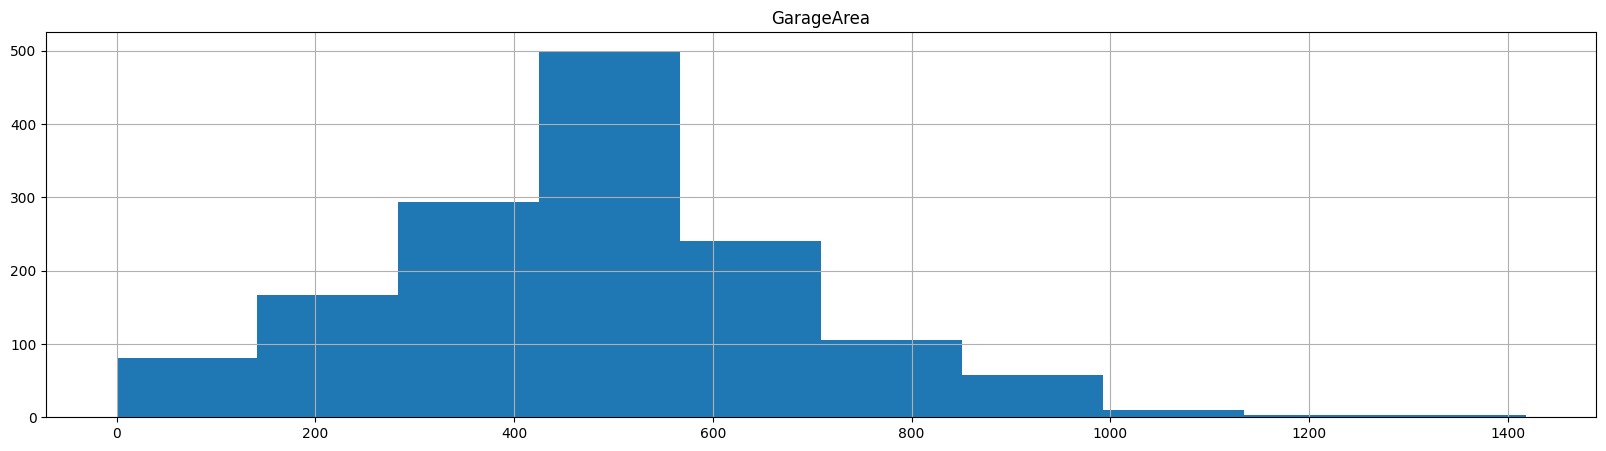

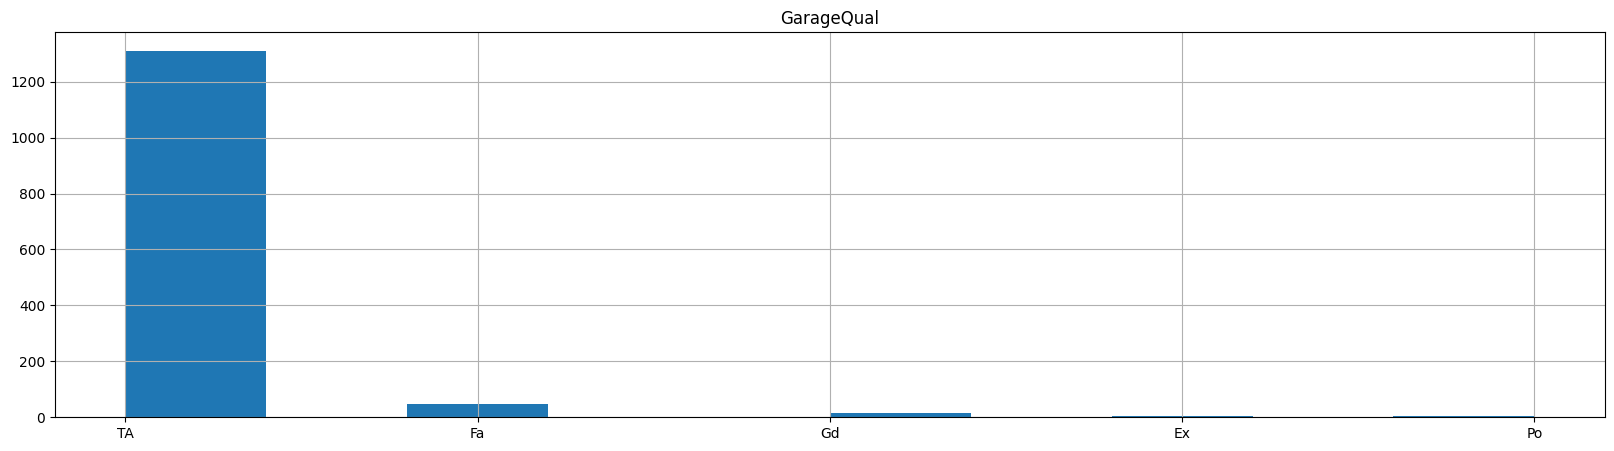

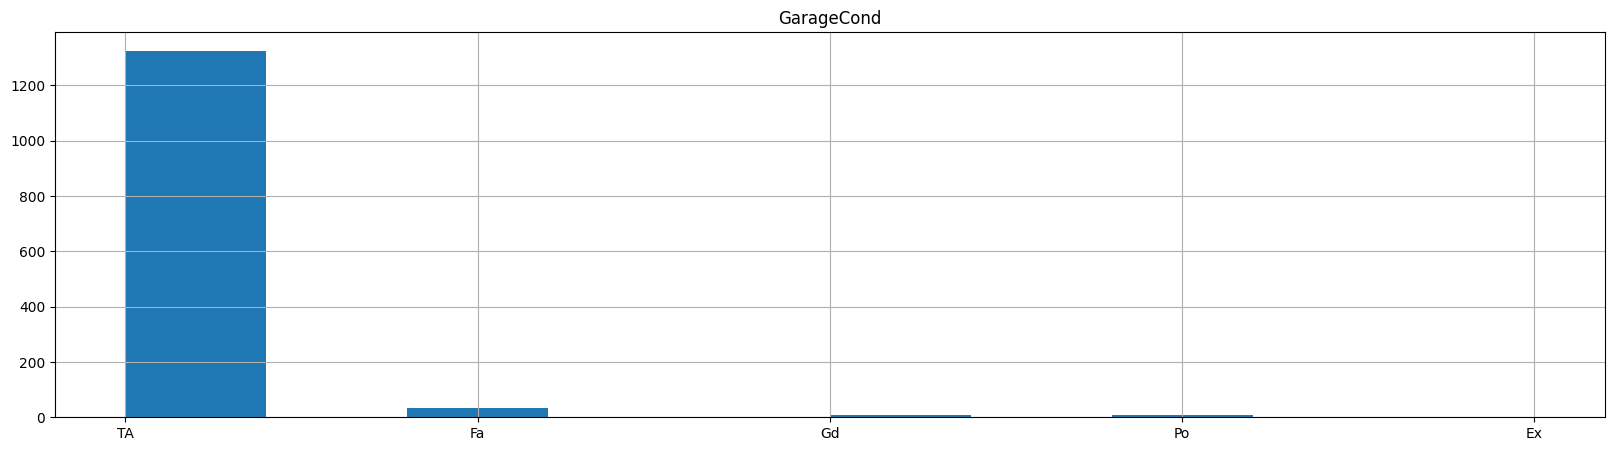

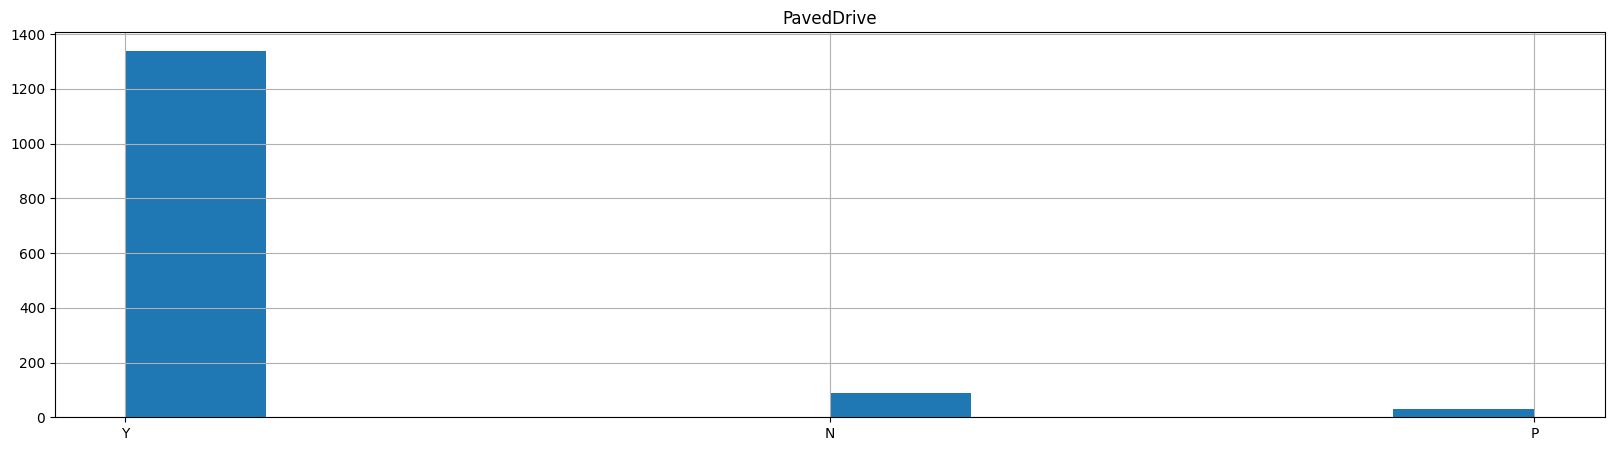

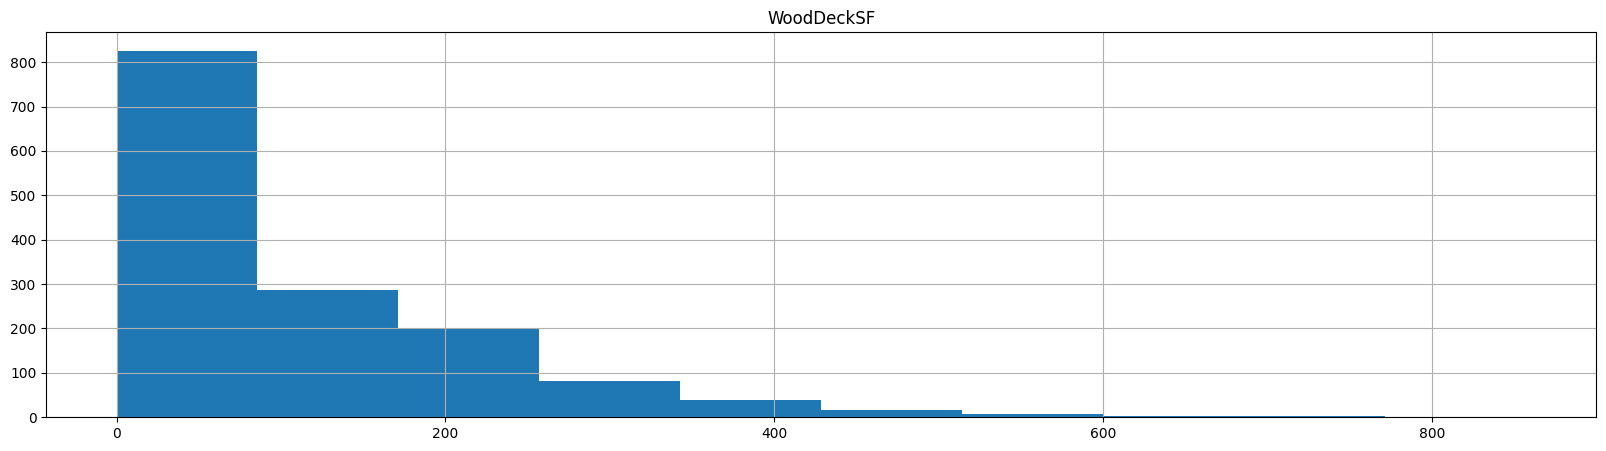

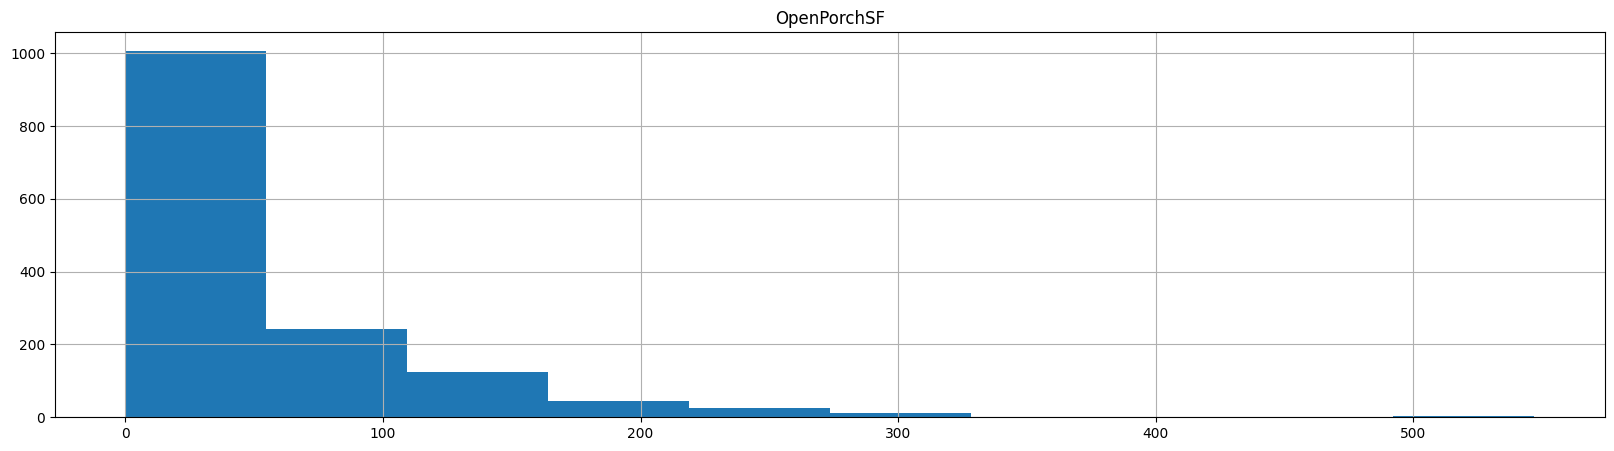

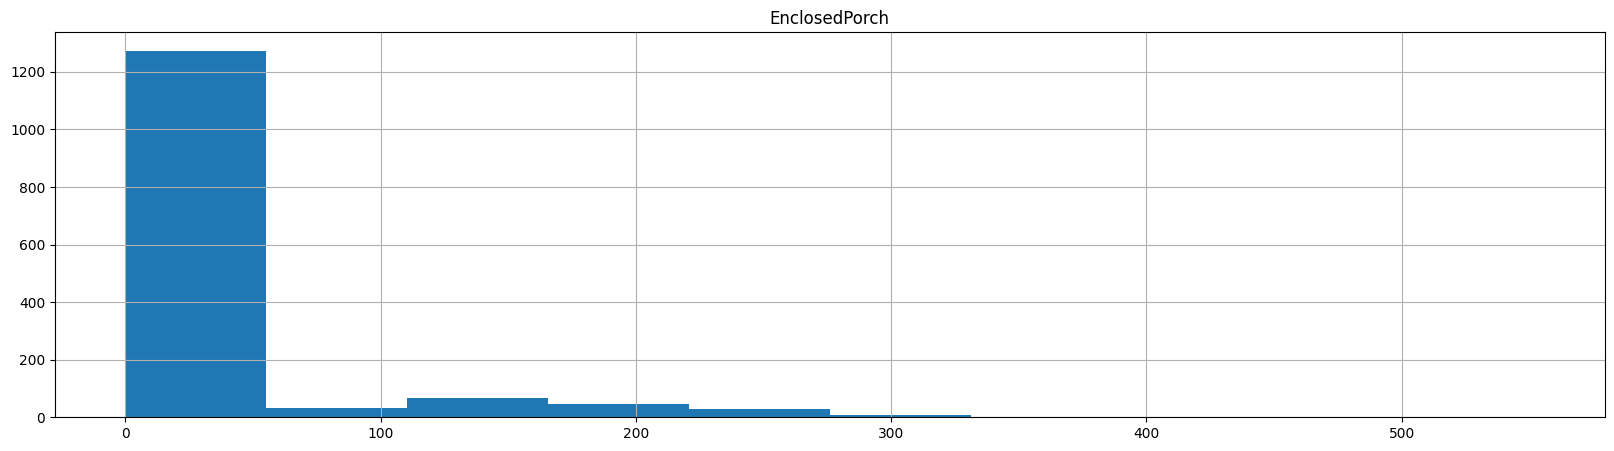

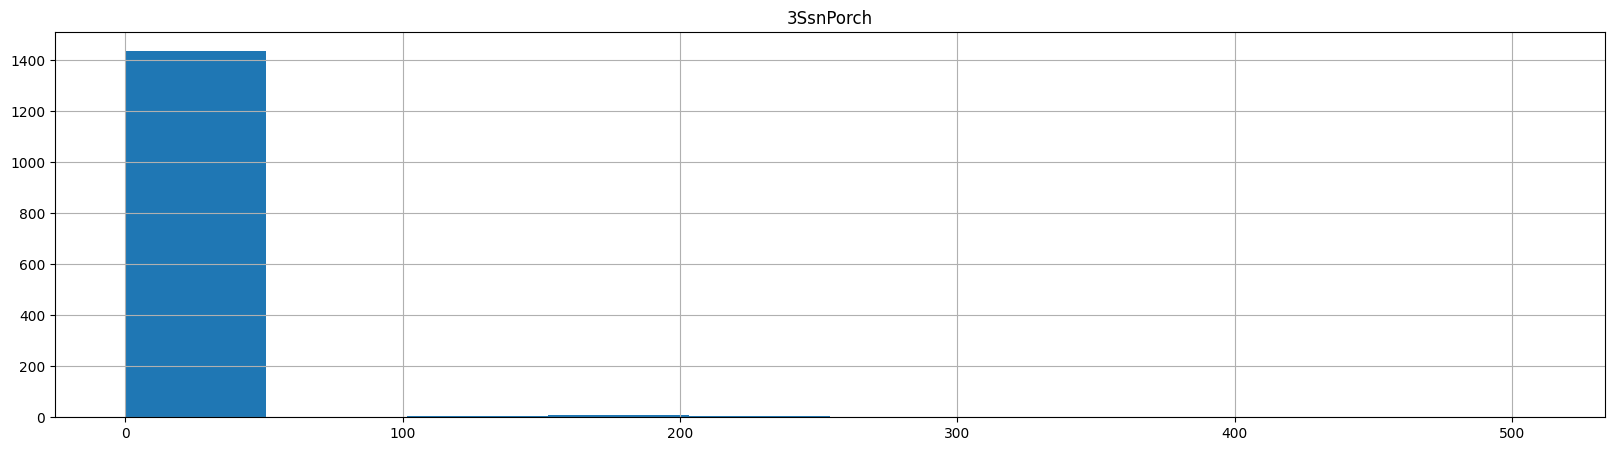

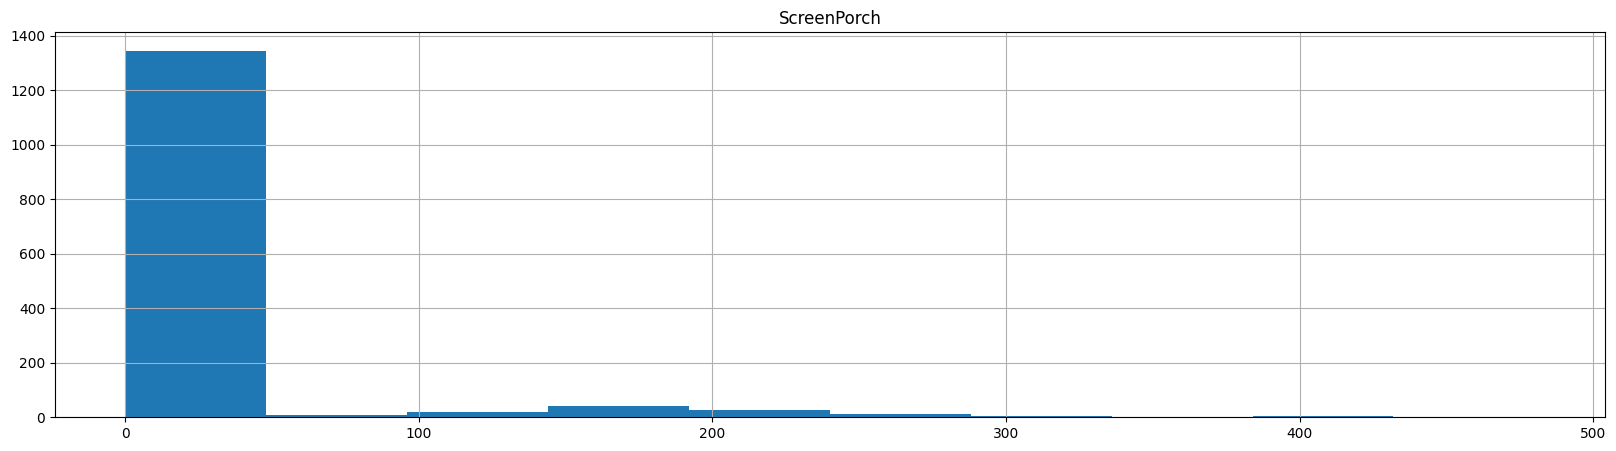

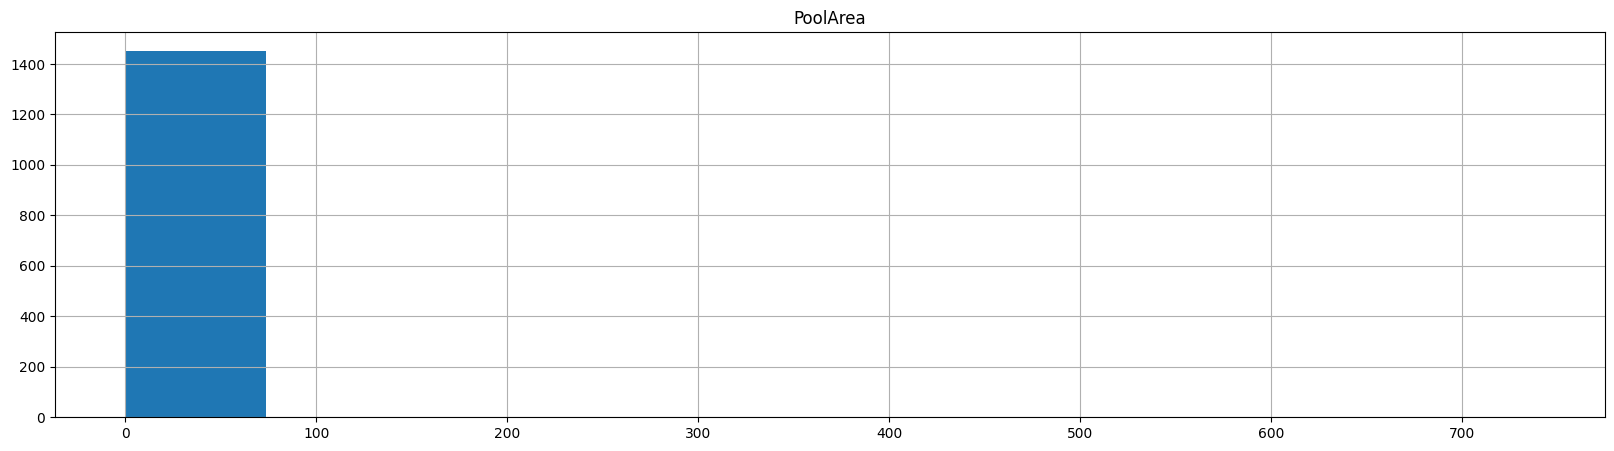

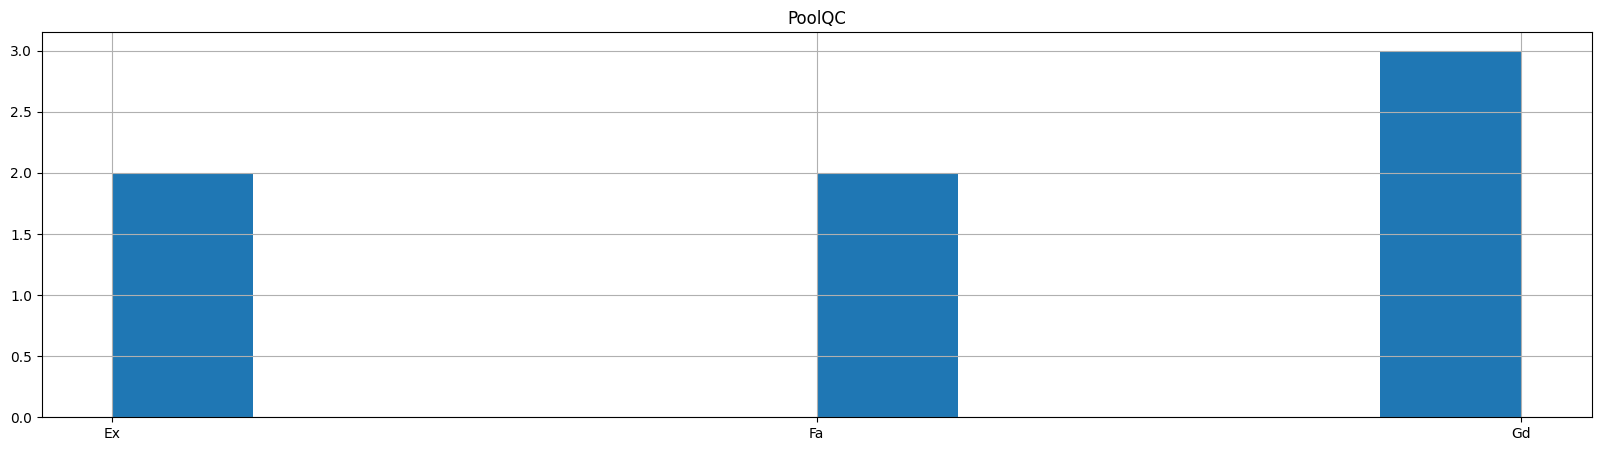

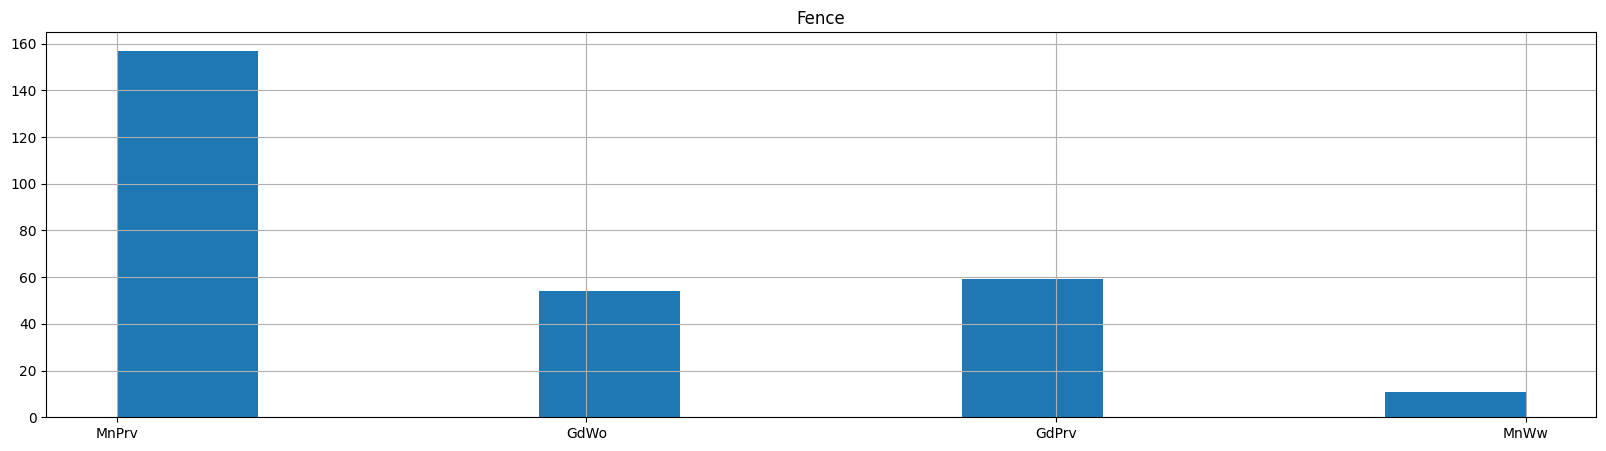

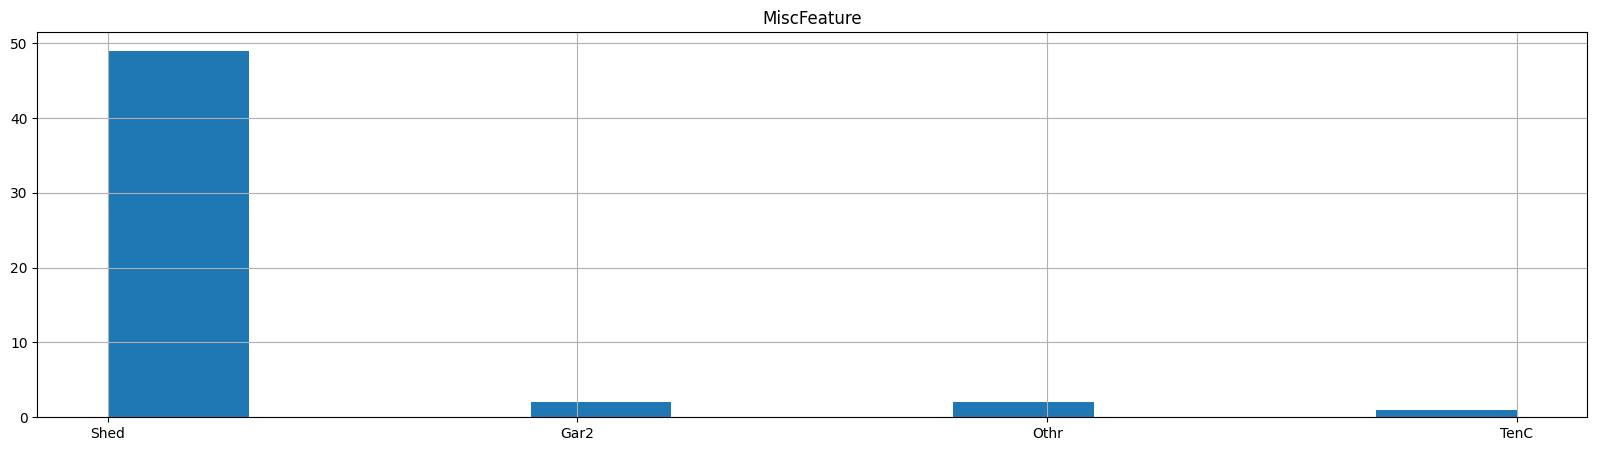

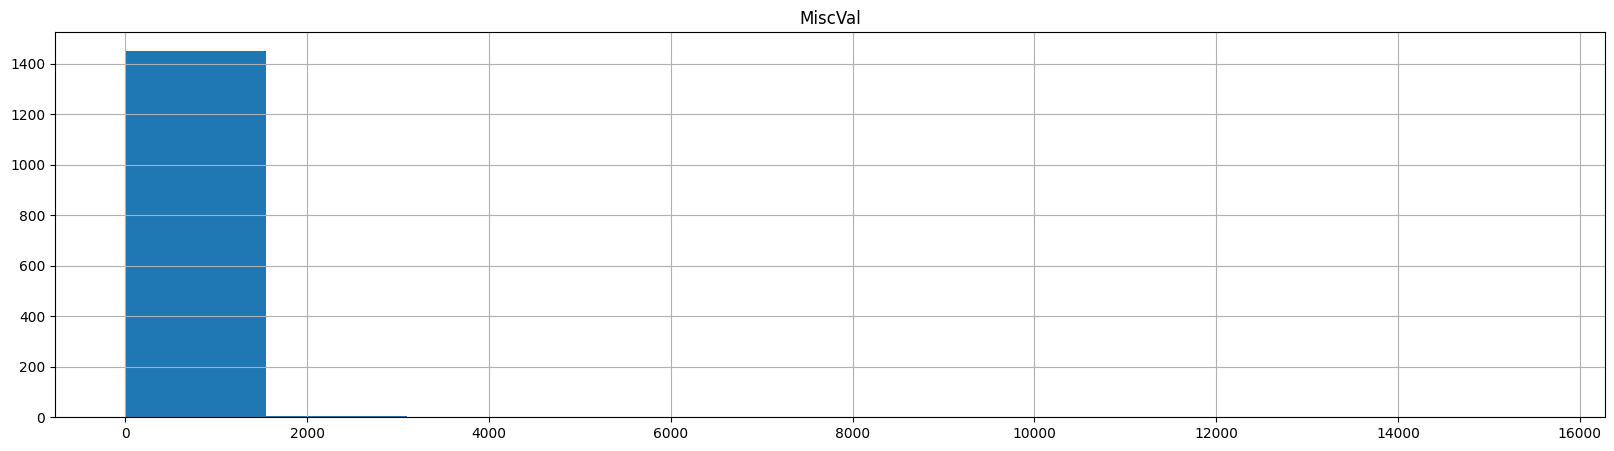

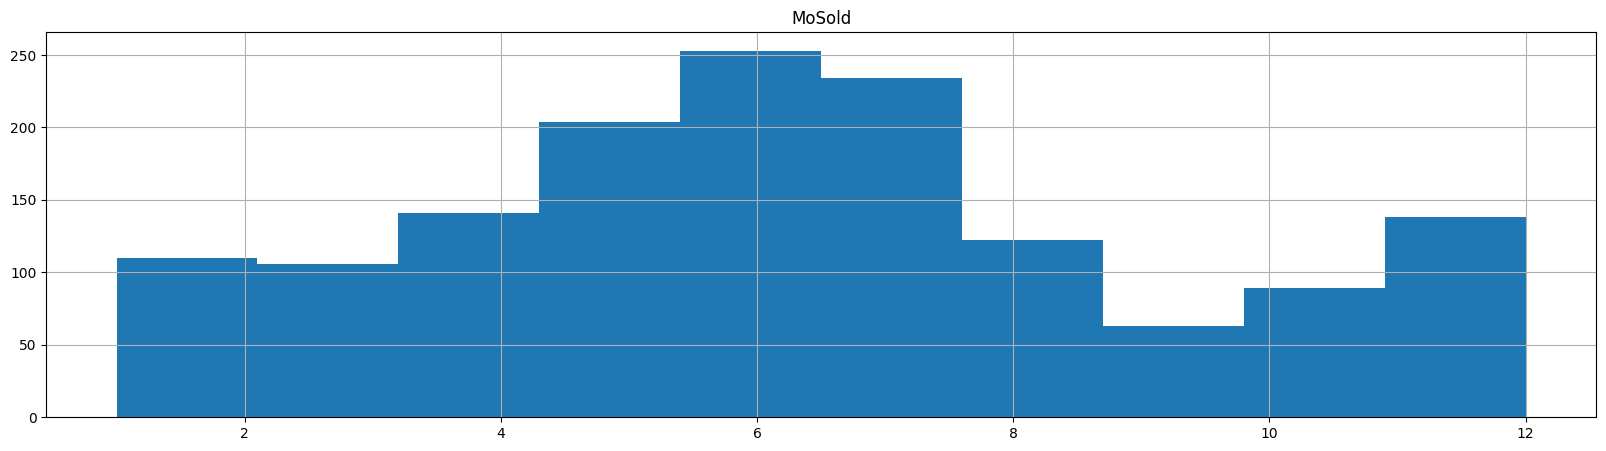

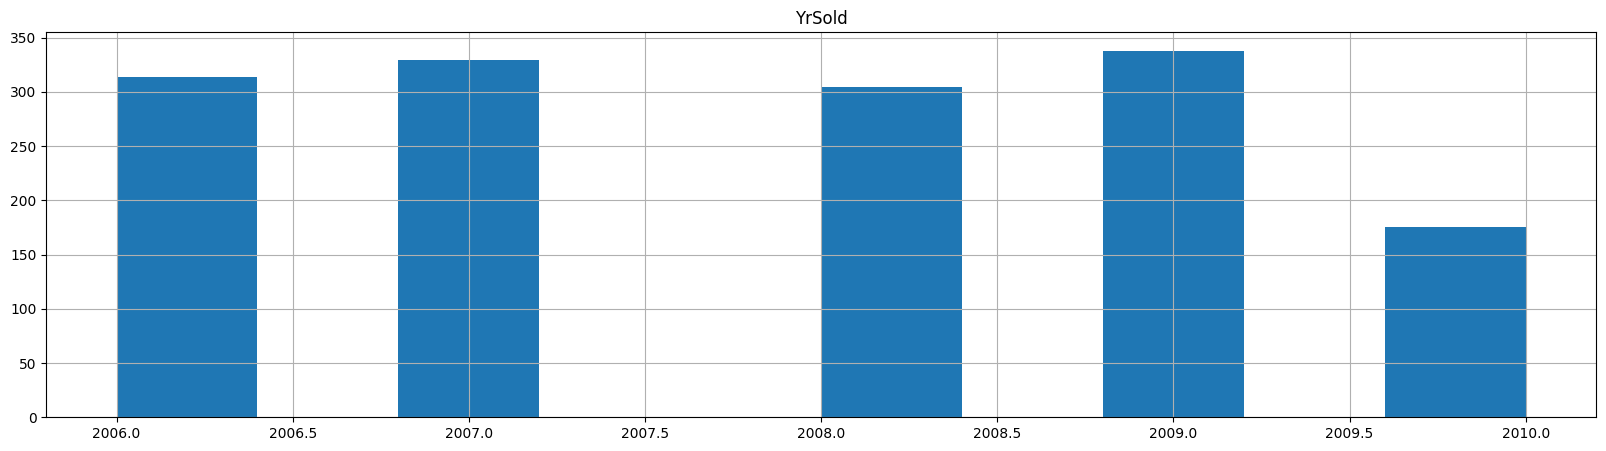

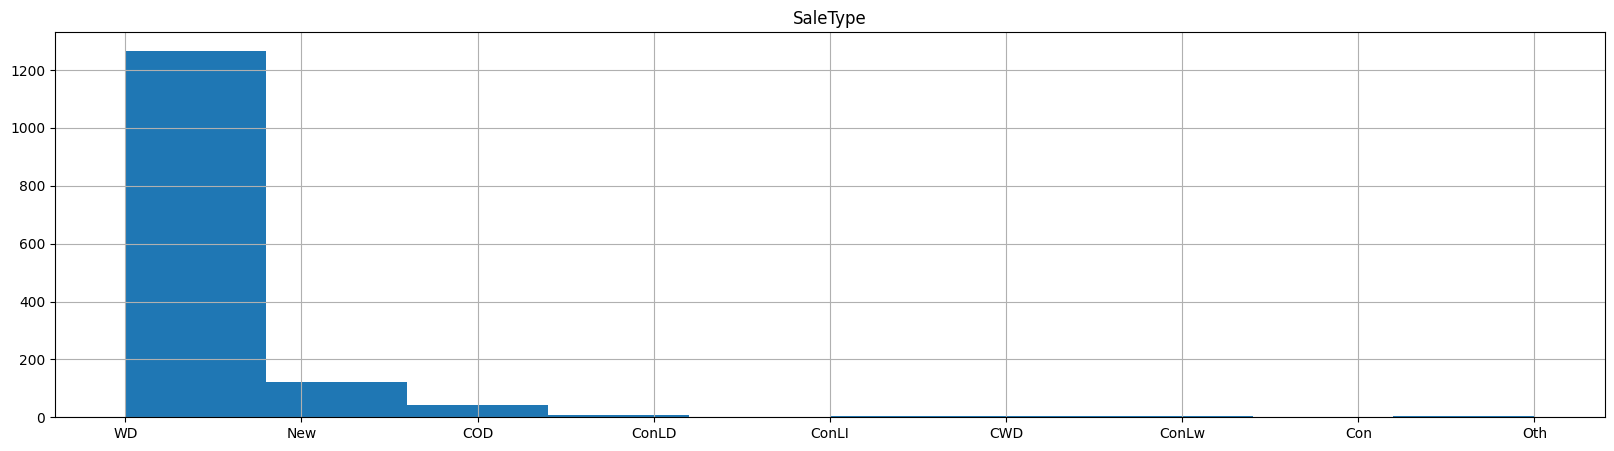

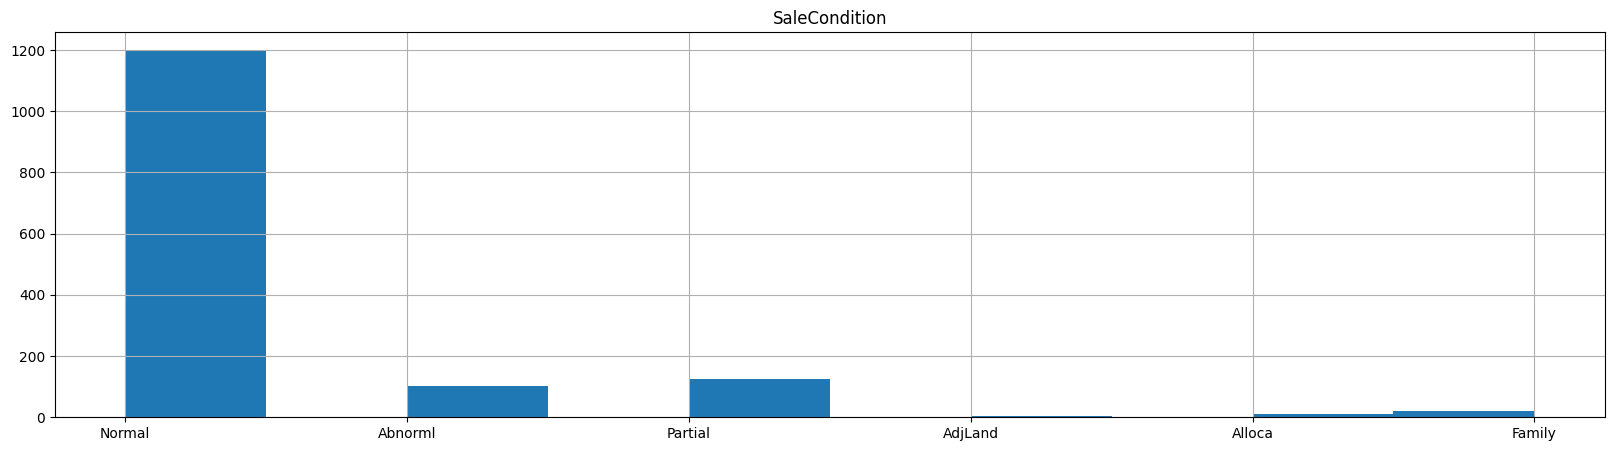

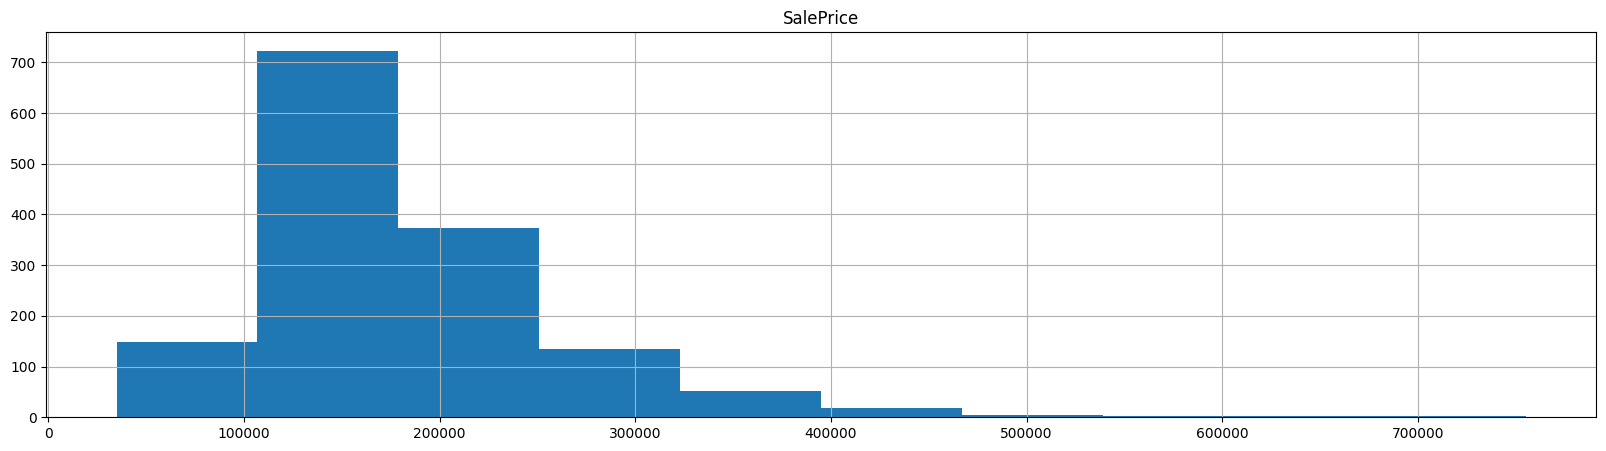

In [9]:
for col in df.columns:
    plt.subplots(figsize=(20,5))
    plt.title(col)
    df[col].hist()
    plt.show()

# 2. Обработка пустых значений

In [10]:
nan_cols = []
for col in df.columns:
    nan_count = df[col].isna().sum()
    if nan_count != 0:
        per = np.round((nan_count / df.shape[0]) * 100, 2)
        print(f'NaN value count for {col} = {nan_count} per = {per}')
        if per > 90:
            nan_cols.append(col)
print(f'NaN cols = {nan_cols}')

NaN value count for LotFrontage = 259 per = 17.74
NaN value count for Alley = 1369 per = 93.77
NaN value count for MasVnrType = 872 per = 59.73
NaN value count for MasVnrArea = 8 per = 0.55
NaN value count for BsmtQual = 37 per = 2.53
NaN value count for BsmtCond = 37 per = 2.53
NaN value count for BsmtExposure = 38 per = 2.6
NaN value count for BsmtFinType1 = 37 per = 2.53
NaN value count for BsmtFinType2 = 38 per = 2.6
NaN value count for Electrical = 1 per = 0.07
NaN value count for FireplaceQu = 690 per = 47.26
NaN value count for GarageType = 81 per = 5.55
NaN value count for GarageYrBlt = 81 per = 5.55
NaN value count for GarageFinish = 81 per = 5.55
NaN value count for GarageQual = 81 per = 5.55
NaN value count for GarageCond = 81 per = 5.55
NaN value count for PoolQC = 1453 per = 99.52
NaN value count for Fence = 1179 per = 80.75
NaN value count for MiscFeature = 1406 per = 96.3
NaN cols = ['Alley', 'PoolQC', 'MiscFeature']


In [11]:
df_Without_NaN_Cols = df.drop(nan_cols, axis=1)
df_Without_NaN_Cols.shape

(1460, 78)

In [12]:
rows_for_del = []
for col in df_Without_NaN_Cols.columns:
    nan_count = df_Without_NaN_Cols[col].isna().sum()
    if nan_count != 0:
        per = np.round((nan_count / df_Without_NaN_Cols.shape[0]) * 100, 2)
        print(f'NaN value count for {col} = {nan_count} per = {per}')
        if per < 5:
            rows_for_del.append(col)
print(rows_for_del)

NaN value count for LotFrontage = 259 per = 17.74
NaN value count for MasVnrType = 872 per = 59.73
NaN value count for MasVnrArea = 8 per = 0.55
NaN value count for BsmtQual = 37 per = 2.53
NaN value count for BsmtCond = 37 per = 2.53
NaN value count for BsmtExposure = 38 per = 2.6
NaN value count for BsmtFinType1 = 37 per = 2.53
NaN value count for BsmtFinType2 = 38 per = 2.6
NaN value count for Electrical = 1 per = 0.07
NaN value count for FireplaceQu = 690 per = 47.26
NaN value count for GarageType = 81 per = 5.55
NaN value count for GarageYrBlt = 81 per = 5.55
NaN value count for GarageFinish = 81 per = 5.55
NaN value count for GarageQual = 81 per = 5.55
NaN value count for GarageCond = 81 per = 5.55
NaN value count for Fence = 1179 per = 80.75
['MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical']


In [13]:
# Заполнение пропусков поля utm_campaign самым часто встречающимся значением 'LTuZkdKfxRGVceoWkVyg'
#df_clean.utm_campaign = df_clean.utm_campaign.fillna(df_clean.utm_campaign.value_counts().keys()[0])

In [14]:
df_filled = df_Without_NaN_Cols.copy()
df_filled.shape

(1460, 78)

In [15]:
for col in rows_for_del:
    df_filled = df_filled[df_filled[col].notna()]
df_filled.shape

(1412, 78)

In [16]:
for col in df_filled.columns:
    nan_count = df_filled[col].isna().sum()
    if nan_count != 0:
        per = np.round((nan_count / df_filled.shape[0]) * 100, 2)
        print(f'NaN value count for {col} = {nan_count} per = {per}')

NaN value count for LotFrontage = 251 per = 17.78
NaN value count for MasVnrType = 831 per = 58.85
NaN value count for FireplaceQu = 657 per = 46.53
NaN value count for GarageType = 74 per = 5.24
NaN value count for GarageYrBlt = 74 per = 5.24
NaN value count for GarageFinish = 74 per = 5.24
NaN value count for GarageQual = 74 per = 5.24
NaN value count for GarageCond = 74 per = 5.24
NaN value count for Fence = 1135 per = 80.38


In [17]:
# Linear feet of street connected to property (Погонные футы улицы, соединенной с участком)
df_filled.LotFrontage = df_filled.LotFrontage.fillna(df_filled.LotFrontage.median())

In [18]:
# Masonry veneer type (Тип каменной облицовки)
df_filled.MasVnrType.value_counts() 

MasVnrType
BrkFace    438
Stone      128
BrkCmn      15
Name: count, dtype: int64

In [19]:
df_filled.MasVnrType.unique()

array(['BrkFace', nan, 'Stone', 'BrkCmn'], dtype=object)

In [20]:
df_filled.MasVnrType = df_filled.MasVnrType.fillna('(not set)')

In [21]:
# Fireplace quality (Качество камина)
df_filled.FireplaceQu.value_counts()

FireplaceQu
Gd    373
TA    307
Fa     33
Ex     23
Po     19
Name: count, dtype: int64

In [22]:
df_filled.FireplaceQu = df_filled.FireplaceQu.fillna(df_filled.FireplaceQu.value_counts().keys()[0])

In [23]:
# Garage location (Расположение гаража)
df_filled.GarageType.value_counts()

GarageType
Attchd     852
Detchd     369
BuiltIn     85
Basment     19
CarPort      7
2Types       6
Name: count, dtype: int64

In [24]:
df_filled.GarageType = df_filled.GarageType.fillna('No_Garage')

In [25]:
# Year garage was built (Год постройки гаража)
df_filled.GarageYrBlt.value_counts()

GarageYrBlt
2005.0    65
2006.0    58
2004.0    53
2003.0    47
2007.0    45
1977.0    33
1998.0    31
1999.0    30
1976.0    29
2008.0    29
2000.0    27
1968.0    26
2002.0    22
1993.0    22
1965.0    21
1950.0    21
1966.0    21
2009.0    21
1958.0    21
1970.0    20
2001.0    20
1962.0    20
1996.0    20
1954.0    19
1997.0    19
1960.0    18
1964.0    18
1995.0    18
1978.0    18
1994.0    18
1974.0    18
1957.0    18
1963.0    16
1959.0    16
1990.0    16
1980.0    15
1969.0    15
1920.0    14
1972.0    14
1988.0    14
1973.0    14
1940.0    14
1992.0    13
1971.0    13
1967.0    13
1961.0    13
1956.0    13
1953.0    12
1979.0    11
1955.0    11
1948.0    11
1981.0    10
1941.0    10
1987.0    10
1925.0    10
1989.0    10
1985.0    10
1939.0     9
1991.0     8
1975.0     8
1984.0     8
1930.0     8
1983.0     7
1949.0     6
1951.0     6
1986.0     6
1926.0     6
1916.0     5
1922.0     5
1936.0     5
1931.0     4
1935.0     4
1928.0     4
1982.0     4
1946.0     3
1952.0     3


In [26]:
df_filled.GarageYrBlt = df_filled.GarageYrBlt.fillna(df_filled.GarageYrBlt.median())

In [27]:
# Interior finish of the garage (Внутренняя отделка гаража)
df_filled.GarageFinish.value_counts()

GarageFinish
Unf    580
RFn    413
Fin    345
Name: count, dtype: int64

In [28]:
df_filled.GarageFinish = df_filled.GarageFinish.fillna('No_Garage')

In [29]:
df_filled.GarageQual = df_filled.GarageQual.fillna('No_Garage')
df_filled.GarageCond = df_filled.GarageCond.fillna('No_Garage')

In [30]:
# Fence quality (Качество забора)
df_filled.Fence.value_counts()

Fence
MnPrv    154
GdPrv     58
GdWo      54
MnWw      11
Name: count, dtype: int64

In [31]:
df_filled.Fence = df_filled.Fence.fillna('No_Fence')

In [32]:
df_filled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1412 entries, 0 to 1459
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1412 non-null   int64  
 1   MSSubClass     1412 non-null   int64  
 2   MSZoning       1412 non-null   object 
 3   LotFrontage    1412 non-null   float64
 4   LotArea        1412 non-null   int64  
 5   Street         1412 non-null   object 
 6   LotShape       1412 non-null   object 
 7   LandContour    1412 non-null   object 
 8   Utilities      1412 non-null   object 
 9   LotConfig      1412 non-null   object 
 10  LandSlope      1412 non-null   object 
 11  Neighborhood   1412 non-null   object 
 12  Condition1     1412 non-null   object 
 13  Condition2     1412 non-null   object 
 14  BldgType       1412 non-null   object 
 15  HouseStyle     1412 non-null   object 
 16  OverallQual    1412 non-null   int64  
 17  OverallCond    1412 non-null   int64  
 18  YearBuilt    

# 3. Преобразование типов данных

In [33]:
df_types = df_filled.copy()

In [34]:
float_cols = df_types.select_dtypes('float64').columns
float_cols

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

In [117]:
for float_col in float_cols:
    df_types[float_col] = df_types[float_col].astype('int64')

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [36]:
obj_cols = df_types.select_dtypes('object').columns

for obj_col in obj_cols:
    if len(df_types[obj_col].unique()) <= 2:
        print(f'{obj_col} = {df_types[obj_col].unique()}')

Street = ['Pave' 'Grvl']
Utilities = ['AllPub' 'NoSeWa']
CentralAir = ['Y' 'N']


In [37]:
df_types.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Gd,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,No_Fence,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,(not set),0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,No_Fence,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,No_Fence,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,(not set),0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,No_Fence,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,No_Fence,0,12,2008,WD,Normal,250000


In [38]:
df_types.CentralAir  = df_types.CentralAir .apply(lambda x: 1 if x == 'Y' else 0)

In [39]:
df_types.CentralAir = df_types.CentralAir.astype('int64')

In [40]:
for col in df_types.columns:
    if len(df_types[col].unique()) <= 1:
        print(col)

# 4. Проверка корреляции признаков с целевой переменной

In [41]:
num_cols = df_types.select_dtypes('int64').columns.drop(['Id', 'SalePrice'])

for col in num_cols:
    corr_value = df_types[col].corr(df_types['SalePrice'])
    if corr_value > 0.5 or corr_value < -0.5:
        print(f'Correlation between {col} and target column = {corr_value}')

Correlation between OverallQual and target column = 0.7867645427228941
Correlation between YearBuilt and target column = 0.5187358492222691
Correlation between YearRemodAdd and target column = 0.5002659488611415
Correlation between TotalBsmtSF and target column = 0.6110839004748736
Correlation between 1stFlrSF and target column = 0.6147530051654264
Correlation between GrLivArea and target column = 0.7110797668447889
Correlation between FullBath and target column = 0.5756037364112182
Correlation between TotRmsAbvGrd and target column = 0.5455395195947095
Correlation between GarageCars and target column = 0.6418250974661108
Correlation between GarageArea and target column = 0.6210951042044007


# 5. Генерация дополнительных признаков

In [42]:
df_features = df_types.copy()

In [43]:
df_features.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,1,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Gd,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,No_Fence,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,(not set),0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,1,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,No_Fence,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,1,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,No_Fence,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,(not set),0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,1,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,No_Fence,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,1,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,No_Fence,0,12,2008,WD,Normal,250000


In [44]:
df_features['YearBuilt'].describe()

count    1412.000000
mean     1971.428470
std        30.371732
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.250000
max      2010.000000
Name: YearBuilt, dtype: float64

In [45]:
df_features['YearRemodAdd'].info()

<class 'pandas.core.series.Series'>
Index: 1412 entries, 0 to 1459
Series name: YearRemodAdd
Non-Null Count  Dtype
--------------  -----
1412 non-null   int64
dtypes: int64(1)
memory usage: 22.1 KB


In [46]:
df_features['YearRemodAdd'].info()

<class 'pandas.core.series.Series'>
Index: 1412 entries, 0 to 1459
Series name: YearRemodAdd
Non-Null Count  Dtype
--------------  -----
1412 non-null   int64
dtypes: int64(1)
memory usage: 22.1 KB


In [47]:
df_features['YearRemodAdd_YearBuilt_Diff'] = df_features['YearRemodAdd'] - df_features['YearBuilt']

In [48]:
num_cols = df_types.select_dtypes('int64').columns
num_cols

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'], dtype='object')

In [49]:
df_features['GarageArea_per_from_LotArea'] = np.round((df_features['GarageArea'] / df_features['LotArea']) * 100, 2)
df_features['PoolArea_per_from_LotArea'] = np.round((df_features['PoolArea'] / df_features['LotArea']) * 100, 2)
df_features['1stFlrSF_per_from_LotArea'] = np.round((df_features['1stFlrSF'] / df_features['LotArea']) * 100, 2)
df_features['2ndFlrSF_per_from_LotArea'] = np.round((df_features['2ndFlrSF'] / df_features['LotArea']) * 100, 2)
df_features['GrLivArea_per_from_LotArea'] = np.round((df_features['GrLivArea'] / df_features['LotArea']) * 100, 2)
df_features['WoodDeckSF_per_from_LotArea'] = np.round((df_features['WoodDeckSF'] / df_features['LotArea']) * 100, 2)
df_features['OpenPorchSF_per_from_LotArea'] = np.round((df_features['OpenPorchSF'] / df_features['LotArea']) * 100, 2)
df_features['EnclosedPorch_per_from_LotArea'] = np.round((df_features['EnclosedPorch'] / df_features['LotArea']) * 100, 2)
df_features['3SsnPorch_per_from_LotArea'] = np.round((df_features['3SsnPorch'] / df_features['LotArea']) * 100, 2)
df_features['ScreenPorch_per_from_LotArea'] = np.round((df_features['ScreenPorch'] / df_features['LotArea']) * 100, 2)

In [50]:
df_features.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,YearRemodAdd_YearBuilt_Diff,GarageArea_per_from_LotArea,PoolArea_per_from_LotArea,1stFlrSF_per_from_LotArea,2ndFlrSF_per_from_LotArea,GrLivArea_per_from_LotArea,WoodDeckSF_per_from_LotArea,OpenPorchSF_per_from_LotArea,EnclosedPorch_per_from_LotArea,3SsnPorch_per_from_LotArea,ScreenPorch_per_from_LotArea
0,1,60,RL,65,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,1,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Gd,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,No_Fence,0,2,2008,WD,Normal,208500,0,6.49,0.0,10.13,10.11,20.24,0.00,0.72,0.00,0.0,0.0
1,2,20,RL,80,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,(not set),0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,1,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,No_Fence,0,5,2007,WD,Normal,181500,0,4.79,0.0,13.15,0.00,13.15,3.10,0.00,0.00,0.0,0.0
2,3,60,RL,68,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,1,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,No_Fence,0,9,2008,WD,Normal,223500,1,5.40,0.0,8.18,7.70,15.88,0.00,0.37,0.00,0.0,0.0
3,4,70,RL,60,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,(not set),0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,1,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,No_Fence,0,2,2006,WD,Abnorml,140000,55,6.72,0.0,10.06,7.92,17.98,0.00,0.37,2.85,0.0,0.0
4,5,60,RL,84,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,1,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,No_Fence,0,12,2008,WD,Normal,250000,0,5.86,0.0,8.03,7.38,15.41,1.35,0.59,0.00,0.0,0.0


# 6. Удаление избыточных признаков

In [51]:
for col in df_features.columns:
    if ((df_features[col].value_counts().iloc[0] / df_features.shape[0]) * 100) > 95:
        print(f'{df_features[col].value_counts()}\n')

Street
Pave    1406
Grvl       6
Name: count, dtype: int64

Utilities
AllPub    1411
NoSeWa       1
Name: count, dtype: int64

Condition2
Norm      1397
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: count, dtype: int64

RoofMatl
CompShg    1387
Tar&Grv      10
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: count, dtype: int64

Heating
GasA    1386
GasW      17
Grav       7
OthW       2
Name: count, dtype: int64

LowQualFinSF
0      1387
80        3
360       2
156       1
205       1
479       1
397       1
514       1
120       1
481       1
232       1
515       1
473       1
420       1
390       1
371       1
392       1
144       1
572       1
528       1
234       1
513       1
384       1
Name: count, dtype: int64

KitchenAbvGr
1    1361
2      48
3       2
0       1
Name: count, dtype: int64

3SsnPorch
0      1389
168       3
144       2
216       2
290       

# 7. Кодирование числовых признаков

In [52]:
df_scaled = df_features.copy()

In [53]:
num_cols = df_scaled.select_dtypes('number').columns.drop(['Id', 'SalePrice'])
num_cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'YearRemodAdd_YearBuilt_Diff', 'GarageArea_per_from_LotArea', 'PoolArea_per_from_LotArea', '1stFlrSF_per_from_LotArea', '2ndFlrSF_per_from_LotArea', 'GrLivArea_per_from_LotArea', 'WoodDeckSF_per_from_LotArea', 'OpenPorchSF_per_from_LotArea', 'EnclosedPorch_per_from_LotArea', '3SsnPorch_per_from_LotArea', 'ScreenPorch_per_from_LotArea'], dtype='object')

In [54]:
# std_scaler = StandardScaler()

In [55]:
# std_scaler.fit(df_scaled[num_cols])
# std_scaled = std_scaler.transform(df_scaled[num_cols])

In [56]:
mmScaler = MinMaxScaler()

In [57]:
mmScaler.fit(df_scaled[num_cols])

MinMaxScaler()

In [58]:
mm_scaled = mmScaler.transform(df_scaled[num_cols])

In [59]:
df_scaled[num_cols] = mm_scaled
df_scaled.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,YearRemodAdd_YearBuilt_Diff,GarageArea_per_from_LotArea,PoolArea_per_from_LotArea,1stFlrSF_per_from_LotArea,2ndFlrSF_per_from_LotArea,GrLivArea_per_from_LotArea,WoodDeckSF_per_from_LotArea,OpenPorchSF_per_from_LotArea,EnclosedPorch_per_from_LotArea,3SsnPorch_per_from_LotArea,ScreenPorch_per_from_LotArea
0,1,0.235294,RL,0.150685,0.033420,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,0.666667,0.500,0.949275,0.883333,Gable,CompShg,VinylSd,VinylSd,BrkFace,0.12250,Gd,TA,PConc,Gd,TA,No,GLQ,0.125089,Unf,0.0,0.064212,0.125062,GasA,Ex,1.0,SBrkr,0.098260,0.413559,0.0,0.244427,0.333333,0.0,0.666667,0.5,0.375,0.333333,Gd,0.454545,Typ,0.000000,Gd,Attchd,0.936364,RFn,0.50,0.386460,TA,TA,Y,0.000000,0.111517,0.000000,0.0,0.0,0.0,No_Fence,0.0,0.090909,0.50,WD,Normal,208500,0.000000,0.182611,0.0,0.180289,0.196769,0.206112,0.000000,0.092308,0.000000,0.0,0.0
1,2,0.000000,RL,0.202055,0.038795,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,0.555556,0.875,0.753623,0.433333,Gable,CompShg,MetalSd,MetalSd,(not set),0.00000,TA,TA,CBlock,Gd,TA,Gd,ALQ,0.173281,Unf,0.0,0.121575,0.192673,GasA,Ex,1.0,SBrkr,0.193700,0.000000,0.0,0.158340,0.000000,0.5,0.666667,0.0,0.375,0.333333,TA,0.272727,Typ,0.333333,TA,Attchd,0.690909,RFn,0.50,0.324401,TA,TA,Y,0.347725,0.000000,0.000000,0.0,0.0,0.0,No_Fence,0.0,0.363636,0.25,WD,Normal,181500,0.000000,0.134778,0.0,0.239343,0.000000,0.130356,0.168753,0.000000,0.000000,0.0,0.0
2,3,0.235294,RL,0.160959,0.046507,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,0.666667,0.500,0.934783,0.866667,Gable,CompShg,VinylSd,VinylSd,BrkFace,0.10125,Gd,TA,PConc,Gd,TA,Mn,GLQ,0.086109,Unf,0.0,0.185788,0.135720,GasA,Ex,1.0,SBrkr,0.113305,0.419370,0.0,0.259032,0.333333,0.0,0.666667,0.5,0.375,0.333333,Gd,0.272727,Typ,0.333333,TA,Attchd,0.918182,RFn,0.50,0.428773,TA,TA,Y,0.000000,0.076782,0.000000,0.0,0.0,0.0,No_Fence,0.0,0.727273,0.50,WD,Normal,223500,0.008130,0.151941,0.0,0.142159,0.149864,0.159526,0.000000,0.047436,0.000000,0.0,0.0
3,4,0.294118,RL,0.133562,0.038561,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,0.666667,0.500,0.311594,0.333333,Gable,CompShg,Wd Sdng,Wd Shng,(not set),0.00000,TA,TA,BrkTil,TA,Gd,No,ALQ,0.038271,Unf,0.0,0.231164,0.108410,GasA,Gd,1.0,SBrkr,0.122943,0.366102,0.0,0.245772,0.333333,0.0,0.333333,0.0,0.375,0.333333,Gd,0.363636,Typ,0.333333,Gd,Detchd,0.890909,Unf,0.75,0.452750,TA,TA,Y,0.000000,0.063985,0.492754,0.0,0.0,0.0,No_Fence,0.0,0.090909,0.00,WD,Abnorml,140000,0.447154,0.189083,0.0,0.178921,0.154146,0.181964,0.000000,0.047436,0.425373,0.0,0.0
4,5,0.235294,RL,0.215753,0.060576,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,0.777778,0.500,0.927536,0.833333,Gable,CompShg,VinylSd,VinylSd,BrkFace,0.21875,Gd,TA,PConc,Gd,TA,Av,GLQ,0.116052,Unf,0.0,0.209760,0.173189,GasA,Ex,1.0,SBrkr,0.166197,0.509927,0.0,0.338201,0.333333,0.0,0.666667,0.5,0.500,0.333333,Gd,0.545455,Typ,0.333333,TA,Attchd,0.909091,RFn,0.75,0.589563,TA,TA,Y,0.224037,0.153565,0.000000,0.0,0.0,0.0,No_Fence,0.0,1.000000,0.50,WD,Normal,250000,0.000000,0.164885,0.0,0.139226,0.143636,0.154504,0.073489,0.075641,0.000000,0.0,0.0


In [60]:
preprocessing_dict = {}
preprocessing_dict['scaler'] = mmScaler

# 8. Кодирование категориальных признаков

In [61]:
df_category = df_scaled.copy()

In [62]:
obj_cols = df_category.select_dtypes('object').columns
obj_cols

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'SaleType', 'SaleCondition'], dtype='object')

In [63]:
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [64]:
ohe.fit(df_category[obj_cols])
ft = ohe.transform(df_category[obj_cols])
df_ft = pd.DataFrame(ft, columns=ohe.get_feature_names_out())
df_category.reset_index(drop=True, inplace=True)
df_ft.reset_index(drop=True, inplace=True)
df_ft = df_ft.astype('int64')
df_category = pd.concat([df_category, df_ft], axis=1)
df_category.drop(obj_cols, inplace = True, axis = 1)

In [65]:
preprocessing_dict['encoder'] = ohe

In [66]:
df_category.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,YearRemodAdd_YearBuilt_Diff,GarageArea_per_from_LotArea,PoolArea_per_from_LotArea,1stFlrSF_per_from_LotArea,2ndFlrSF_per_from_LotArea,GrLivArea_per_from_LotArea,WoodDeckSF_per_from_LotArea,OpenPorchSF_per_from_LotArea,EnclosedPorch_per_from_LotArea,3SsnPorch_per_from_LotArea,ScreenPorch_per_from_LotArea,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_(not set),MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,G

# 9. Сохранение финального датасета

In [67]:
df_final = df_category.copy()

In [225]:
with open('./pickles/prep_tools.pickle', 'wb') as file:
    pickle.dump(preprocessing_dict, file)

In [226]:
df_final.to_csv('./data/df_final.csv', index = False)

# 10. Разбиение выборки на тренировочную и тестовую

In [5]:
df_final = pd.read_csv('./data/df_final.csv')

In [6]:
df_train, df_test = train_test_split(df_final, test_size=0.2, random_state=RANDOM_SEED)

X_train = df_train.drop(['Id', 'SalePrice'], axis = 1)
y_train = df_train['SalePrice']

X_test = df_test.drop(['Id', 'SalePrice'], axis = 1)
y_test = df_test['SalePrice']
print(f'X_train: {X_train.shape}')
print(f'y_train: {y_train.shape}')

X_train: (1129, 290)
y_train: (1129,)


In [7]:
df_train[df_train['SalePrice'] < 0]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,YearRemodAdd_YearBuilt_Diff,GarageArea_per_from_LotArea,PoolArea_per_from_LotArea,1stFlrSF_per_from_LotArea,2ndFlrSF_per_from_LotArea,GrLivArea_per_from_LotArea,WoodDeckSF_per_from_LotArea,OpenPorchSF_per_from_LotArea,EnclosedPorch_per_from_LotArea,3SsnPorch_per_from_LotArea,ScreenPorch_per_from_LotArea,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_(not set),MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,G

# 11. Обьявление и анализ нативных моделей

In [72]:
linearRegression_model = LinearRegression (n_jobs = -1)
ridge_model = Ridge(random_state = RANDOM_SEED)
lasso_model = Lasso(random_state = RANDOM_SEED)
rfRegressor_model = RandomForestRegressor(n_jobs = -1, random_state = RANDOM_SEED)
knnRegressor_model = KNeighborsRegressor(n_jobs = -1)
mlpRegressor_model = MLPRegressor(random_state = RANDOM_SEED)
decisionTreeRegressor_model = DecisionTreeRegressor(random_state = RANDOM_SEED)
svr_model = SVR()

models = [linearRegression_model, ridge_model, lasso_model, rfRegressor_model, knnRegressor_model, mlpRegressor_model, decisionTreeRegressor_model, svr_model]

In [73]:
y_test.head()

741    270000
865    122900
339    437154
192    104000
203    145000
Name: SalePrice, dtype: int64

In [8]:
def rmsle(real, predicted):
    sum=0.0
    for x in range(len(predicted)):
        if predicted[x]<0 or real[x]<0: #check for negative values
            continue
        p = np.log(predicted[x]+1)
        r = np.log(real[x]+1)
        sum = sum + (p - r)**2
    return (sum/len(predicted))**0.5

In [75]:
rmsle_score = make_scorer(rmsle, greater_is_better=False)
for model in models:
    rf_score = cross_val_score(model, X_train, y_train, cv=3, scoring=rmsle_score).mean()
    print(rf_score)
    rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
    print(f'Модель: {type(model).__name__}\nRMSE: {rmse_test}\nRMSLE: {rf_score}\n')

nan


NameError: name 'y_pred_test' is not defined

In [9]:
def rmsle(y, y0):
    assert len(y) == len(y0)
    return np.sqrt(np.mean(np.power(np.log1p(y)-np.log1p(y0), 2)))

In [10]:
default_res = pd.DataFrame(columns=['Estimator', 'RMSE', 'RMSLE'])
default_res

,Estimator,RMSE,RMSLE


In [78]:
for model in models:
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
    #rmsle_test = mean_squared_log_error(y_test, y_pred_test)
    rmsle_test = rmsle(y_test, y_pred_test)
   
    print(f'Модель: {type(model).__name__}\nRMSE: {rmse_test}\nRMSLE: {rmsle_test}\n')
    new_row = {'Estimator':type(model).__name__, 'RMSE':rmse_test, 'RMSLE':rmsle_test}
    default_res.loc[len(default_res)] = new_row
default_res

Модель: LinearRegression
RMSE: 244866578264255.12
RMSLE: 1.7531734635469238

Модель: Ridge
RMSE: 43123.57519770141
RMSLE: 0.2503961946649648

Модель: Lasso
RMSE: 46862.241110217554
RMSLE: 0.29363374694895955

Модель: RandomForestRegressor
RMSE: 35380.874424062196
RMSLE: 0.16463202834554536

Модель: KNeighborsRegressor
RMSE: 43760.40823715916
RMSLE: 0.196179641815672

Модель: MLPRegressor
RMSE: 189656.08771763594
RMSLE: 2.8410539333908496

Модель: DecisionTreeRegressor
RMSE: 54999.08093292497
RMSLE: 0.2531928042024025

Модель: SVR
RMSE: 84270.04579429771
RMSLE: 0.4047538729765696



,Estimator,RMSE,RMSLE
0,LinearRegression,2.448666e+14,1.753173
1,Ridge,4.312358e+04,0.250396
2,Lasso,4.686224e+04,0.293634
3,RandomForestRegressor,3.538087e+04,0.164632
4,KNeighborsRegressor,4.376041e+04,0.196180
5,MLPRegressor,1.896561e+05,2.841054
6,DecisionTreeRegressor,5.499908e+04,0.253193
7,SVR,8.427005e+04,0.404754


In [79]:
default_res[default_res.RMSLE == default_res.RMSLE.min()]

,Estimator,RMSE,RMSLE
3,RandomForestRegressor,35380.874424,0.164632


In [80]:
rfr_params = {
    'n_estimators': np.arange(100, 1000, 100),
    'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
    'max_depth': np.arange(2, 100, 1),
    'min_samples_split': np.arange(2, 100, 1),
    'min_samples_leaf': np.arange(1, 100, 1),
    'max_features': ['sqrt', 'log2', None], #np.arange(1, X_train.shape[1], 1)],
    'bootstrap': [True, False],
    #'ccp_alpha': np.arange(0.0, 1, 0.1),
    'max_samples': np.arange(0.01, 1, 0.01),
        }

gs_rfr = GridSearchCV(RandomForestRegressor(n_jobs = -1, random_state = RANDOM_SEED), rfr_params, cv = 3, n_jobs = -1, scoring='neg_root_mean_squared_error',  error_score=0.0)

In [ ]:
gs_rfr.fit(X_train, y_train)

In [ ]:
print(f'params: {gs_mpl.best_params_}, score: {gs_mpl.best_score_}')

In [11]:
from hyperopt import fmin, tpe, hp, SparkTrials, STATUS_OK, Trials
import itertools
import mlflow
import hyperopt

In [91]:
search_space = {
        'n_estimators': hp.quniform('n_estimators', 100, 1000, 100),
        'max_depth': hp.quniform('max_depth', 2, 100, 1),
        'min_samples_split': hp.quniform('min_samples_split', 2, 100, 1),
        'min_samples_leaf': hp.quniform('min_samples_leaf', 1, 100, 1),
        'max_samples': hp.quniform('max_samples', 0.01, 1, 0.01),
        'ccp_alpha': hp.quniform('ccp_alpha', 0.01, 1, 0.01),
        'criterion': hp.choice('criterion', ['squared_error', 'absolute_error', 'friedman_mse', 'poisson']),
        #'max_features': hp.choice('max_features', ['sqrt', 'log2', None]),
        'max_features': hp.quniform('max_features', 1, X_train.shape[1], 1),
        'bootstrap': hp.choice('bootstrap', [True, False])
    }

In [92]:
def objective(space):
    params = {
        'n_estimators': int(space['n_estimators']),
        'max_depth' : int(space['max_depth']),
        'min_samples_split' : int(space['min_samples_split']),
        'min_samples_leaf' : int(space['min_samples_leaf']),
        'max_samples' : float(space['max_samples']),
        'ccp_alpha' : float(space['ccp_alpha']),
        'criterion': space['criterion'],
        'max_features': space['max_features'],
        'bootstrap': space['bootstrap'],
        # 'activation': space['activation'],
        # 'solver': space['solver'],
        # 'learning_rate': space['learning_rate'],
        }
    
    clf = RandomForestRegressor(n_jobs = -1, random_state = RANDOM_SEED)
   
    accuracy = cross_val_score(clf, X_train, y_train, scoring='neg_root_mean_squared_error', n_jobs= -1).mean()
    #print('SCORE:', accuracy)
    # Because fmin() tries to minimize the objective, this function must return the negative accuracy. 
    return {'loss': -accuracy, 'status': STATUS_OK}

In [93]:
trials = Trials()

In [94]:
with mlflow.start_run():
    best_hyperparams = fmin(fn = objective,
                       space=search_space,
                       algo = tpe.suggest,
                       max_evals = 100,
                       trials = trials,
                       show_progressbar=True
                       )

100%|██████████| 100/100 [04:12<00:00,  2.52s/trial, best loss: 29204.57027572666]


In [90]:
#'max_features': hp.choice('max_features', ['sqrt', 'log2', None]),
print(hyperopt.space_eval(search_space, best_hyperparams))

{'bootstrap': False, 'ccp_alpha': 0.88, 'criterion': 'poisson', 'max_depth': 43.0, 'max_features': 'sqrt', 'max_samples': 0.9400000000000001, 'min_samples_leaf': 44.0, 'min_samples_split': 38.0, 'n_estimators': 500.0}


In [110]:
rfRegressor_model = RandomForestRegressor(bootstrap = False, ccp_alpha = 0.88, criterion = 'poisson', max_depth = 43, max_features = 'sqrt', max_samples = None, min_samples_leaf = 44, min_samples_split = 38, n_estimators = 500, n_jobs = -1, random_state = RANDOM_SEED)

In [111]:
rfRegressor_model.fit(X_train, y_train)
y_pred_test = rfRegressor_model.predict(X_test)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
rmsle_test = rmsle(y_test, y_pred_test)
   
print(f'Модель: {type(rfRegressor_model).__name__}\nRMSE: {rmse_test}\nRMSLE: {rmsle_test}\n')

Модель: RandomForestRegressor
RMSE: 44536.08270936054
RMSLE: 0.20950148326451243



In [95]:
# 'max_features': hp.quniform('max_features', 1, X_train.shape[1], 1),
print(hyperopt.space_eval(search_space, best_hyperparams))

{'bootstrap': True, 'ccp_alpha': 0.9500000000000001, 'criterion': 'absolute_error', 'max_depth': 16.0, 'max_features': 152.0, 'max_samples': 0.84, 'min_samples_leaf': 36.0, 'min_samples_split': 70.0, 'n_estimators': 900.0}


In [112]:
rfRegressor_model = RandomForestRegressor(bootstrap = True, ccp_alpha = 0.9500000000000001, criterion = 'absolute_error', max_depth = 16, max_features = 152, max_samples = 0.84, min_samples_leaf = 36, min_samples_split = 70, n_estimators = 900, n_jobs = -1, random_state = RANDOM_SEED)

In [113]:
rfRegressor_model.fit(X_train, y_train)
y_pred_test = rfRegressor_model.predict(X_test)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
rmsle_test = rmsle(y_test, y_pred_test)
   
print(f'Модель: {type(rfRegressor_model).__name__}\nRMSE: {rmse_test}\nRMSLE: {rmsle_test}\n')

Модель: RandomForestRegressor
RMSE: 42852.958112862136
RMSLE: 0.1954071897712432



In [114]:
rfRegressor_model = RandomForestRegressor(n_jobs = -1, random_state = RANDOM_SEED)

In [115]:
rfRegressor_model.fit(X_train, y_train)
y_pred_test = rfRegressor_model.predict(X_test)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
rmsle_test = rmsle(y_test, y_pred_test)
   
print(f'Модель: {type(rfRegressor_model).__name__}\nRMSE: {rmse_test}\nRMSLE: {rmsle_test}\n')

Модель: RandomForestRegressor
RMSE: 35380.874424062196
RMSLE: 0.16463202834554536



# Подготовка тестового Датасета

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
import joblib

In [47]:
preprocessing_dict = joblib.load('./pickles/prep_tools.pickle')
preprocessing_dict

{'scaler': MinMaxScaler(),
 'encoder': OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)}

In [48]:
mmScaler = preprocessing_dict['scaler']
ohe = preprocessing_dict['encoder']

In [13]:
def nanCols_deleting(X, y=None):
    X.drop(['Alley', 'PoolQC', 'MiscFeature'], axis = 1, inplace = True)
    for col in X.columns:
        nan_count = X[col].isna().sum()
        if nan_count != 0:
            per = np.round((nan_count / X.shape[0]) * 100, 2)
            if per < 5:
                rows_for_del.append(col)
    for col in rows_for_del:
        X = X[X[col].notna()]
        rows_for_del.append(col)
        
    return X 

In [14]:
def nanFilling(X, y=None):
    X.LotFrontage = X.LotFrontage.fillna(X.LotFrontage.median())
    X.MasVnrType = X.MasVnrType.fillna('(not set)')
    X.FireplaceQu = X.FireplaceQu.fillna(X.FireplaceQu.value_counts().keys()[0])
    X.GarageType = X.GarageType.fillna('No_Garage')
    X.GarageYrBlt = X.GarageYrBlt.fillna(X.GarageYrBlt.median())
    X.GarageFinish = X.GarageFinish.fillna('No_Garage')
    X.GarageQual = X.GarageQual.fillna('No_Garage')
    X.GarageCond = X.GarageCond.fillna('No_Garage')
    X.Fence = X.Fence.fillna('No_Fence')
    
    return X 

In [15]:
def typeConversion(X, y=None):
    float_cols = X.select_dtypes('float64').columns
    for float_col in float_cols:
        X[float_col] = X[float_col].astype('int64')
    X.CentralAir  = X.CentralAir .apply(lambda x: 1 if x == 'Y' else 0)
    X.CentralAir = X.CentralAir.astype('int64')

    return X

In [16]:
def featuresGeneration(X, y=None):
    X['YearRemodAdd_YearBuilt_Diff'] = X['YearRemodAdd'] - X['YearBuilt']
    X['GarageArea_per_from_LotArea'] = np.round((X['GarageArea'] / X['LotArea']) * 100, 2)
    X['PoolArea_per_from_LotArea'] = np.round((X['PoolArea'] / X['LotArea']) * 100, 2)
    X['1stFlrSF_per_from_LotArea'] = np.round((X['1stFlrSF'] / X['LotArea']) * 100, 2)
    X['2ndFlrSF_per_from_LotArea'] = np.round((X['2ndFlrSF'] / X['LotArea']) * 100, 2)
    X['GrLivArea_per_from_LotArea'] = np.round((X['GrLivArea'] / X['LotArea']) * 100, 2)
    X['WoodDeckSF_per_from_LotArea'] = np.round((X['WoodDeckSF'] / X['LotArea']) * 100, 2)
    X['OpenPorchSF_per_from_LotArea'] = np.round((X['OpenPorchSF'] / X['LotArea']) * 100, 2)
    X['EnclosedPorch_per_from_LotArea'] = np.round((X['EnclosedPorch'] / X['LotArea']) * 100, 2)
    X['3SsnPorch_per_from_LotArea'] = np.round((X['3SsnPorch'] / X['LotArea']) * 100, 2)
    X['ScreenPorch_per_from_LotArea'] = np.round((X['ScreenPorch'] / X['LotArea']) * 100, 2)

    return X

In [44]:
def scaling(X, y=None):
    num_cols = X.select_dtypes('number').columns.drop(['Id'])
    mm_scaled = mmScaler.transform(X[num_cols])
    X[num_cols] = mm_scaled
    
    return X

In [18]:
def encoding(X, y=None):
    obj_cols = X.select_dtypes('object').columns
    ft = ohe.transform(X[obj_cols])
    df_ft = pd.DataFrame(ft, columns=ohe.get_feature_names_out())
    X.reset_index(drop=True, inplace=True)
    df_ft.reset_index(drop=True, inplace=True)
    df_ft = df_ft.astype('int64')
    X = pd.concat([X, df_ft], axis=1)
    X.drop(obj_cols, inplace = True, axis = 1)

    return X

In [19]:
preprocessor = Pipeline(
    steps=
    [
        ('columnDropper', FunctionTransformer(func=nanCols_deleting)),
        ('nanFilling', FunctionTransformer(func=nanFilling)),
        ('typeConversion', FunctionTransformer(func=typeConversion)),
        ('featuresGeneration', FunctionTransformer(func=featuresGeneration)),
        ('scaling', FunctionTransformer(func=scaling)),
        ('encoding', FunctionTransformer(func=encoding)),
        
    ]
)


In [21]:
df_final.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,YearRemodAdd_YearBuilt_Diff,GarageArea_per_from_LotArea,PoolArea_per_from_LotArea,1stFlrSF_per_from_LotArea,2ndFlrSF_per_from_LotArea,GrLivArea_per_from_LotArea,WoodDeckSF_per_from_LotArea,OpenPorchSF_per_from_LotArea,EnclosedPorch_per_from_LotArea,3SsnPorch_per_from_LotArea,ScreenPorch_per_from_LotArea,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_(not set),MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,G

In [20]:
df_test = pd.read_csv('./data/test.csv')
df_test.shape

(1459, 80)

In [132]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [22]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [77]:
df_test_new = df_test.copy()
df_test_new.drop(['Alley', 'PoolQC', 'MiscFeature'], axis = 1, inplace = True)

In [78]:
#df_test_new.drop(['Alley', 'PoolQC', 'MiscFeature'], axis = 1, inplace = True)
df_test_new = nanFilling(df_test_new)
df_test_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [79]:
nan_cols = ['SaleType', 'BsmtCond', 'MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'GarageCars', 'GarageArea']      

In [80]:
# for col in nan_cols:
#     print(f'{df_test_new[col].value_counts()}')

In [81]:
df_test_new.SaleType = df_test_new.SaleType.fillna(df_test_new.SaleType.value_counts().keys()[0])
df_test_new.BsmtCond = df_test_new.BsmtCond.fillna(df_test_new.BsmtCond.value_counts().keys()[0])
df_test_new.MSZoning = df_test_new.MSZoning.fillna(df_test_new.MSZoning.value_counts().keys()[0])
df_test_new.Utilities = df_test_new.Utilities.fillna(df_test_new.Utilities.value_counts().keys()[0])
df_test_new.Exterior1stv = df_test_new.Exterior1st.fillna(df_test_new.Exterior1st.value_counts().keys()[0])
df_test_new.Exterior2nd = df_test_new.Exterior2nd.fillna(df_test_new.Exterior2nd.value_counts().keys()[0])
df_test_new.MasVnrArea = df_test_new.MasVnrArea.fillna(df_test_new.MasVnrArea.value_counts().keys()[0])
df_test_new.BsmtQual = df_test_new.BsmtQual.fillna(df_test_new.BsmtQual.value_counts().keys()[0])
df_test_new.BsmtCond = df_test_new.BsmtCond.fillna(df_test_new.BsmtCond.value_counts().keys()[0])
df_test_new.BsmtExposure = df_test_new.BsmtExposure.fillna(df_test_new.BsmtExposure.value_counts().keys()[0])
df_test_new.BsmtFinType1 = df_test_new.BsmtFinType1.fillna(df_test_new.BsmtFinType1.value_counts().keys()[0])
df_test_new.BsmtFinSF1 = df_test_new.BsmtFinSF1.fillna(df_test_new.BsmtFinSF1.value_counts().keys()[0])
df_test_new.BsmtFinType2 = df_test_new.BsmtFinType2.fillna(df_test_new.BsmtFinType2.value_counts().keys()[0])
df_test_new.BsmtFinSF2 = df_test_new.BsmtFinSF2.fillna(df_test_new.BsmtFinSF2.value_counts().keys()[0])
df_test_new.BsmtUnfSF = df_test_new.BsmtUnfSF.fillna(df_test_new.BsmtUnfSF.value_counts().keys()[0])
df_test_new.BsmtFullBath = df_test_new.BsmtFullBath.fillna(df_test_new.BsmtFinSF2.value_counts().keys()[0])
df_test_new.BsmtHalfBath = df_test_new.BsmtHalfBath.fillna(df_test_new.BsmtHalfBath.value_counts().keys()[0])
df_test_new.KitchenQual = df_test_new.KitchenQual.fillna(df_test_new.KitchenQual.value_counts().keys()[0])
df_test_new.Functional = df_test_new.Functional.fillna(df_test_new.Functional.value_counts().keys()[0])
df_test_new.GarageCars = df_test_new.GarageCars.fillna(df_test_new.GarageCars.value_counts().keys()[0])
df_test_new.GarageArea = df_test_new.GarageArea.fillna(df_test_new.GarageArea.median())

In [82]:
df_test_new.Exterior1st = df_test_new.Exterior1st.fillna(df_test_new.Exterior1st.value_counts().keys()[0])
df_test_new.TotalBsmtSF = df_test_new.TotalBsmtSF.fillna(df_test_new.TotalBsmtSF.median())

In [83]:
df_test_new.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,(not set),0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,Gd,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,MnPrv,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Gd,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,No_Fence,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,(not set),0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,MnPrv,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,No_Fence,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,(not set),0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,Gd,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,No_Fence,0,1,2010,WD,Normal


In [84]:
df_test_new = typeConversion(df_test_new)
df_test_new.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,(not set),0,TA,TA,CBlock,TA,TA,No,Rec,468,LwQ,144,270,882,GasA,TA,1,SBrkr,896,0,0,896,0,0,1,0,2,1,TA,5,Typ,0,Gd,Attchd,1961,Unf,1,730,TA,TA,Y,140,0,0,0,120,0,MnPrv,0,6,2010,WD,Normal
1,1462,20,RL,81,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108,TA,TA,CBlock,TA,TA,No,ALQ,923,Unf,0,406,1329,GasA,TA,1,SBrkr,1329,0,0,1329,0,0,1,1,3,1,Gd,6,Typ,0,Gd,Attchd,1958,Unf,1,312,TA,TA,Y,393,36,0,0,0,0,No_Fence,12500,6,2010,WD,Normal
2,1463,60,RL,74,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,(not set),0,TA,TA,PConc,Gd,TA,No,GLQ,791,Unf,0,137,928,GasA,Gd,1,SBrkr,928,701,0,1629,0,0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997,Fin,2,482,TA,TA,Y,212,34,0,0,0,0,MnPrv,0,3,2010,WD,Normal
3,1464,60,RL,78,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20,TA,TA,PConc,TA,TA,No,GLQ,602,Unf,0,324,926,GasA,Ex,1,SBrkr,926,678,0,1604,0,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998,Fin,2,470,TA,TA,Y,360,36,0,0,0,0,No_Fence,0,6,2010,WD,Normal
4,1465,120,RL,43,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,(not set),0,Gd,TA,PConc,Gd,TA,No,ALQ,263,Unf,0,1017,1280,GasA,Ex,1,SBrkr,1280,0,0,1280,0,0,2,0,2,1,Gd,5,Typ,0,Gd,Attchd,1992,RFn,2,506,TA,TA,Y,0,82,0,0,144,0,No_Fence,0,1,2010,WD,Normal


In [85]:
df_test_new = featuresGeneration(df_test_new)
df_test_new.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,YearRemodAdd_YearBuilt_Diff,GarageArea_per_from_LotArea,PoolArea_per_from_LotArea,1stFlrSF_per_from_LotArea,2ndFlrSF_per_from_LotArea,GrLivArea_per_from_LotArea,WoodDeckSF_per_from_LotArea,OpenPorchSF_per_from_LotArea,EnclosedPorch_per_from_LotArea,3SsnPorch_per_from_LotArea,ScreenPorch_per_from_LotArea
0,1461,20,RH,80,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,(not set),0,TA,TA,CBlock,TA,TA,No,Rec,468,LwQ,144,270,882,GasA,TA,1,SBrkr,896,0,0,896,0,0,1,0,2,1,TA,5,Typ,0,Gd,Attchd,1961,Unf,1,730,TA,TA,Y,140,0,0,0,120,0,MnPrv,0,6,2010,WD,Normal,0,6.28,0.0,7.71,0.00,7.71,1.20,0.00,0.0,0.0,1.03
1,1462,20,RL,81,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108,TA,TA,CBlock,TA,TA,No,ALQ,923,Unf,0,406,1329,GasA,TA,1,SBrkr,1329,0,0,1329,0,0,1,1,3,1,Gd,6,Typ,0,Gd,Attchd,1958,Unf,1,312,TA,TA,Y,393,36,0,0,0,0,No_Fence,12500,6,2010,WD,Normal,0,2.19,0.0,9.32,0.00,9.32,2.75,0.25,0.0,0.0,0.00
2,1463,60,RL,74,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,(not set),0,TA,TA,PConc,Gd,TA,No,GLQ,791,Unf,0,137,928,GasA,Gd,1,SBrkr,928,701,0,1629,0,0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997,Fin,2,482,TA,TA,Y,212,34,0,0,0,0,MnPrv,0,3,2010,WD,Normal,1,3.49,0.0,6.71,5.07,11.78,1.53,0.25,0.0,0.0,0.00
3,1464,60,RL,78,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20,TA,TA,PConc,TA,TA,No,GLQ,602,Unf,0,324,926,GasA,Ex,1,SBrkr,926,678,0,1604,0,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998,Fin,2,470,TA,TA,Y,360,36,0,0,0,0,No_Fence,0,6,2010,WD,Normal,0,4.71,0.0,9.28,6.79,16.08,3.61,0.36,0.0,0.0,0.00
4,1465,120,RL,43,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,(not set),0,Gd,TA,PConc,Gd,TA,No,ALQ,263,Unf,0,1017,1280,GasA,Ex,1,SBrkr,1280,0,0,1280,0,0,2,0,2,1,Gd,5,Typ,0,Gd,Attchd,1992,RFn,2,506,TA,TA,Y,0,82,0,0,144,0,No_Fence,0,1,2010,WD,Normal,0,10.11,0.0,25.57,0.00,25.57,0.00,1.64,0.0,0.0,2.88


In [86]:
df_test_new = scaling(df_test_new)
df_test_new.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,YearRemodAdd_YearBuilt_Diff,GarageArea_per_from_LotArea,PoolArea_per_from_LotArea,1stFlrSF_per_from_LotArea,2ndFlrSF_per_from_LotArea,GrLivArea_per_from_LotArea,WoodDeckSF_per_from_LotArea,OpenPorchSF_per_from_LotArea,EnclosedPorch_per_from_LotArea,3SsnPorch_per_from_LotArea,ScreenPorch_per_from_LotArea
0,1461,0.000000,RH,0.202055,0.048246,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,0.444444,0.625,0.644928,0.183333,Gable,CompShg,VinylSd,VinylSd,(not set),0.0000,TA,TA,CBlock,TA,TA,No,Rec,0.082920,LwQ,0.097693,0.115582,0.129392,GasA,TA,1.0,SBrkr,0.107663,0.000000,0.0,0.088009,0.0,0.0,0.333333,0.0,0.250,0.333333,TA,0.181818,Typ,0.000000,Gd,Attchd,0.554545,Unf,0.25,0.514810,TA,TA,Y,0.163361,0.000000,0.0,0.0,0.25,0.0,MnPrv,0.000000,0.454545,1.0,WD,Normal,0.00000,0.176702,0.0,0.132968,0.000000,0.072230,0.065324,0.000000,0.0,0.0,0.208081
1,1462,0.000000,RL,0.205479,0.060609,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,0.555556,0.625,0.623188,0.133333,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,0.0675,TA,TA,CBlock,TA,TA,No,ALQ,0.163536,Unf,0.000000,0.173801,0.203830,GasA,TA,1.0,SBrkr,0.209450,0.000000,0.0,0.171214,0.0,0.0,0.333333,0.5,0.375,0.333333,Gd,0.272727,Typ,0.000000,Gd,Attchd,0.527273,Unf,0.25,0.220028,TA,TA,Y,0.458576,0.065814,0.0,0.0,0.00,0.0,No_Fence,0.806452,0.454545,1.0,WD,Normal,0.00000,0.061621,0.0,0.164451,0.000000,0.089433,0.149701,0.032051,0.0,0.0,0.000000
2,1463,0.235294,RL,0.181507,0.058566,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,0.444444,0.500,0.905797,0.800000,Gable,CompShg,VinylSd,VinylSd,(not set),0.0000,TA,TA,PConc,Gd,TA,No,GLQ,0.140149,Unf,0.000000,0.058647,0.137052,GasA,Gd,1.0,SBrkr,0.115186,0.339467,0.0,0.228862,0.0,0.0,0.666667,0.5,0.375,0.333333,TA,0.272727,Typ,0.333333,TA,Attchd,0.881818,Fin,0.50,0.339915,TA,TA,Y,0.247375,0.062157,0.0,0.0,0.00,0.0,MnPrv,0.000000,0.181818,1.0,WD,Normal,0.00813,0.098199,0.0,0.113414,0.098677,0.115717,0.083288,0.032051,0.0,0.0,0.000000
3,1464,0.235294,RL,0.195205,0.040562,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,0.555556,0.625,0.913043,0.800000,Gable,CompShg,VinylSd,VinylSd,BrkFace,0.0125,TA,TA,PConc,TA,TA,No,GLQ,0.106662,Unf,0.000000,0.138699,0.136719,GasA,Ex,1.0,SBrkr,0.114716,0.328329,0.0,0.224058,0.0,0.0,0.666667,0.5,0.375,0.333333,Gd,0.363636,Typ,0.333333,Gd,Attchd,0.890909,Fin,0.50,0.331453,TA,TA,Y,0.420070,0.065814,0.0,0.0,0.00,0.0,No_Fence,0.000000,0.454545,1.0,WD,Normal,0.00000,0.132527,0.0,0.163668,0.132153,0.161663,0.196516,0.046154,0.0,0.0,0.000000
4,1465,0.588235,RL,0.075342,0.017318,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,0.777778,0.500,0.869565,0.700000,Gable,CompShg,HdBoard,HdBoard,(not set),0.0000,Gd,TA,PConc,Gd,TA,No,ALQ,0.046598,Unf,0.000000,0.435360,0.195670,GasA,Ex,1.0,SBrkr,0.197931,0.000000,0.0,0.161799,0.0,0.0,0.666667,0.0,0.250,0.333333,Gd,0.181818,Typ,0.000000,Gd,Attchd,0.836364,RFn,0.50,0.356841,TA,TA,Y,0.000000,0.149909,0.0,0.0,0.30,0.0,No_Fence,0.000000,0.000000,1.0,WD,Normal,0.00000,0.284468,0.0,0.482206,0.000000,0.263062,0.000000,0.210256,0.0,0.0,0.581818


In [87]:
df_test_new = encoding(df_test_new)
df_test_new.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,YearRemodAdd_YearBuilt_Diff,GarageArea_per_from_LotArea,PoolArea_per_from_LotArea,1stFlrSF_per_from_LotArea,2ndFlrSF_per_from_LotArea,GrLivArea_per_from_LotArea,WoodDeckSF_per_from_LotArea,OpenPorchSF_per_from_LotArea,EnclosedPorch_per_from_LotArea,3SsnPorch_per_from_LotArea,ScreenPorch_per_from_LotArea,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_(not set),MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_

In [90]:
df_final.shape

(1412, 292)

In [88]:
df_test_new.shape

(1459, 291)

In [92]:
df_final.columns.drop('SalePrice') == df_test_new.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [101]:
X_train = df_final.drop(['Id', 'SalePrice'], axis = 1)
y_train = df_final['SalePrice']

X_test = df_test_new.drop('Id', axis = 1)

In [102]:
rfRegressor_model = RandomForestRegressor(n_jobs = -1, random_state = RANDOM_SEED)

In [103]:
rfRegressor_model.fit(X_train, y_train)
y_pred_test = rfRegressor_model.predict(X_test)
# rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
# rmsle_test = rmsle(y_test, y_pred_test)
   
#print(f'Модель: {type(rfRegressor_model).__name__}\nRMSE: {rmse_test}\nRMSLE: {rmsle_test}\n')

In [105]:
res_df = pd.DataFrame(y_pred_test, columns=['SalePrice'])
res_df['Id'] = df_test_new.Id
res_df = res_df[['Id', 'SalePrice']]
res_df

,Id,SalePrice
0,1461,125035.84
1,1462,154308.00
2,1463,184327.69
3,1464,179815.50
4,1465,199419.61
...,...,...
1454,2915,86761.50
1455,2916,90143.00
1456,2917,151718.59
1457,2918,114008.50


In [107]:
res_df.to_csv('./data/res_df.csv', sep = ',', index = False)